In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream')

In [3]:
traces = {}
for trace in ['a']:
    traces[trace] = [np.load('earm_mtdreamzs_3chain_uniform_filledhistory.10_1500iter_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamzs_3chain_uniform_filledhistory.10_1500iter_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [5]:
logps = {}
for trace in ['a']:
    logps[trace] = [np.load('earm_mtdreamzs_3chain_uniform_filledhistory.10_1500iter_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamzs_3chain_uniform_filledhistory.10_1500iter_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[ 106.57502818]
 [ 106.10125673]
 [ 106.78529777]
 ..., 
 [ 106.02678634]
 [ 106.02678634]
 [ 104.59224438]]
Logp of trace:  a  chain:  1  =  [ 106.22175942]
Logp of trace:  a  chain:  2  =  [ 106.55402891]


In [6]:
traces['a'][0][:,72]

array([ 6.18802977,  6.18802977,  6.18802977, ...,  6.66778195,
        6.66778195,  6.65859453])

In [7]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [8]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  34  of  105  parameters.
Percent of parameters with GR below 1.2:  32.380952381
Number of parameters with GR below 1.1:  18  of  105  parameters.
Percent of parameters with GR below 1.1:  17.1428571429


[34, 32.38095238095238, 18, 17.142857142857142]

1500
3
1500


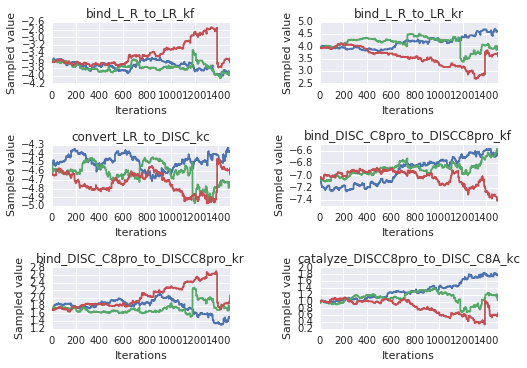

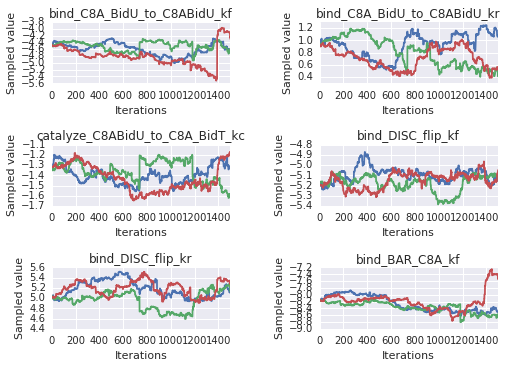

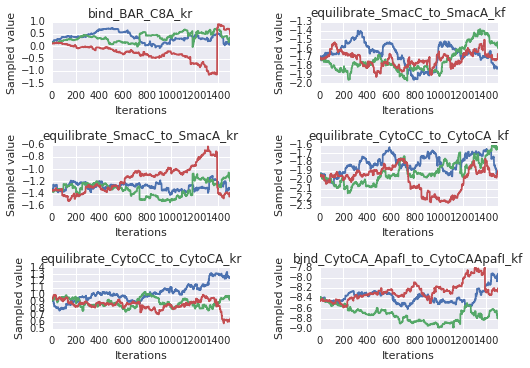

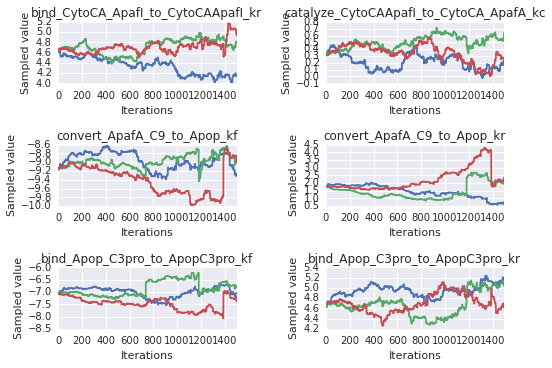

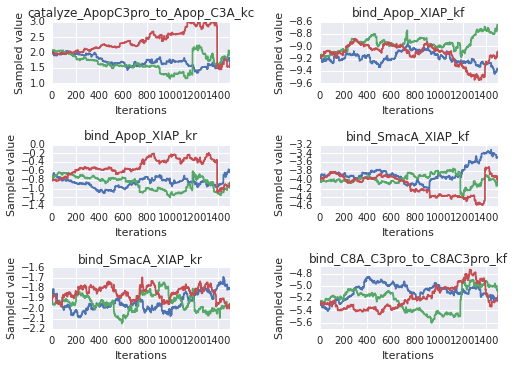

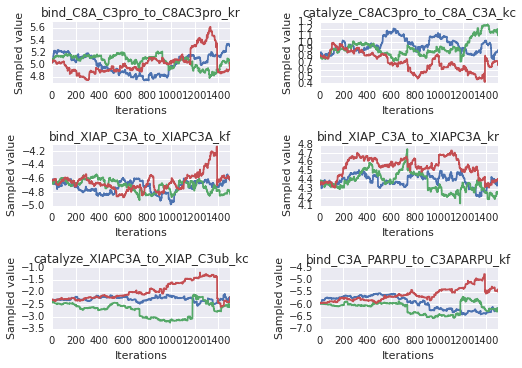

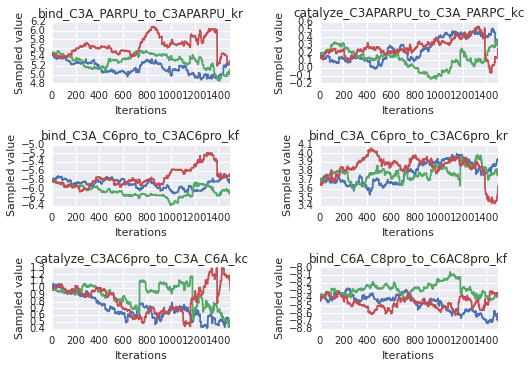

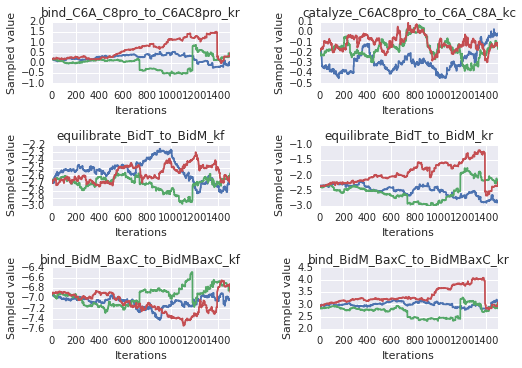

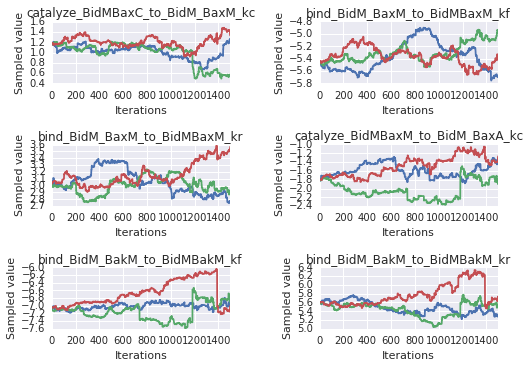

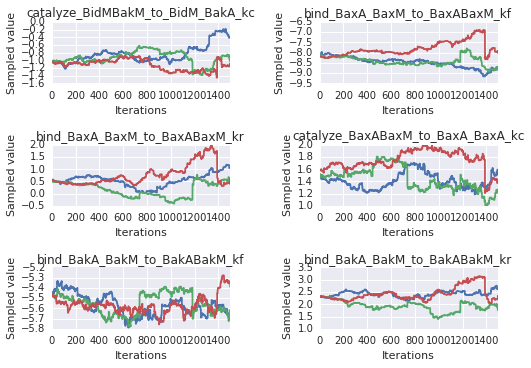

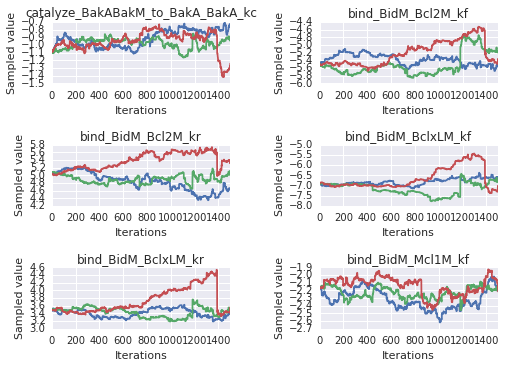

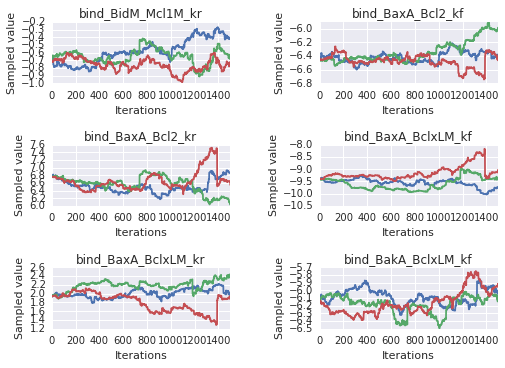

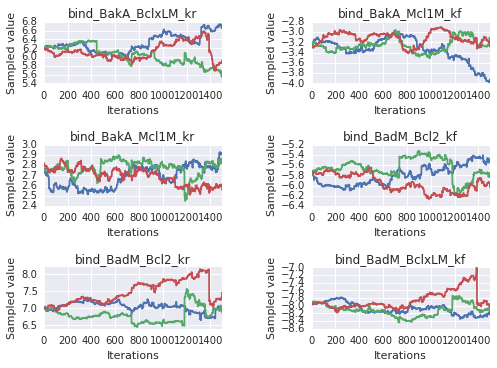

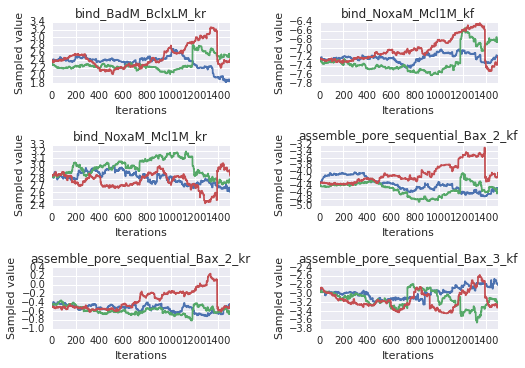

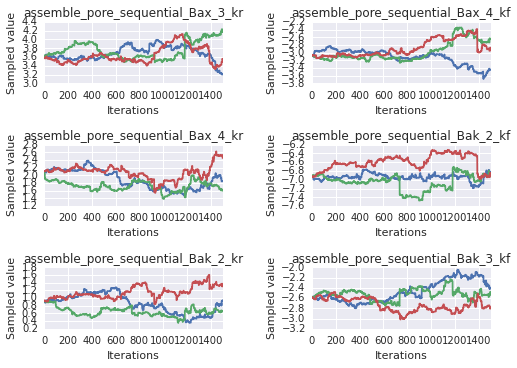

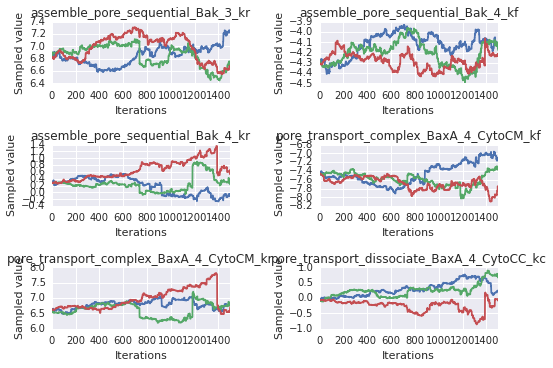

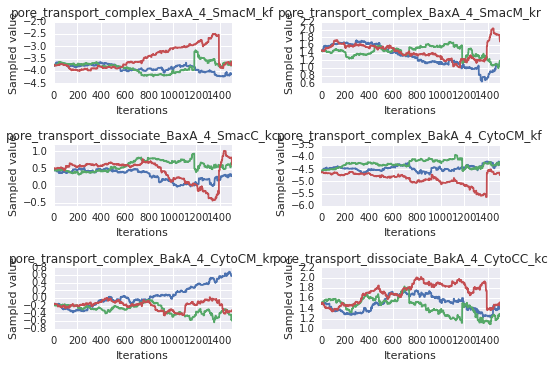

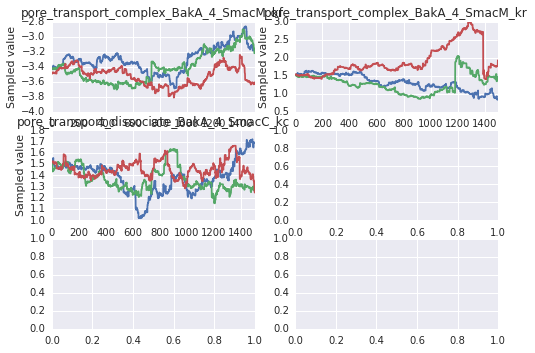

In [9]:
sample_plots(param_trace_dicts['a'])

In [10]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=600, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


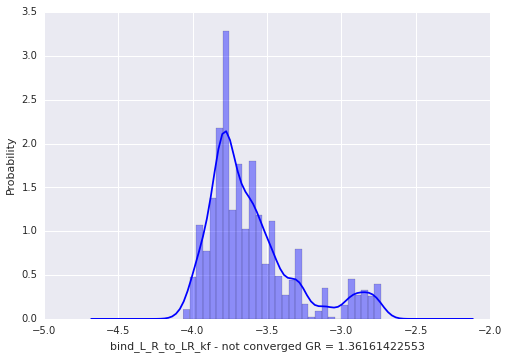

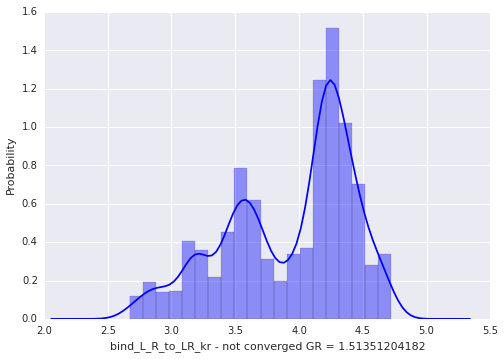

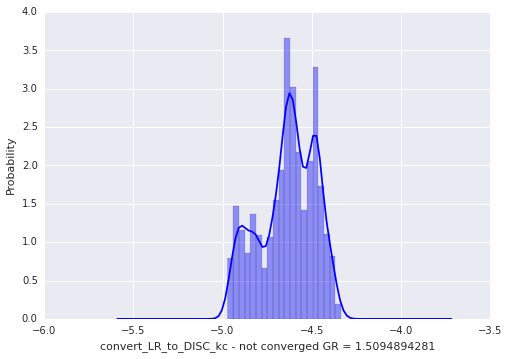

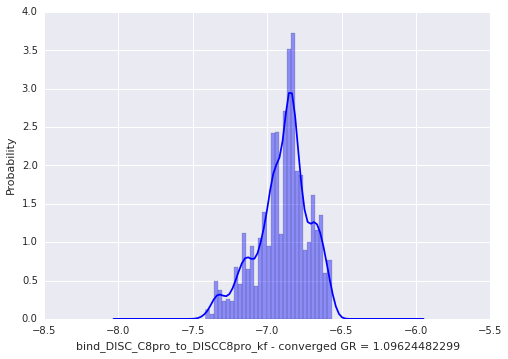

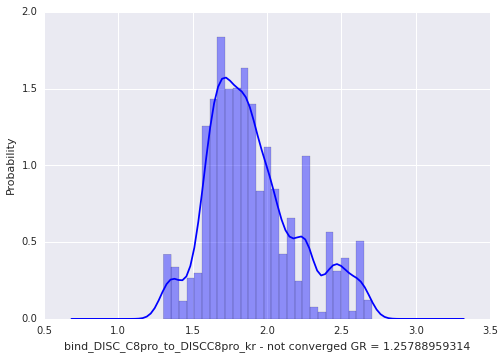

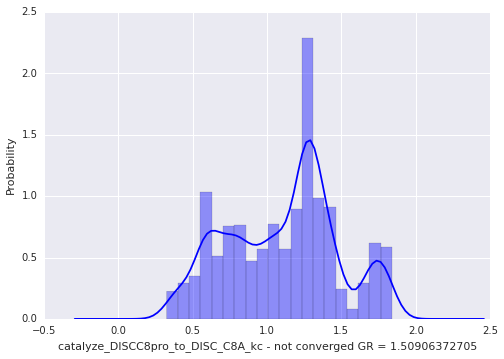

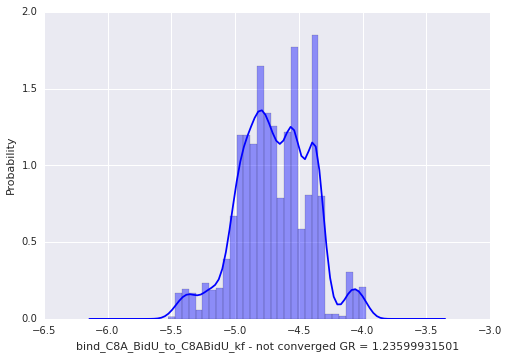

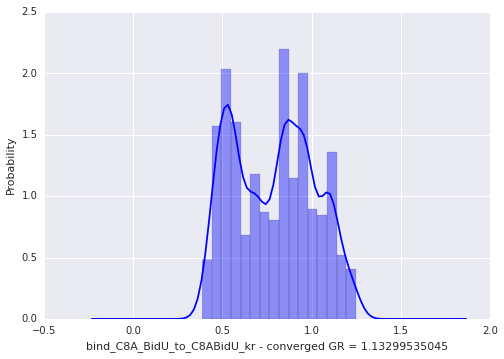

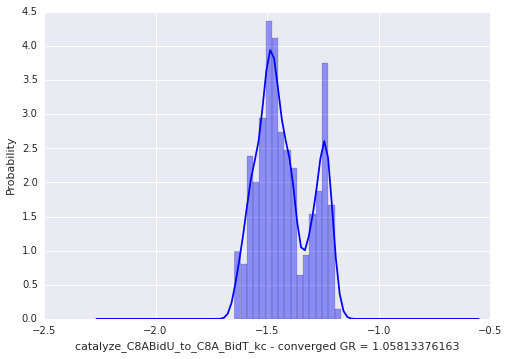

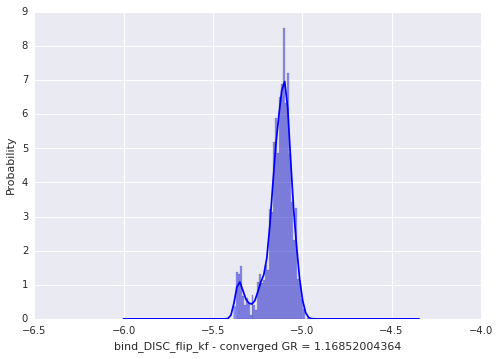

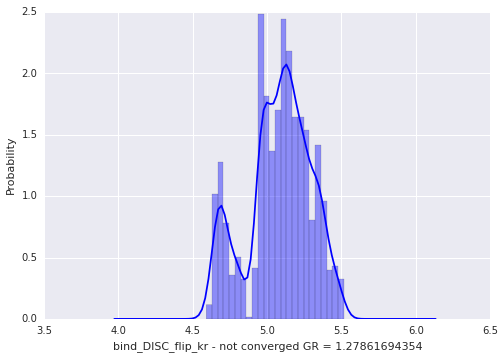

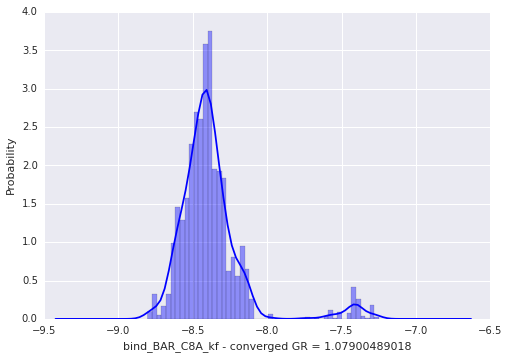

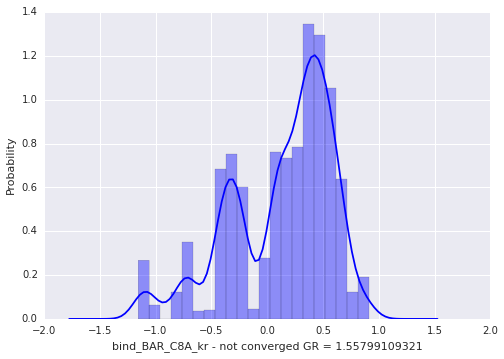

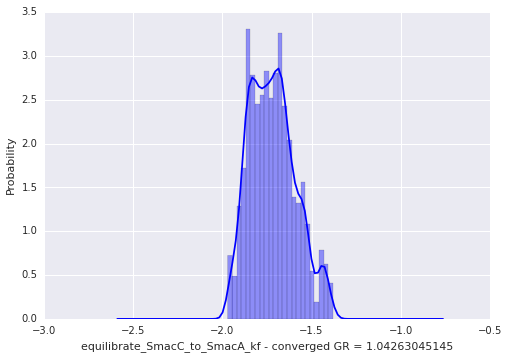

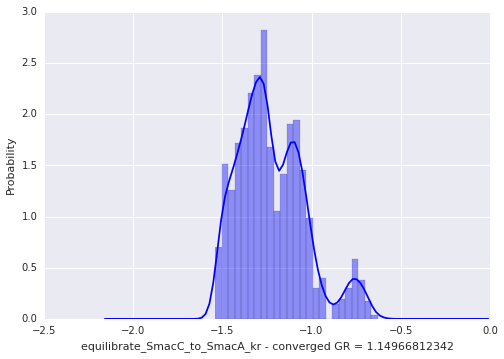

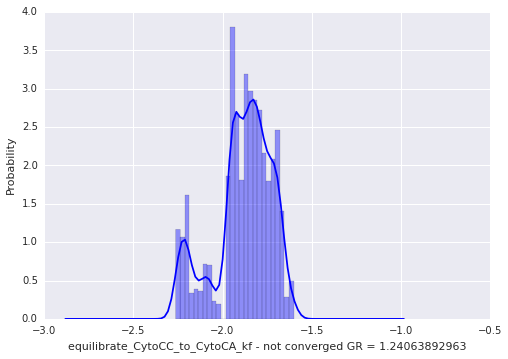

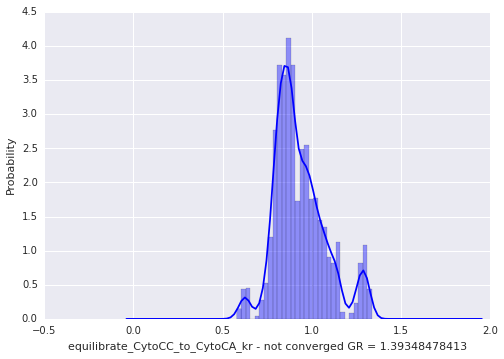

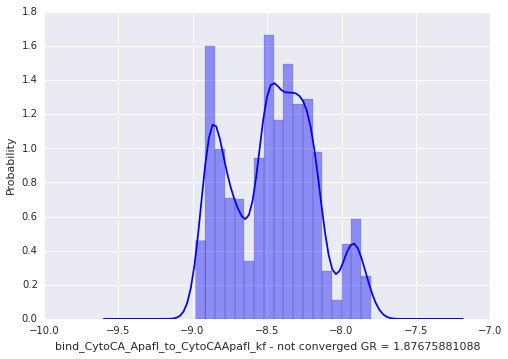

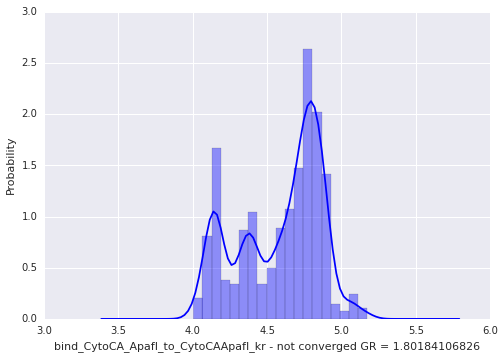

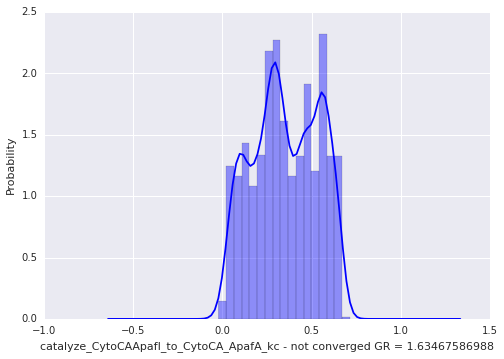

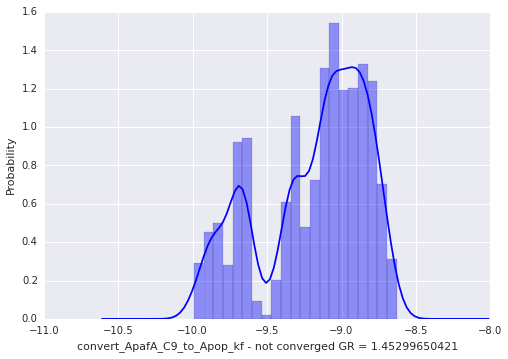

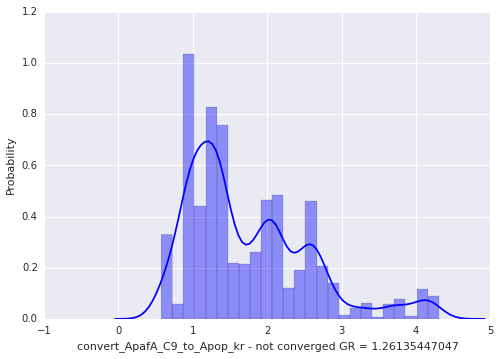

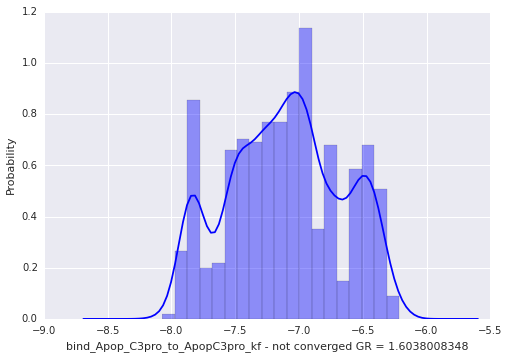

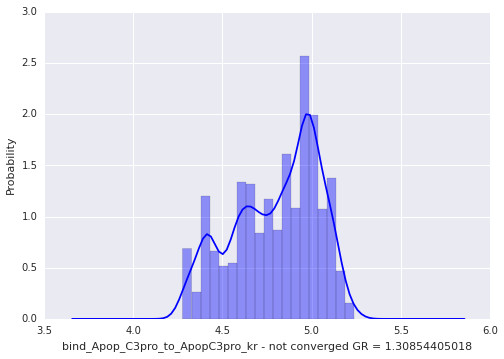

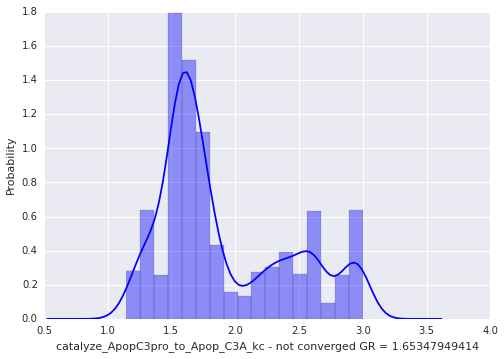

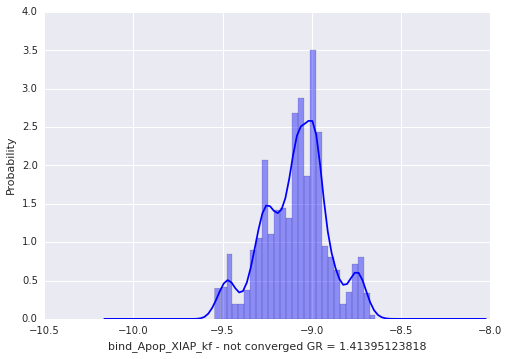

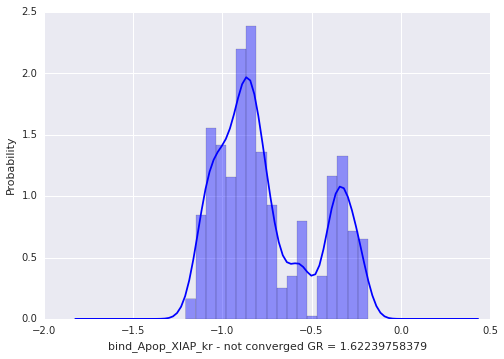

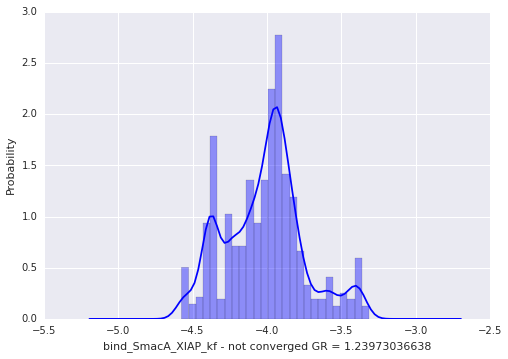

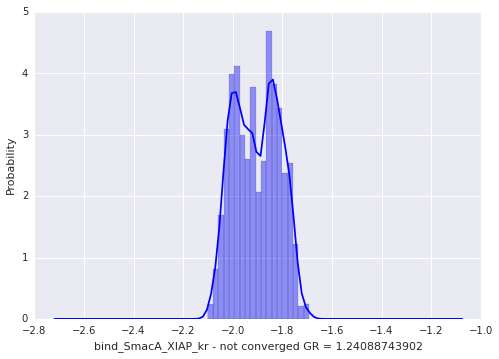

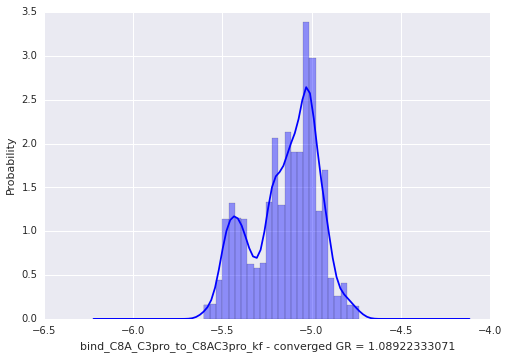

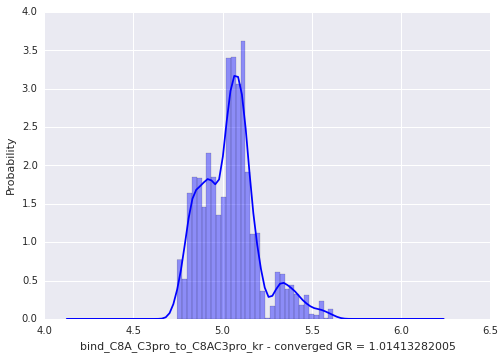

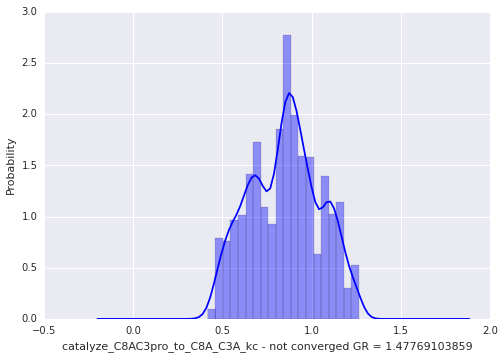

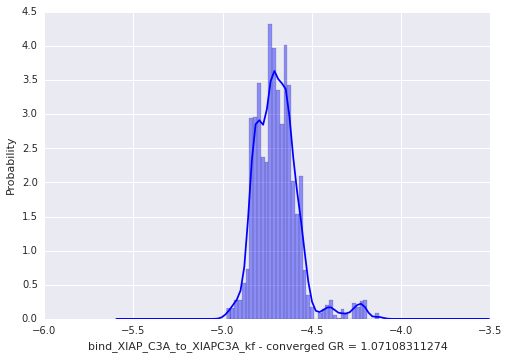

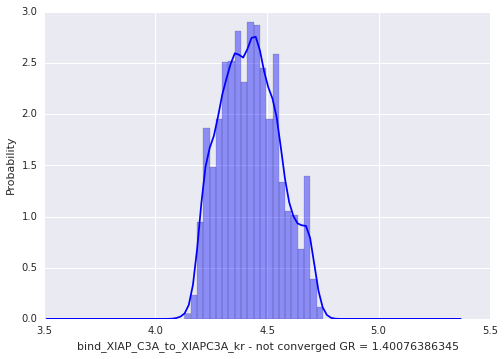

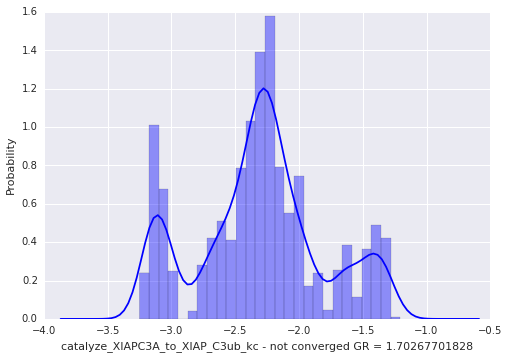

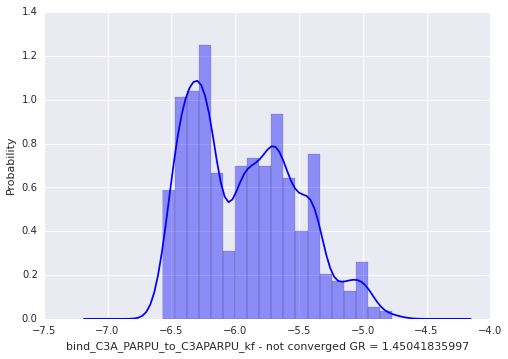

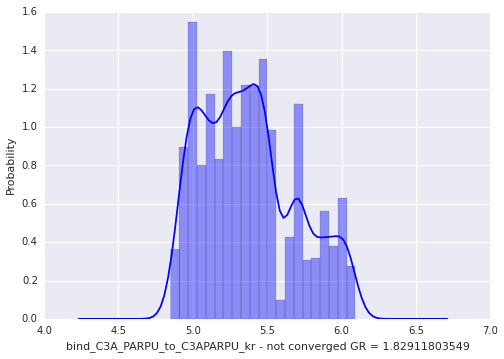

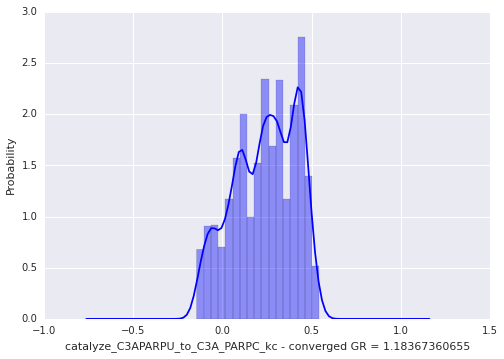

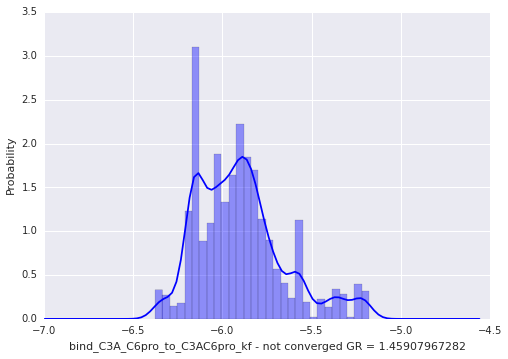

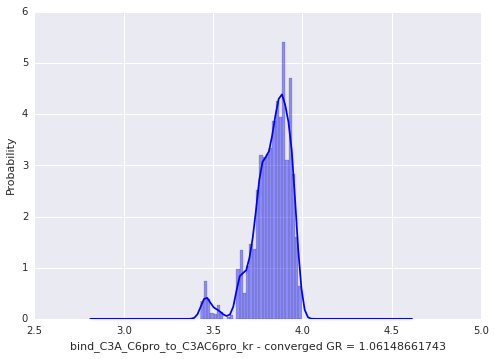

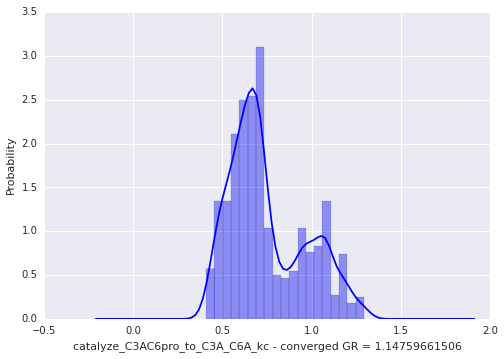

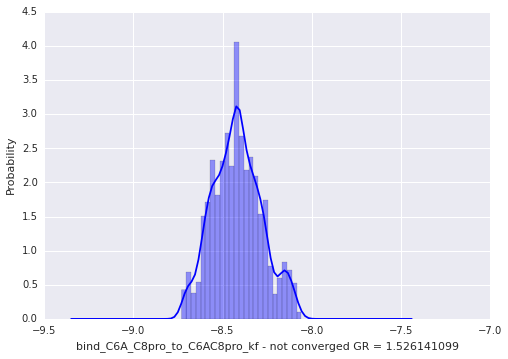

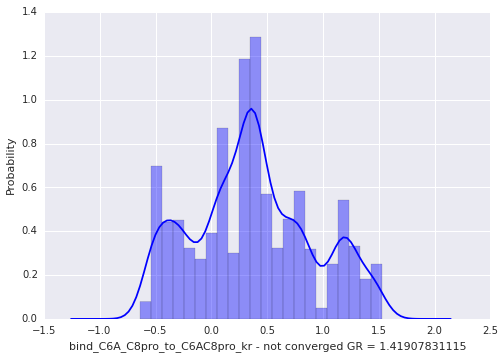

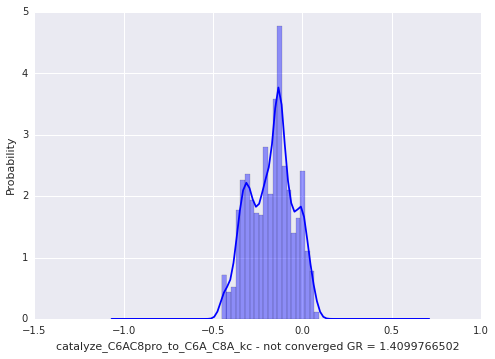

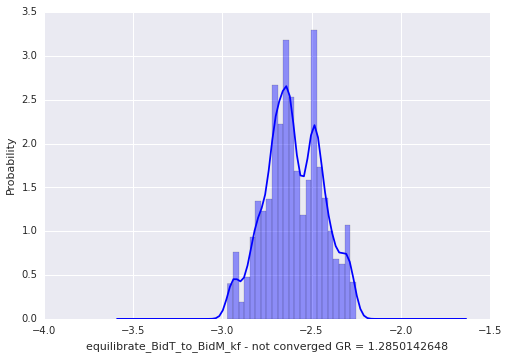

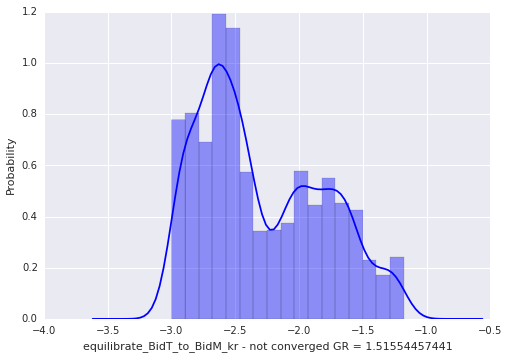

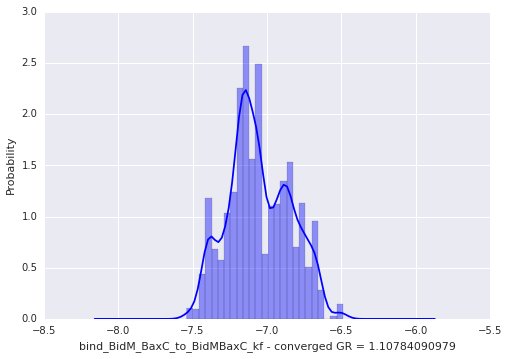

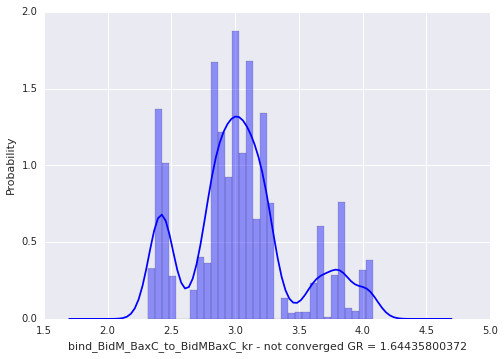

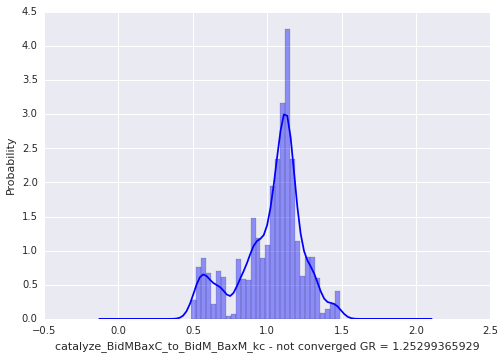

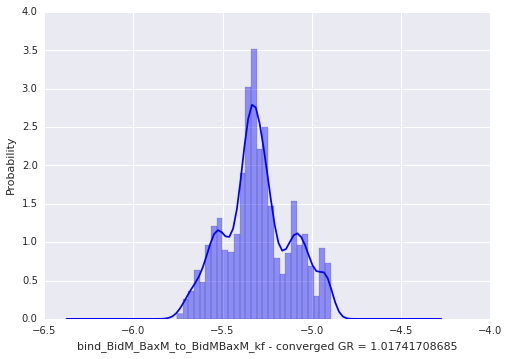

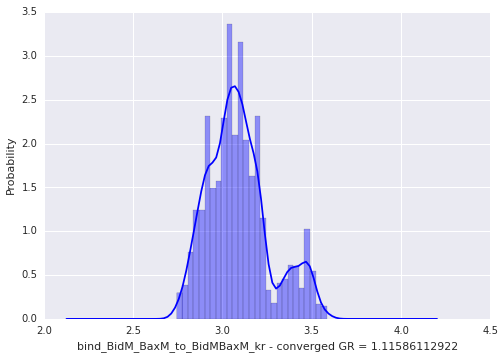

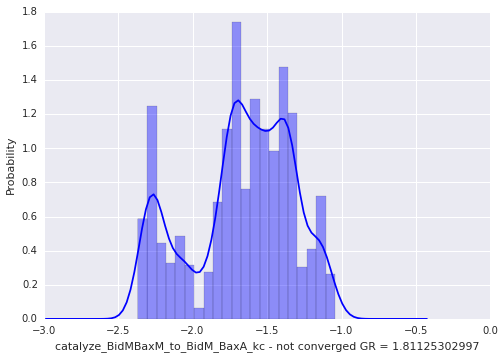

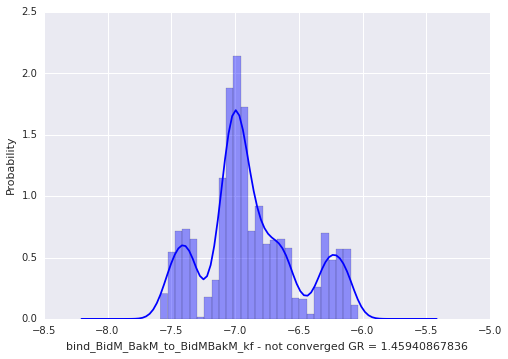

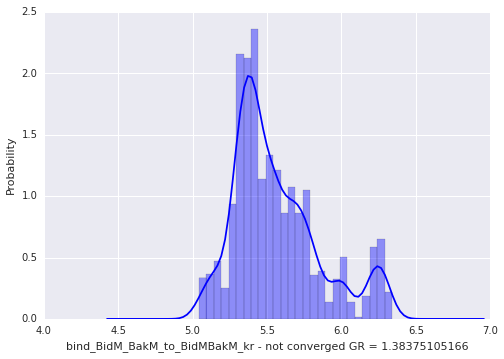

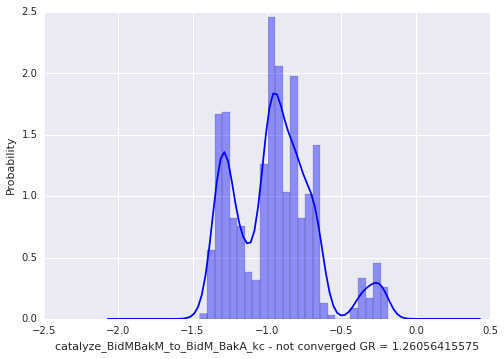

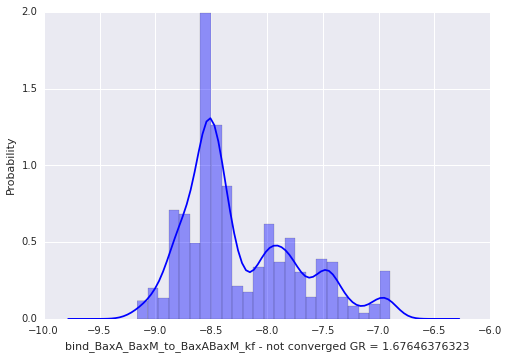

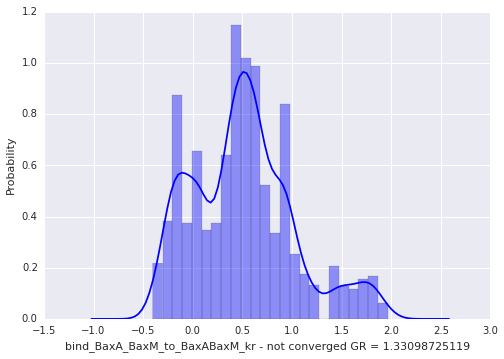

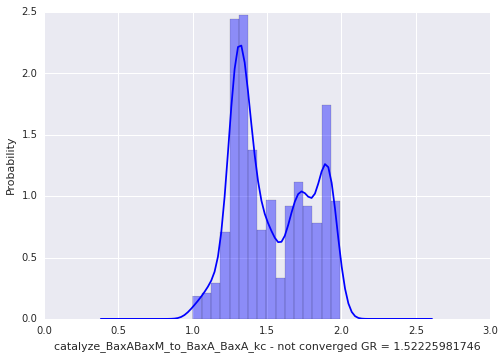

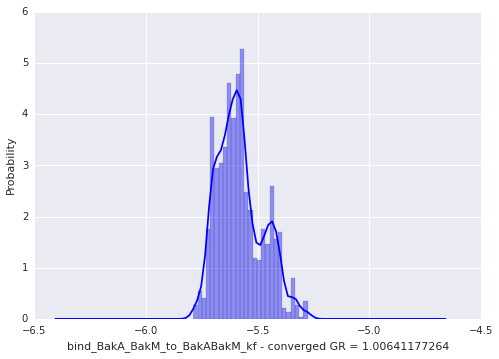

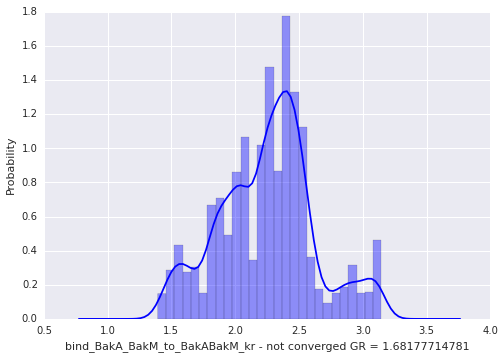

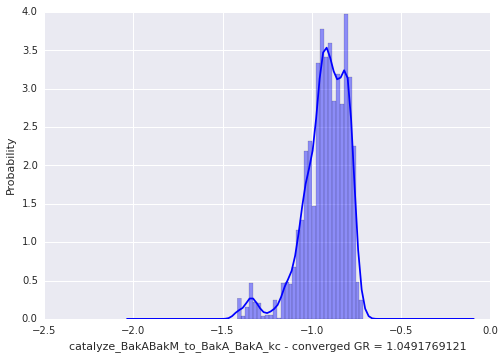

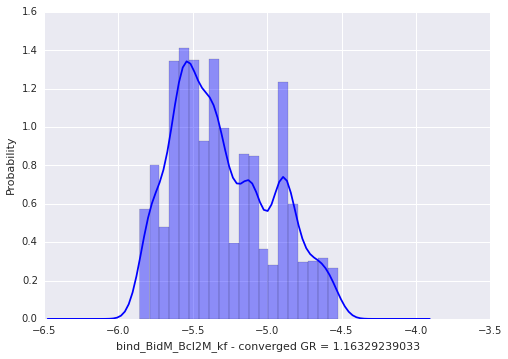

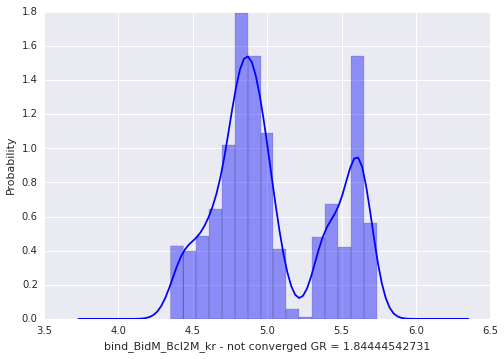

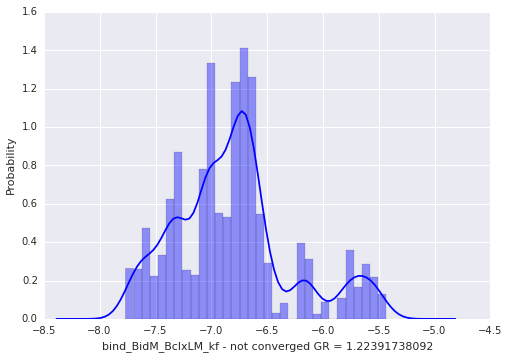

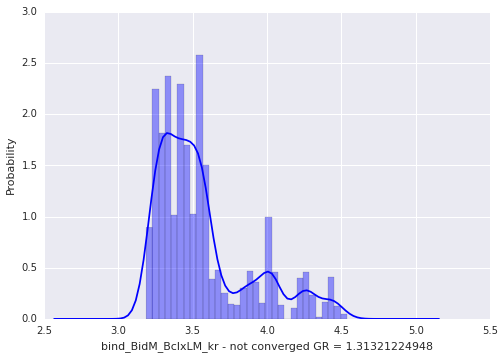

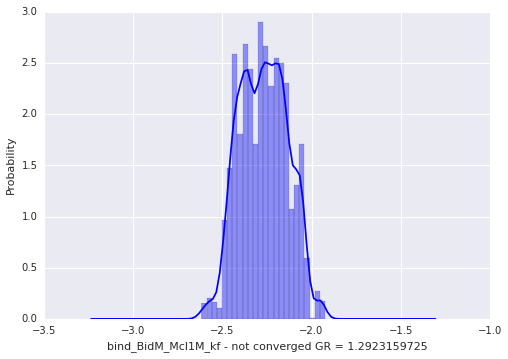

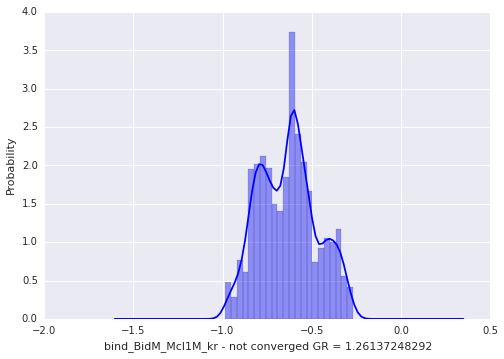

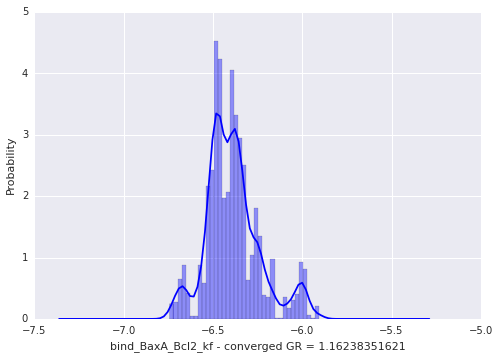

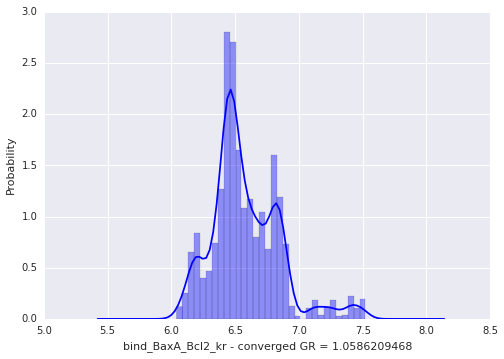

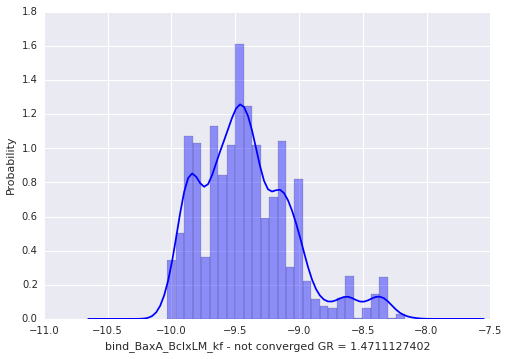

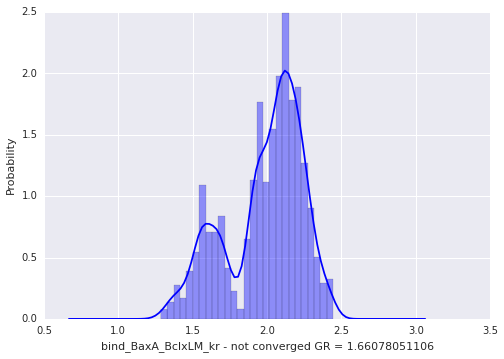

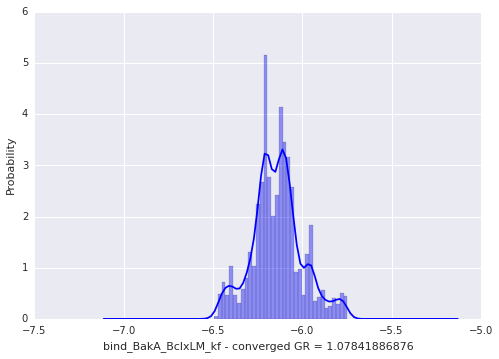

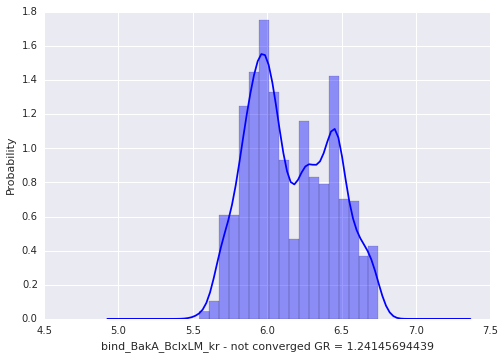

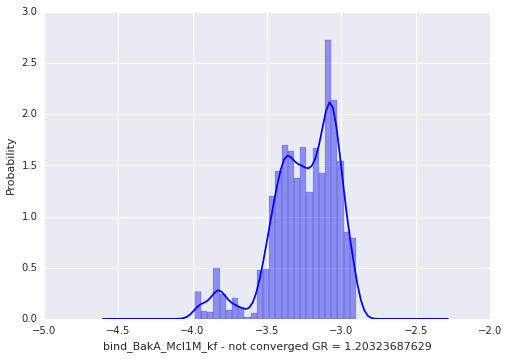

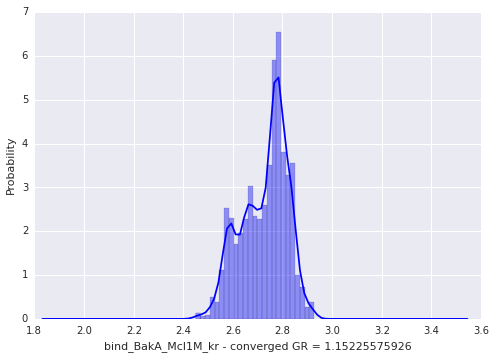

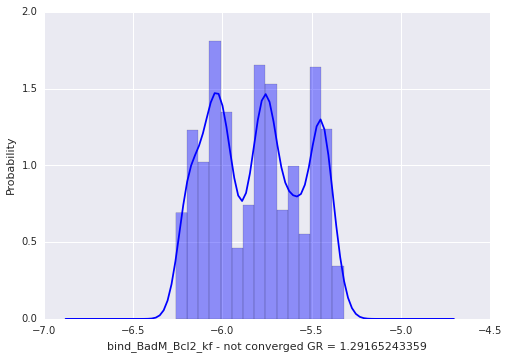

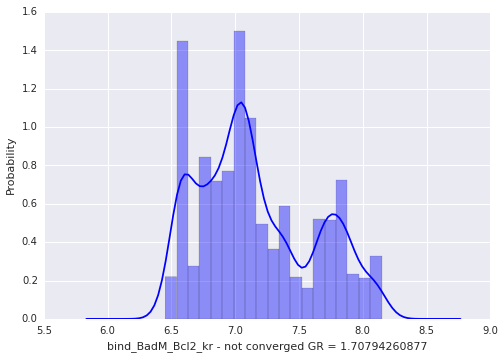

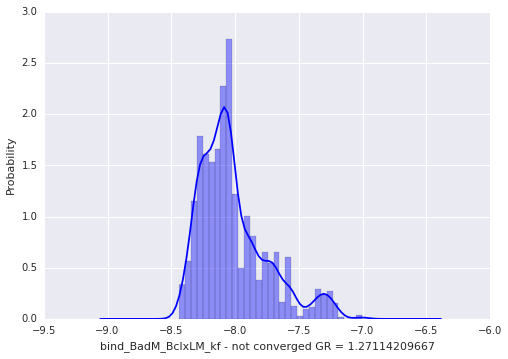

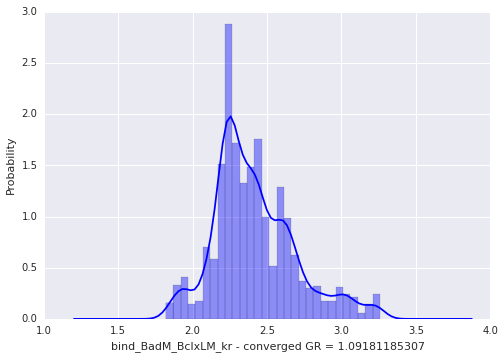

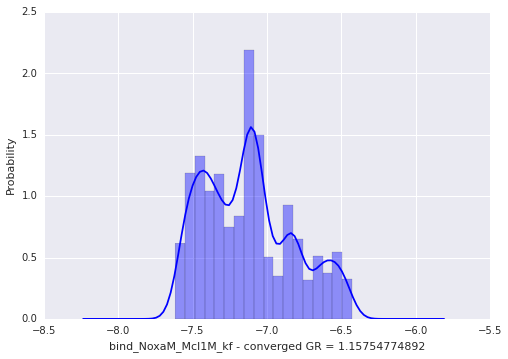

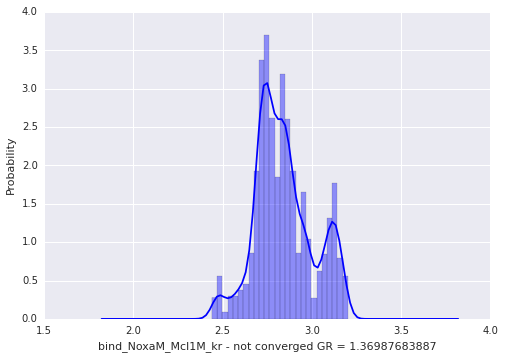

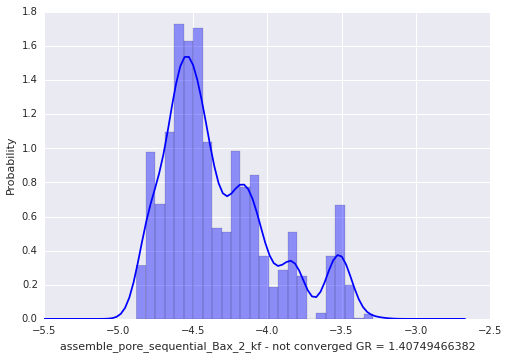

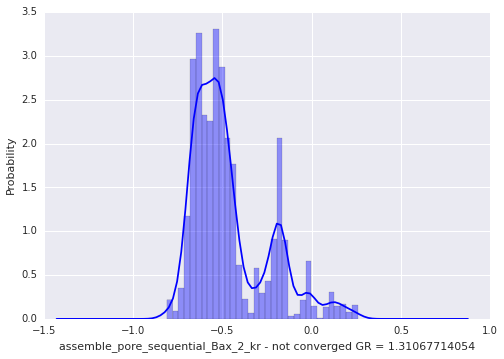

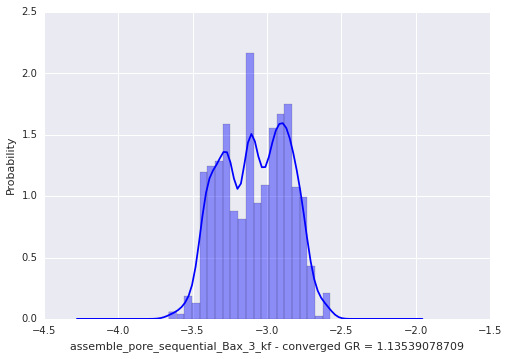

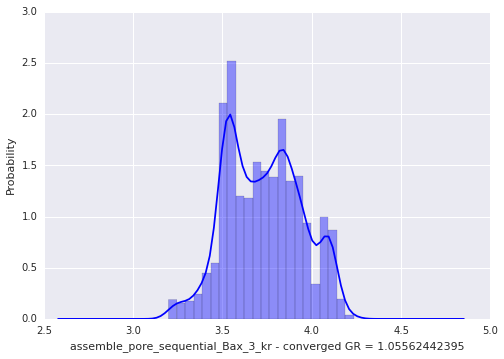

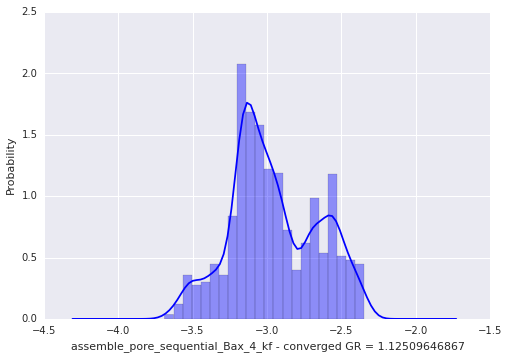

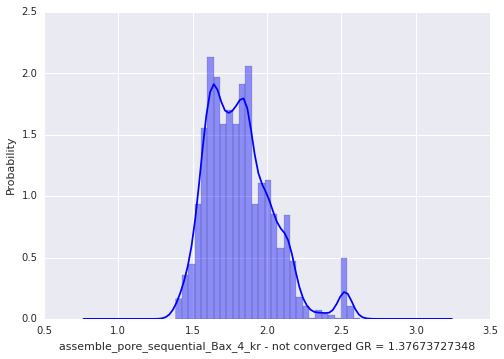

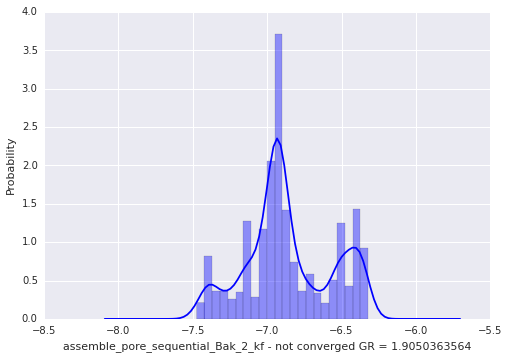

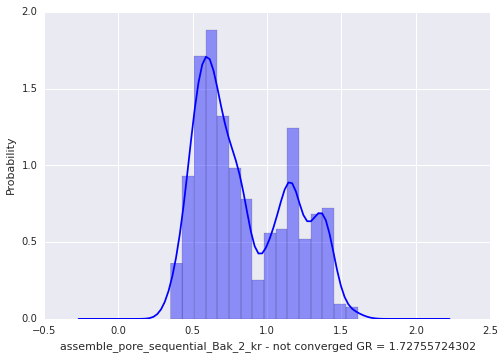

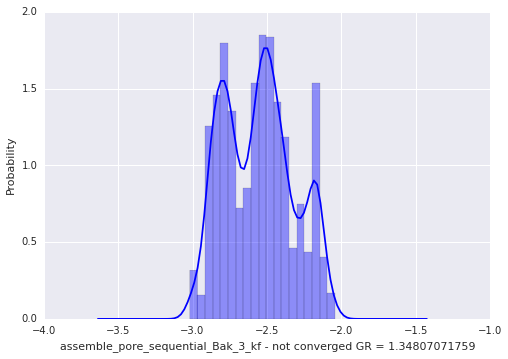

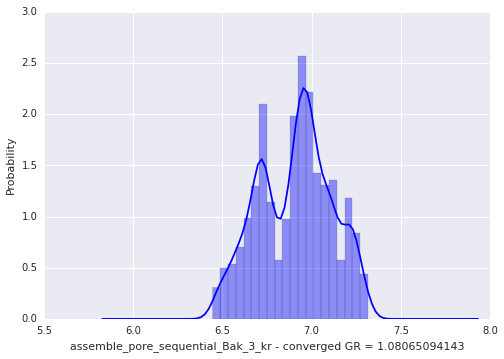

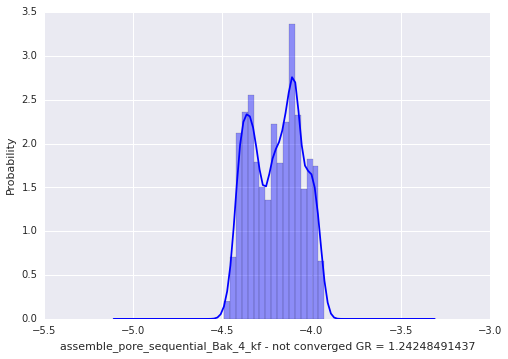

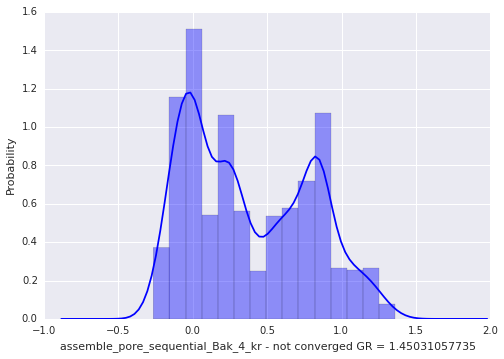

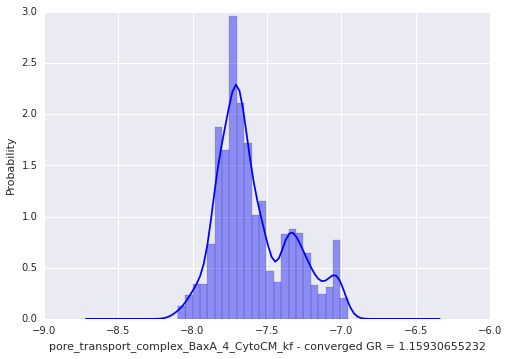

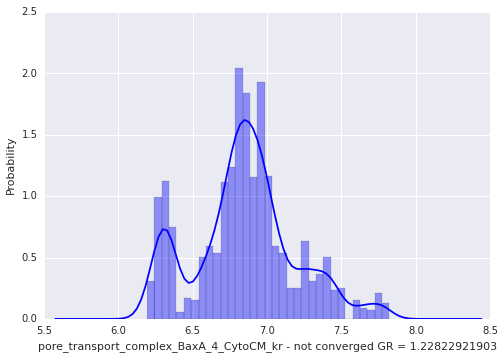

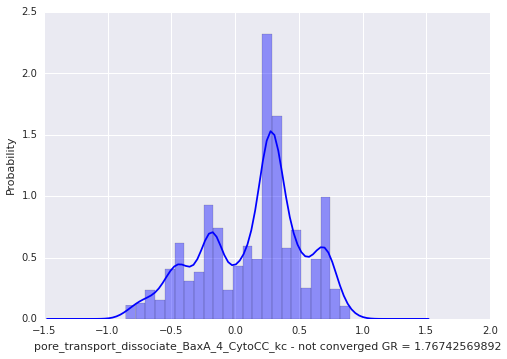

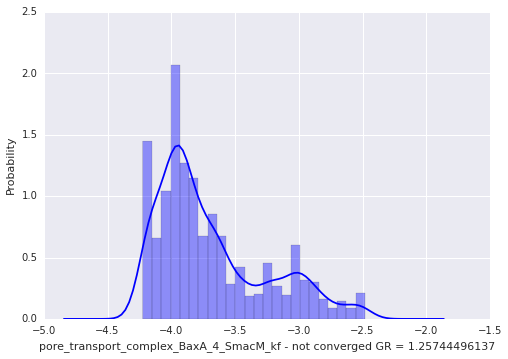

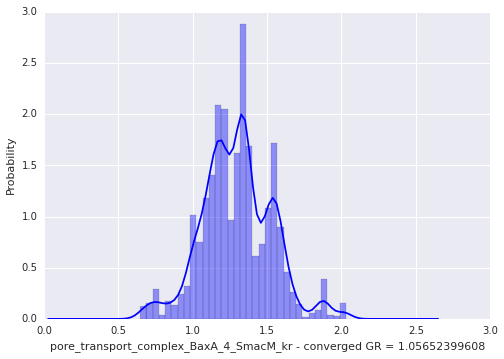

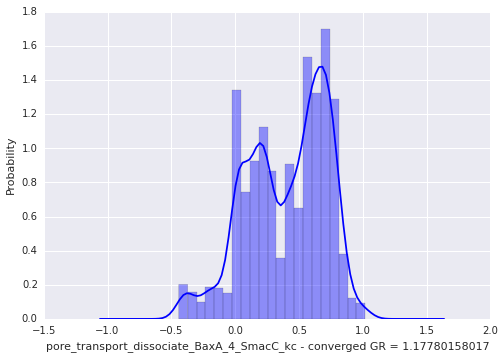

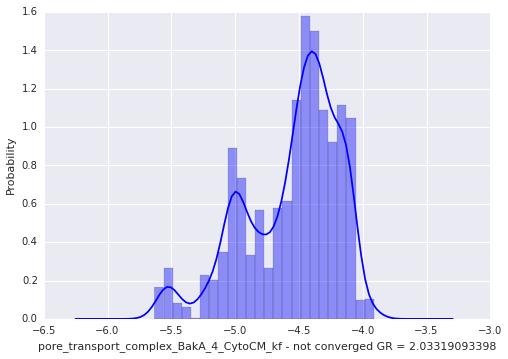

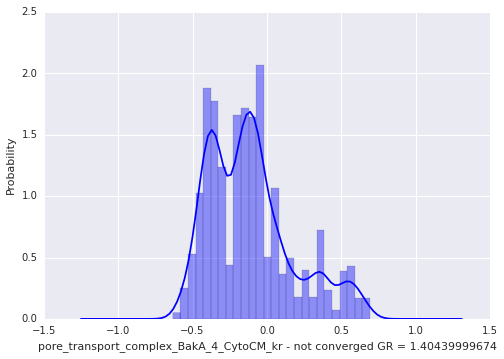

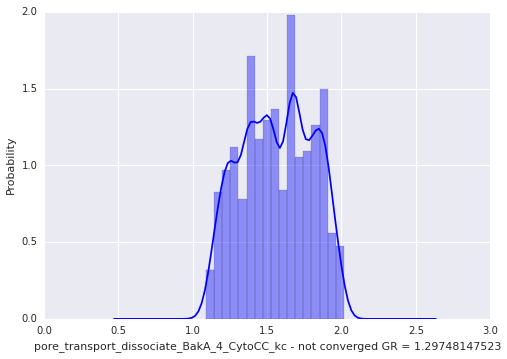

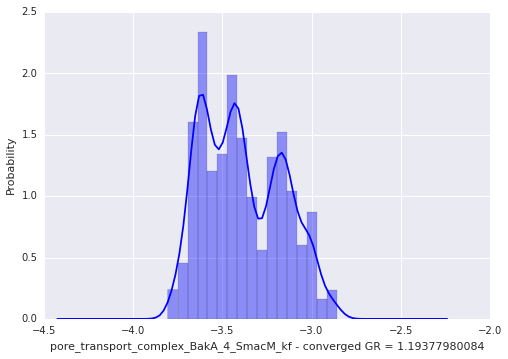

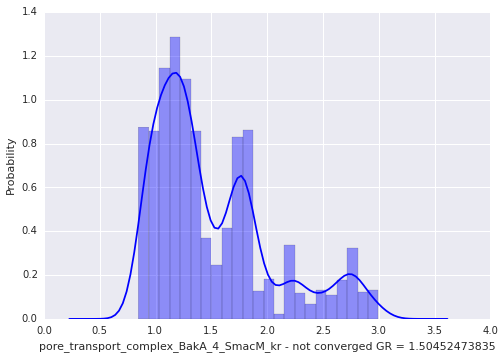

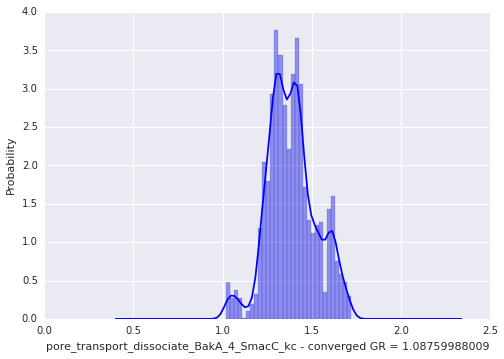

In [11]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [12]:
traces['a'][1][:,0]

array([-3.62651397, -3.62944299, -3.62944299, ..., -3.95580091,
       -3.95580091, -3.95580091])

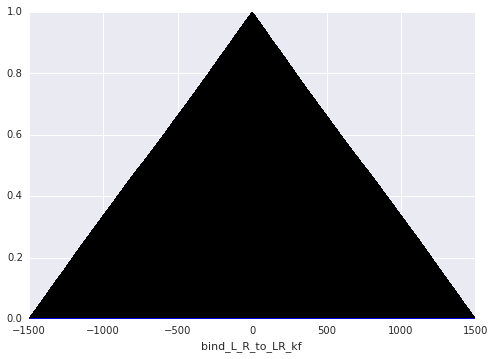

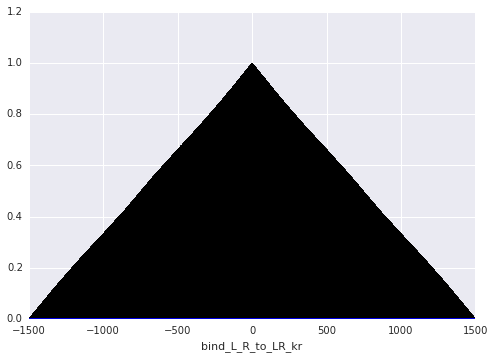

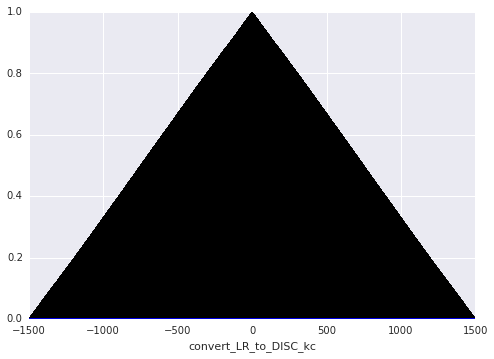

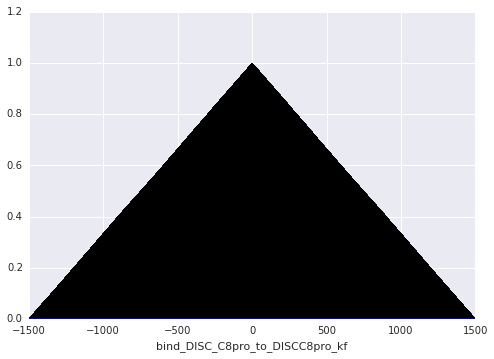

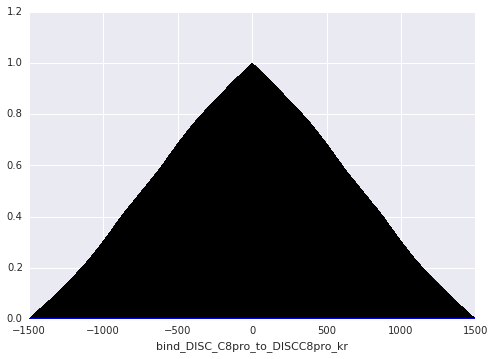

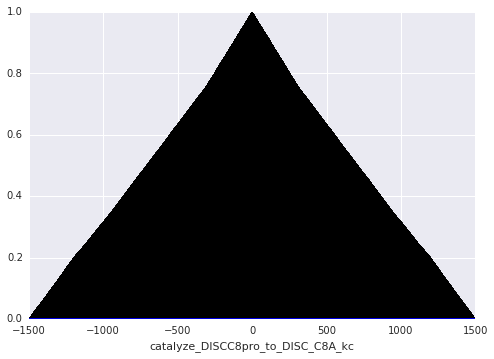

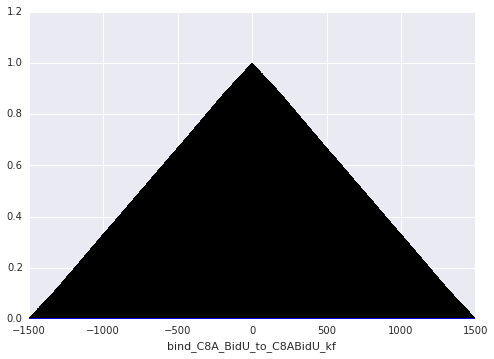

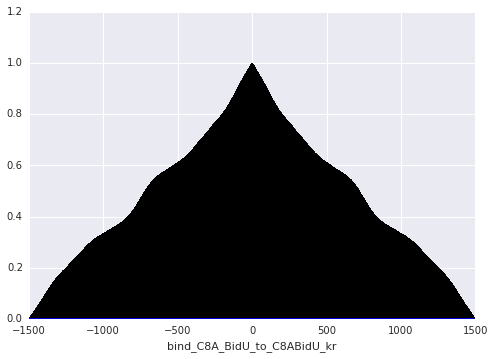

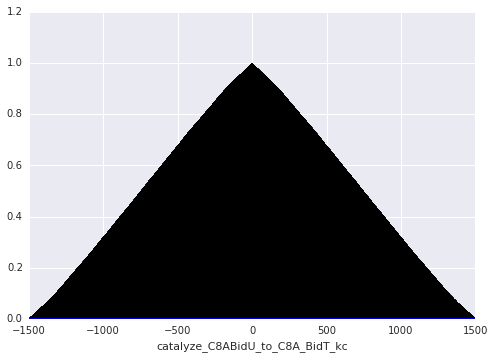

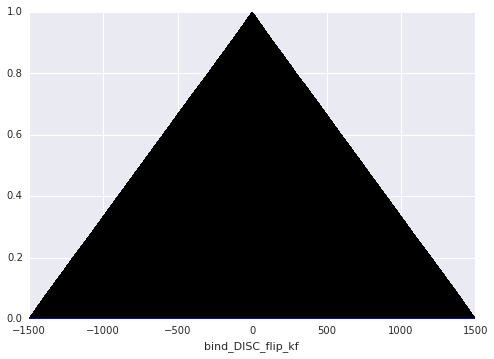

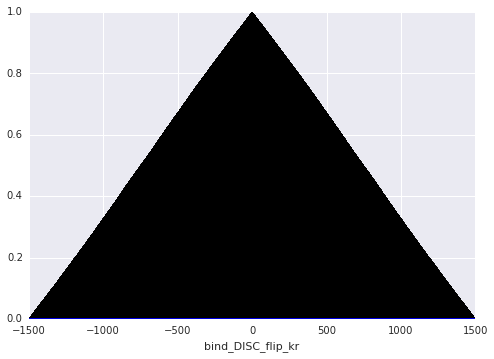

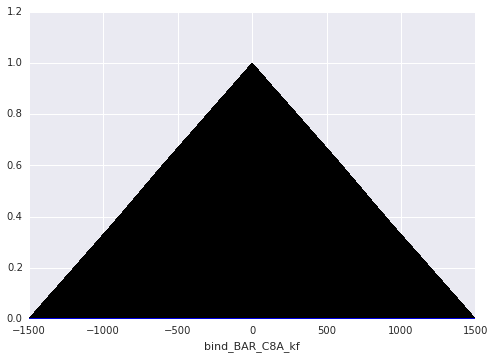

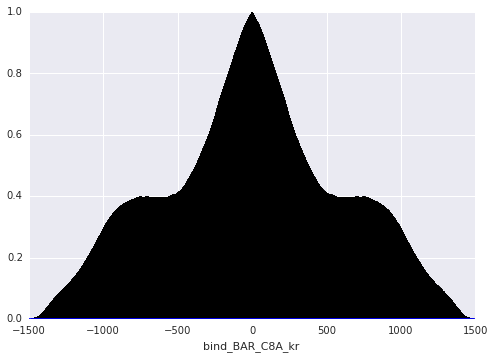

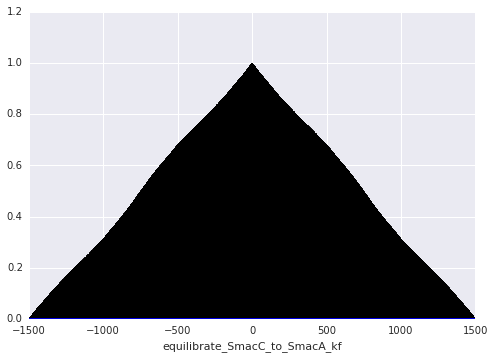

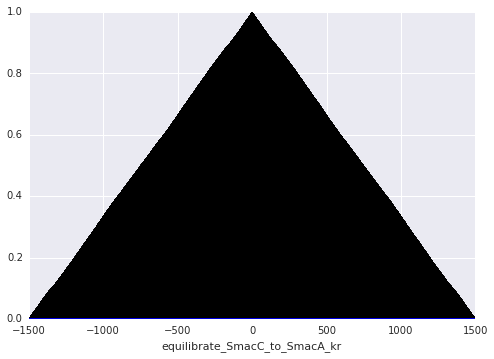

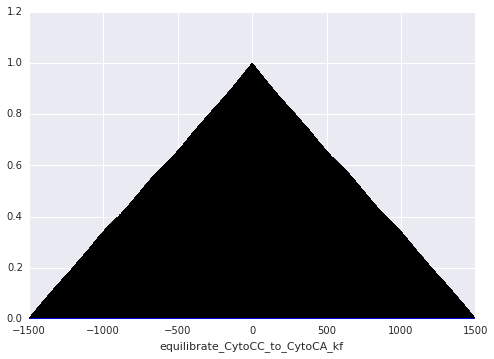

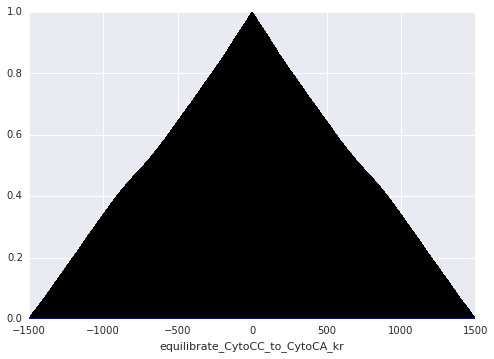

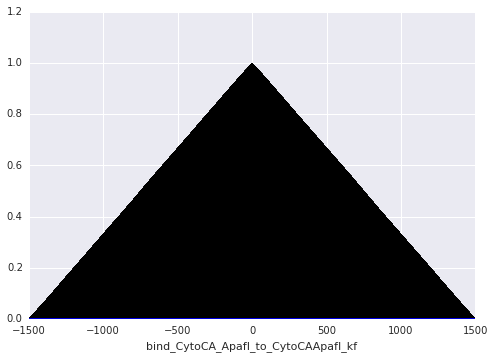

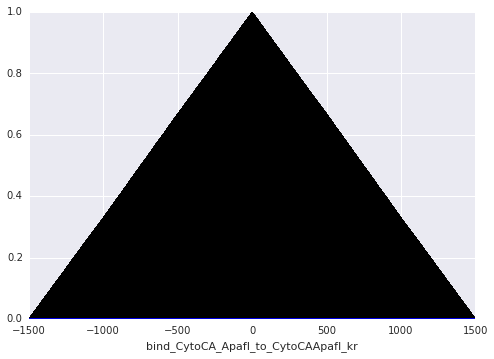

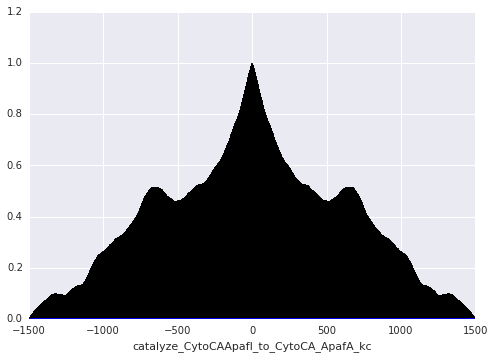

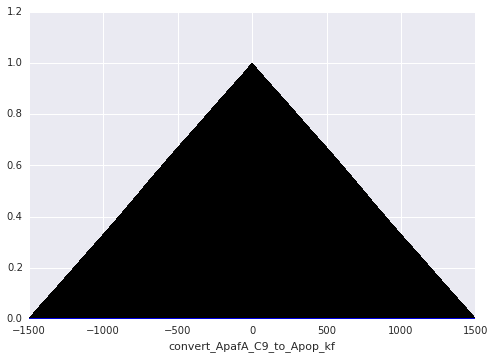

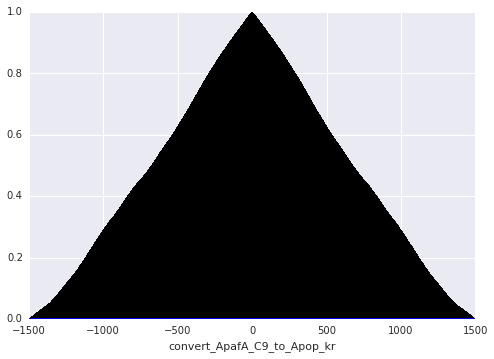

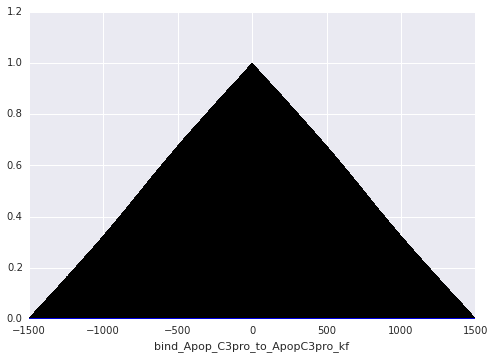

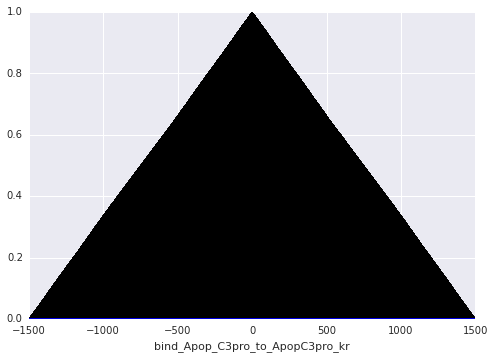

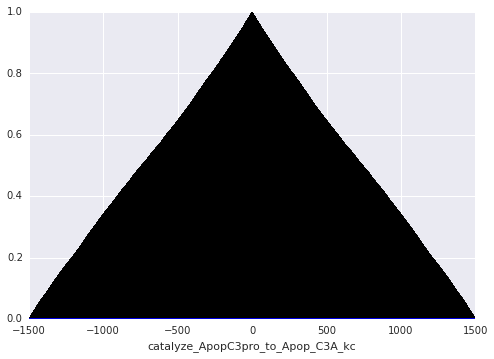

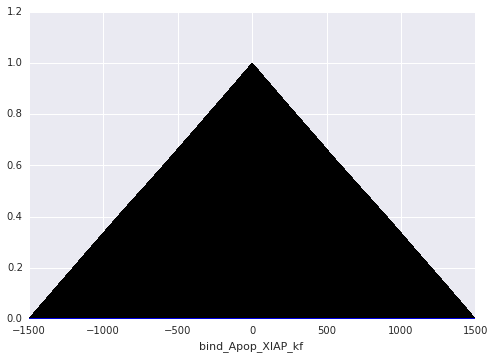

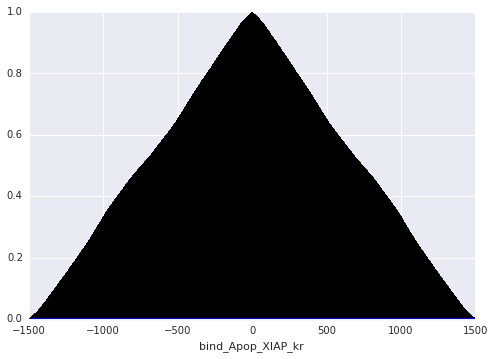

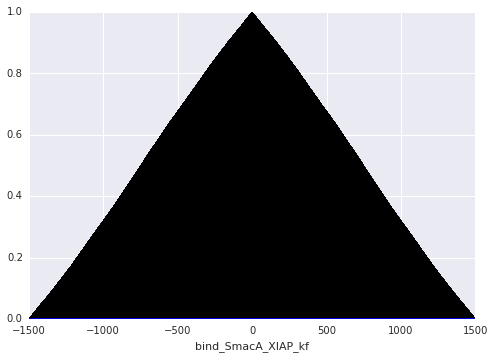

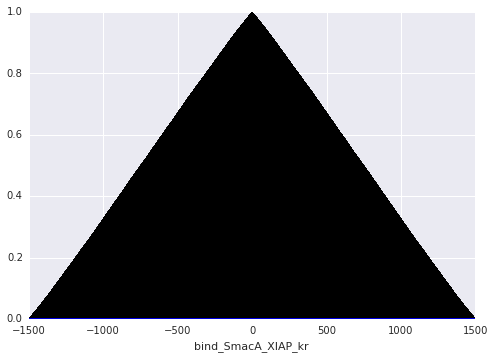

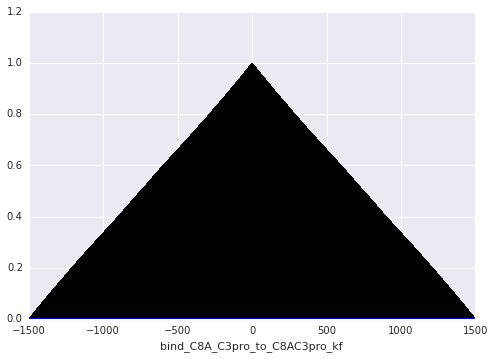

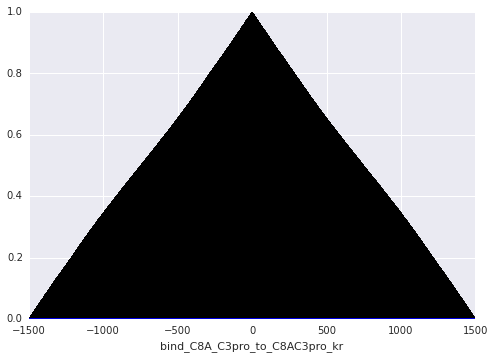

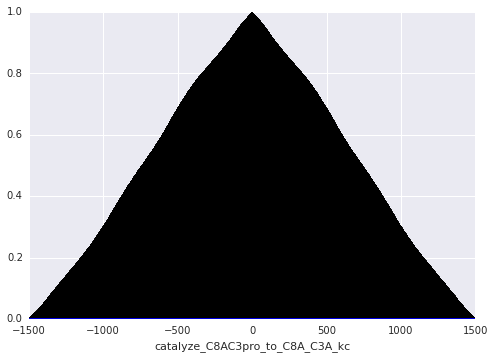

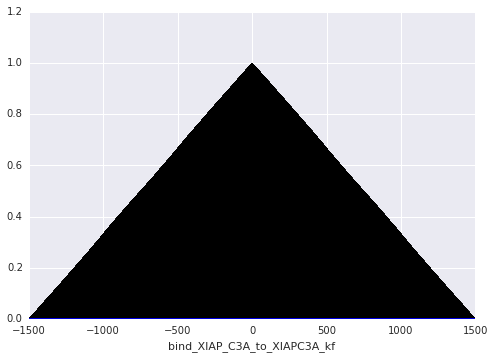

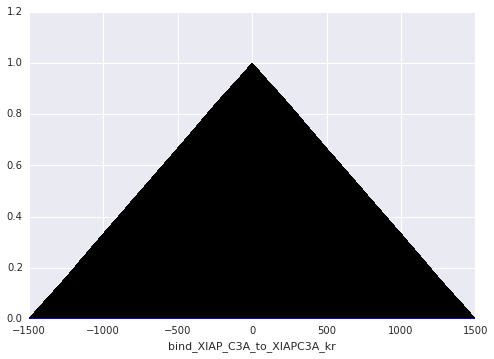

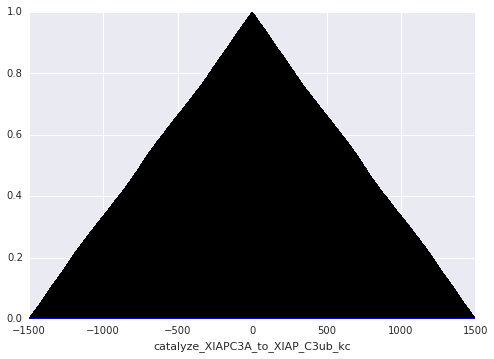

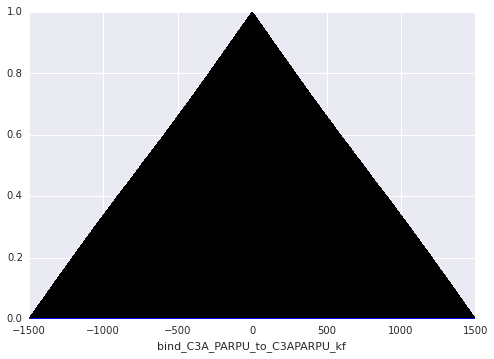

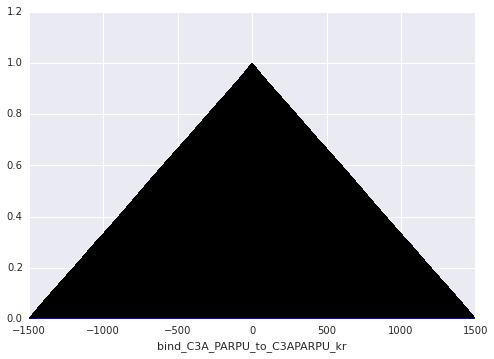

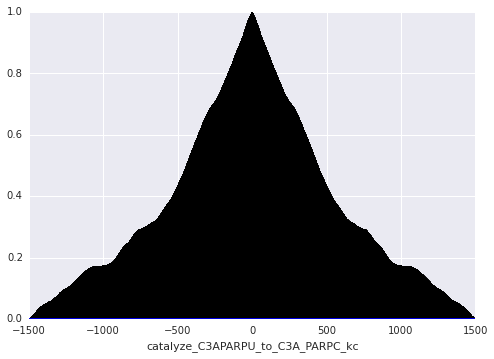

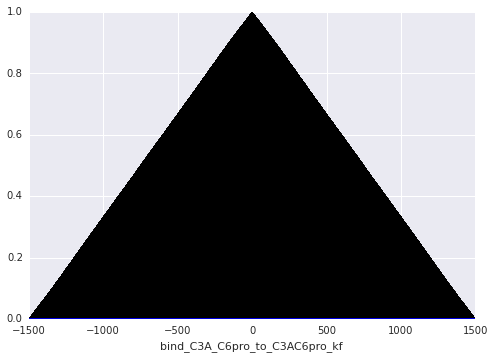

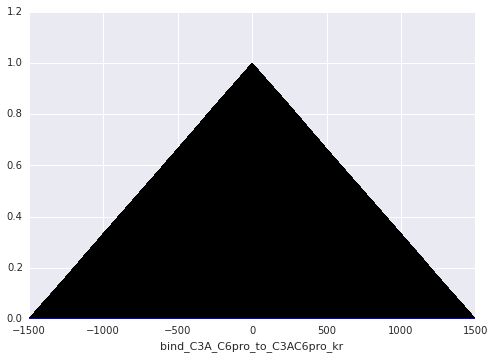

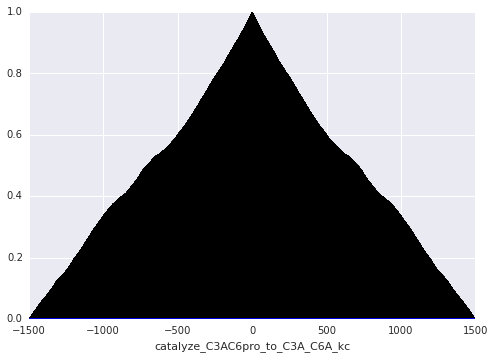

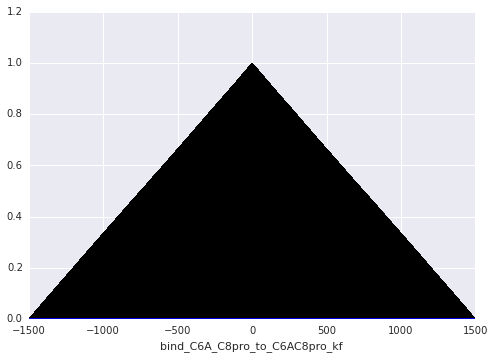

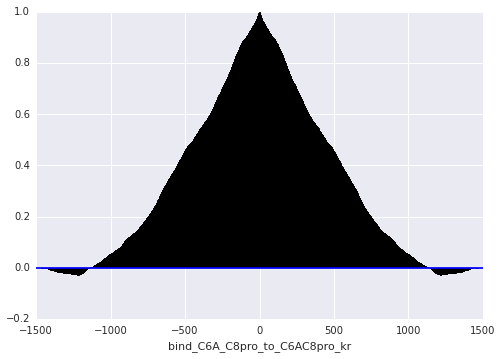

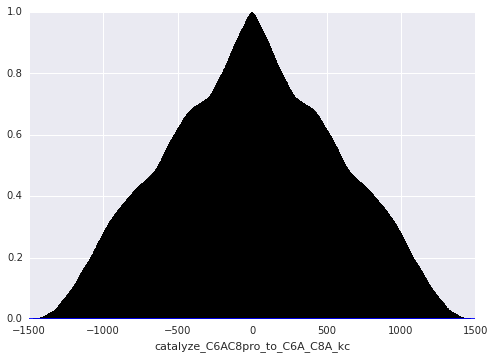

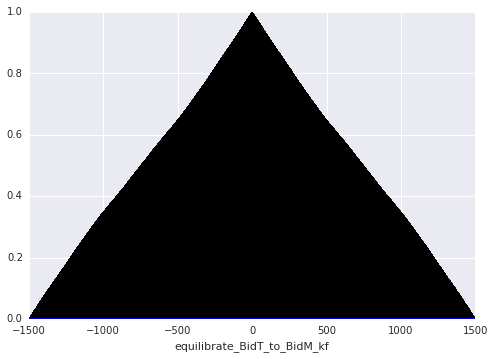

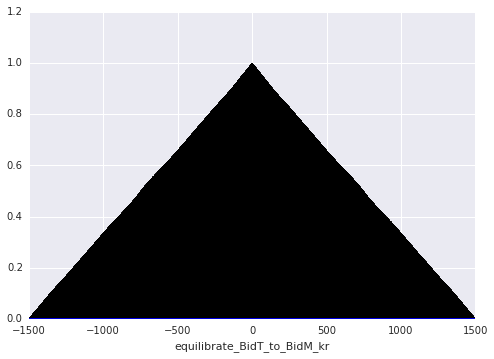

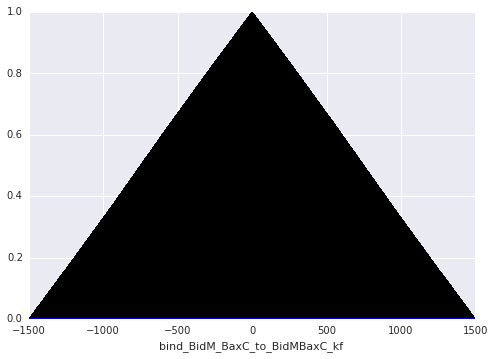

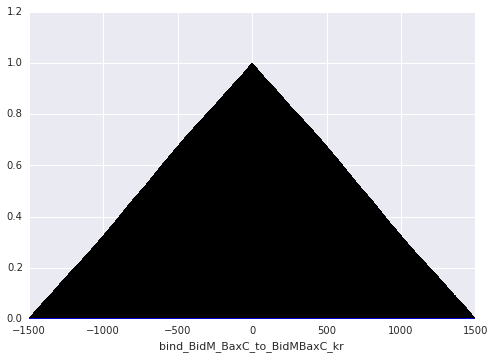

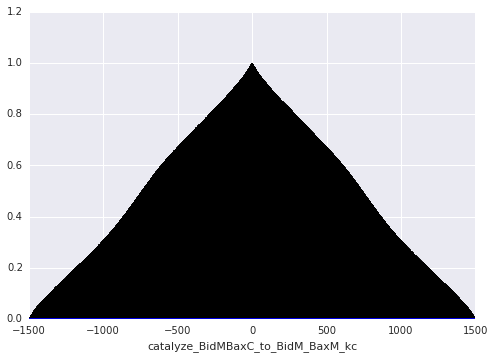

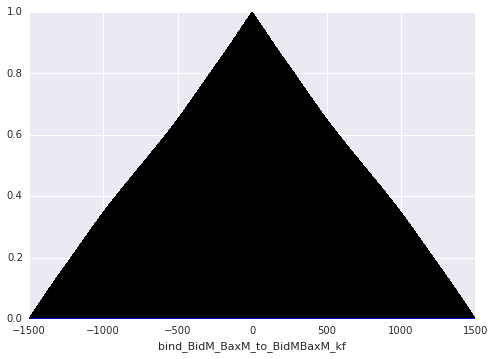

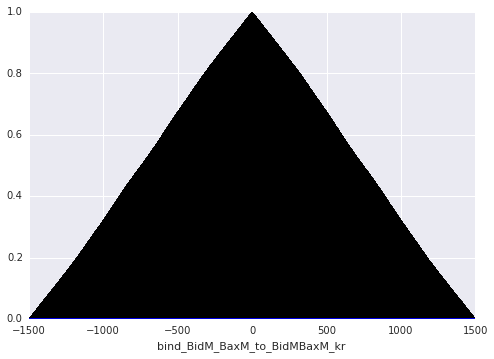

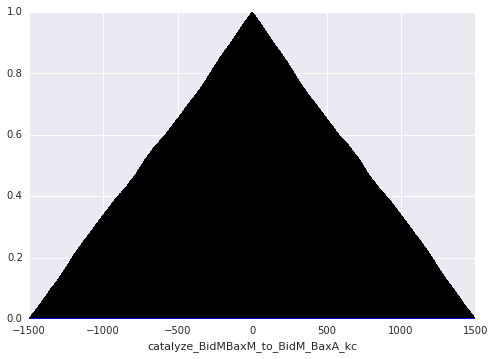

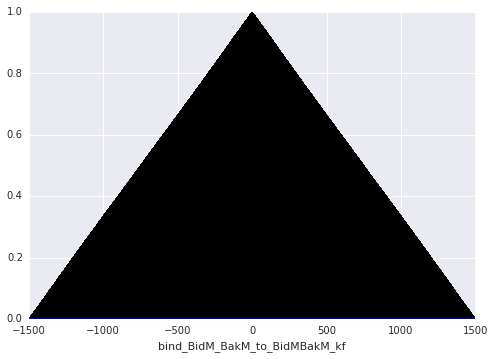

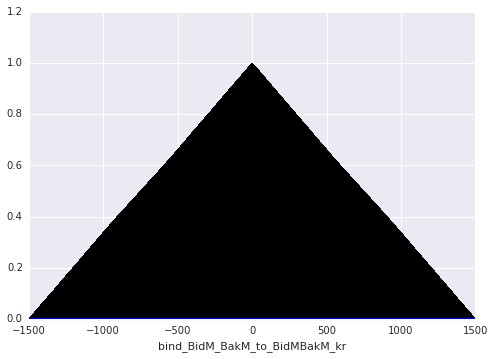

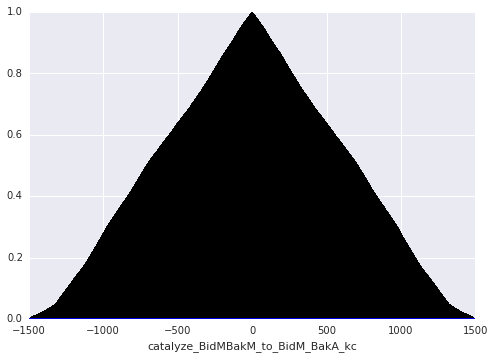

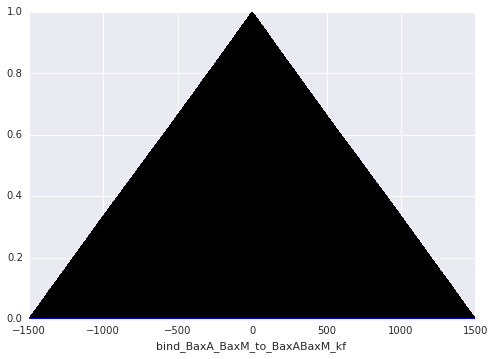

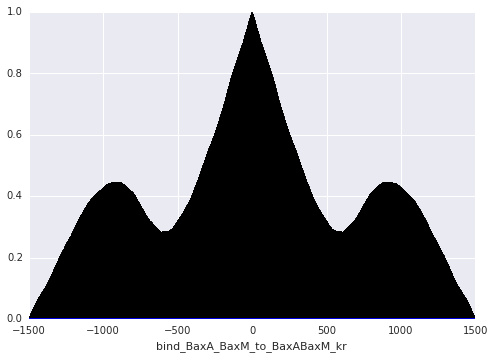

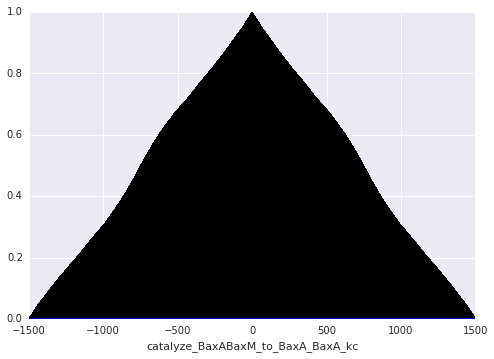

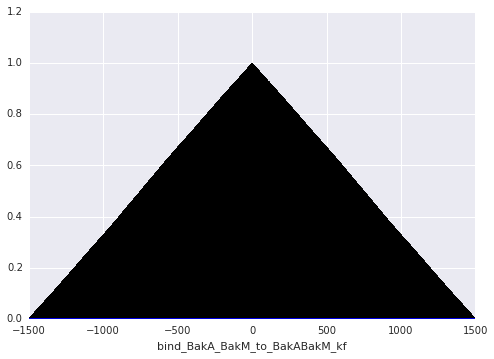

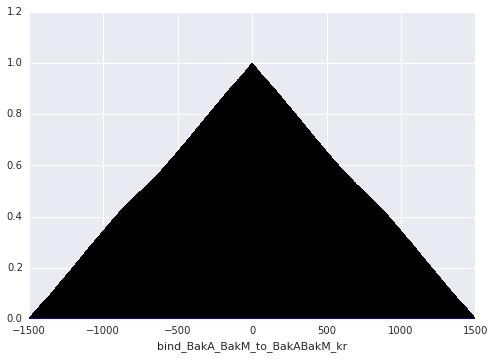

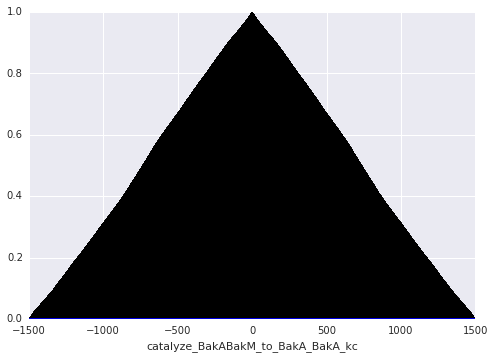

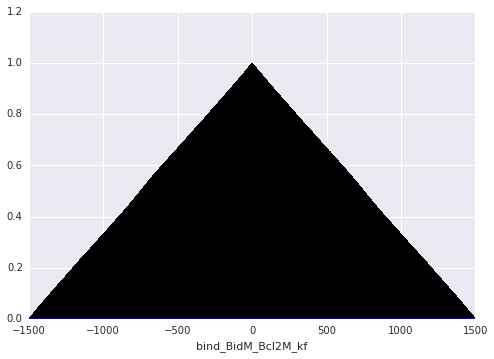

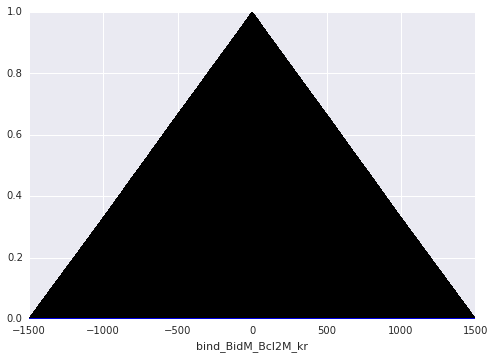

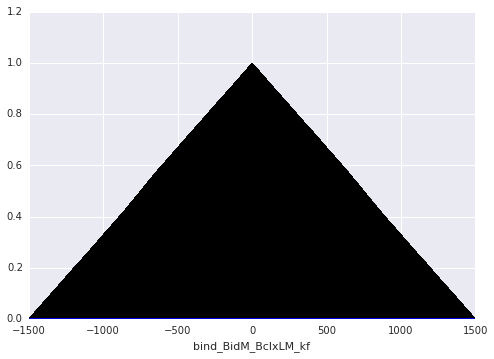

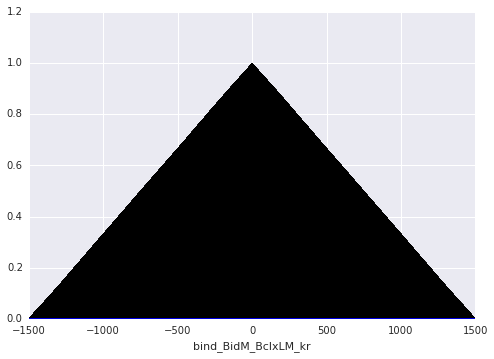

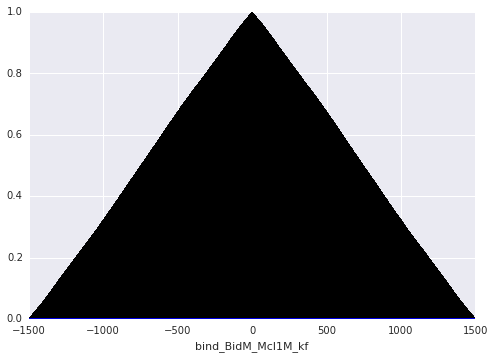

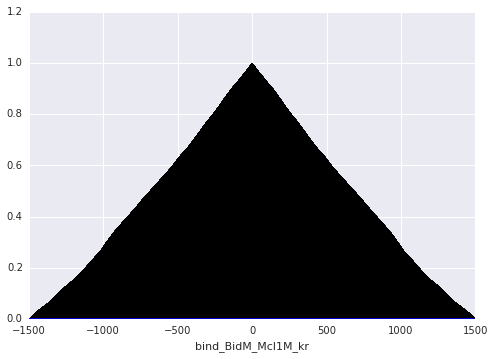

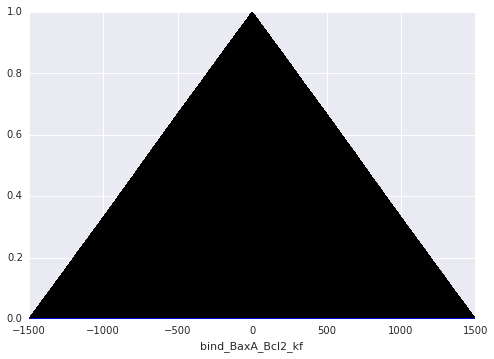

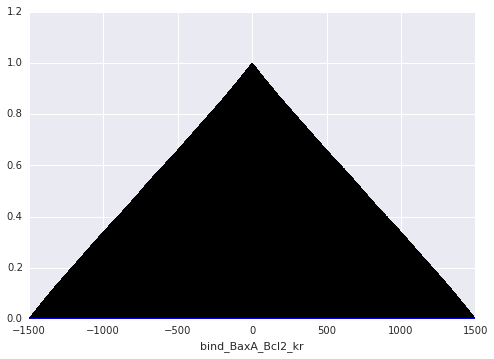

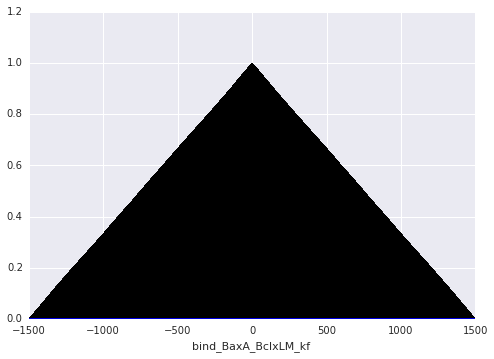

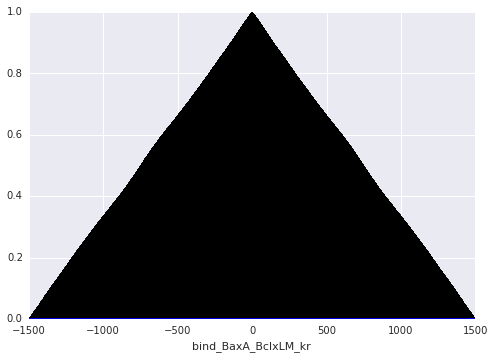

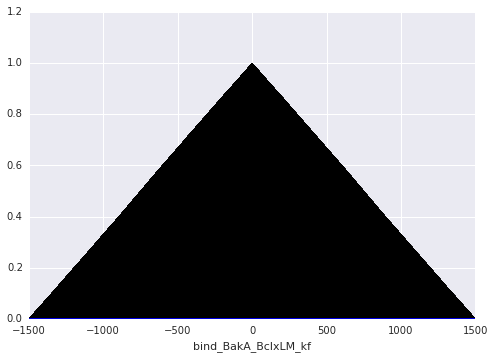

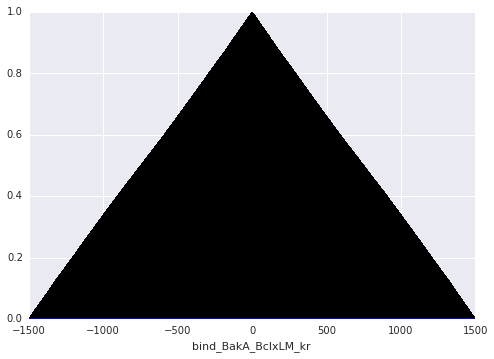

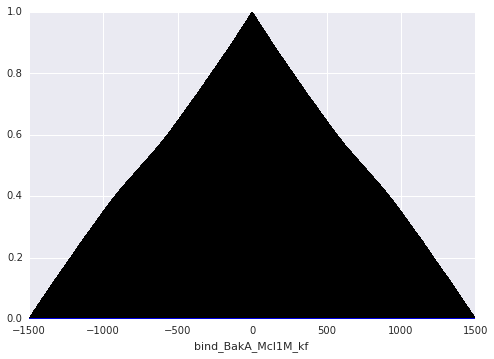

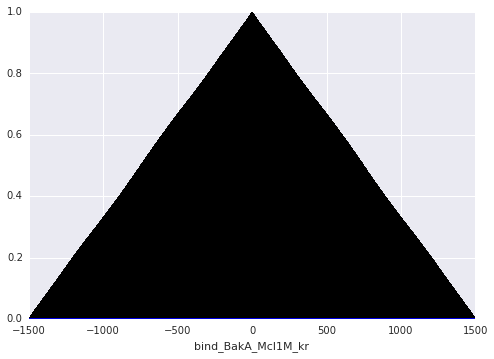

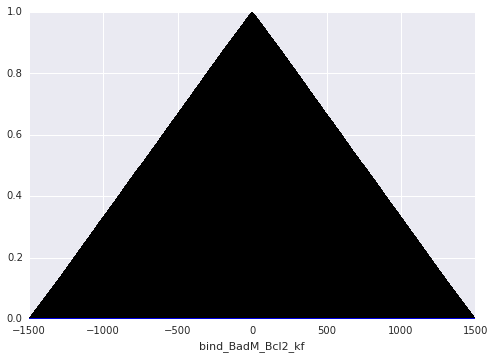

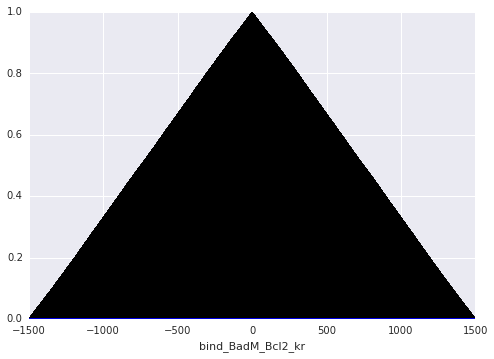

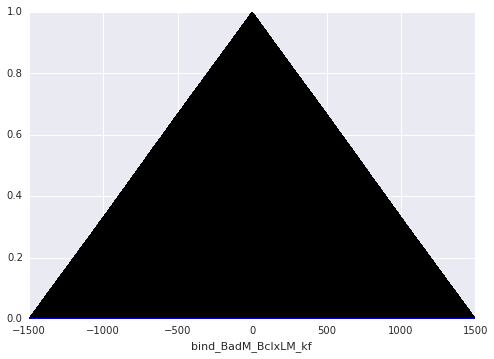

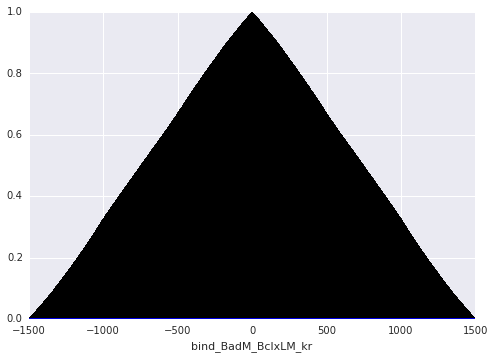

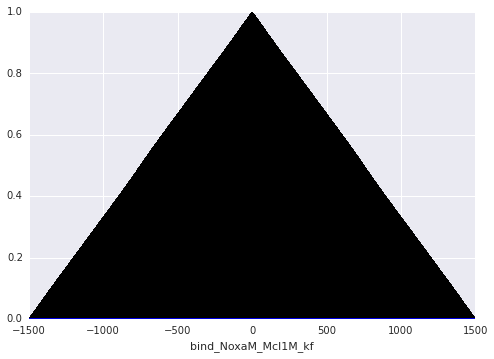

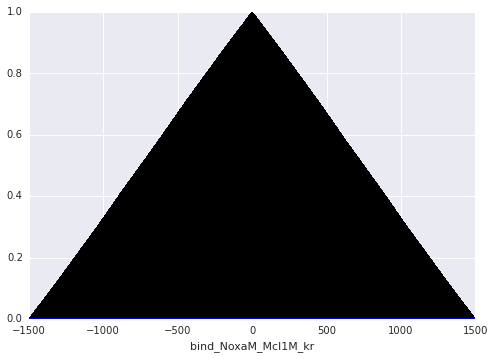

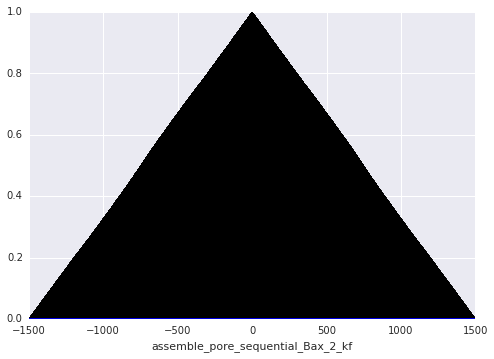

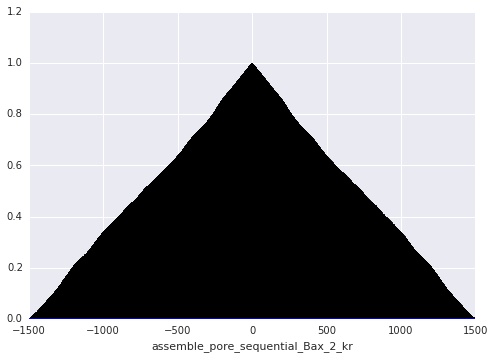

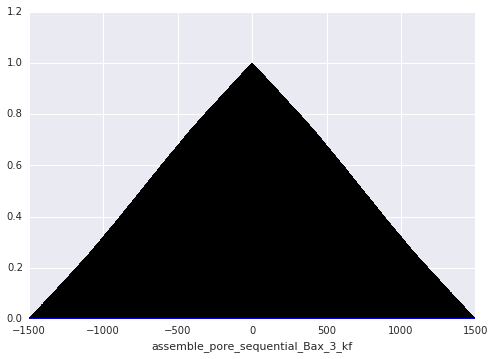

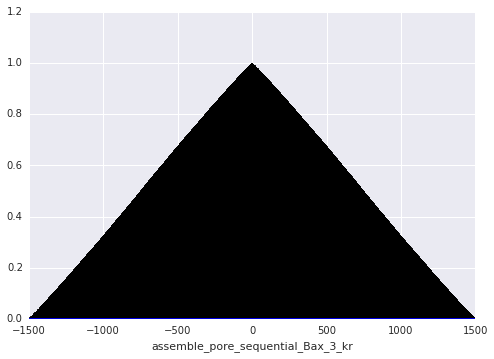

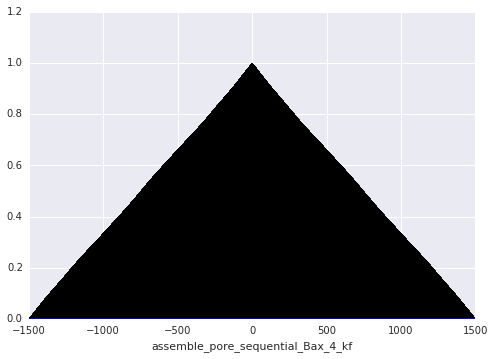

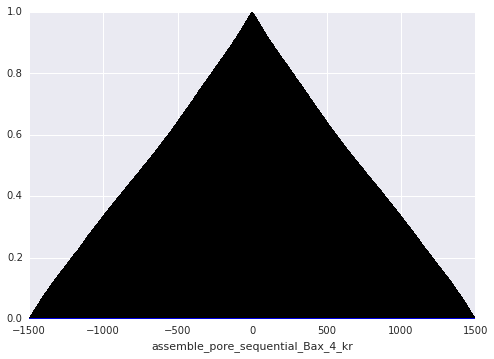

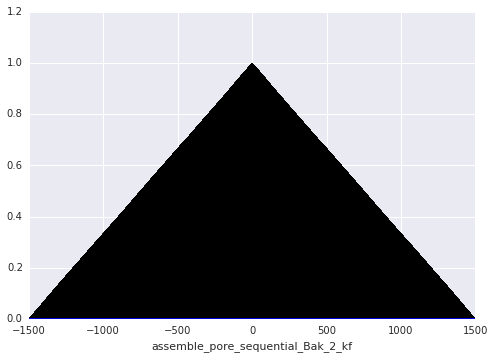

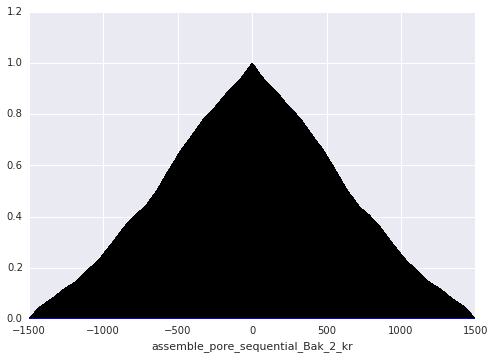

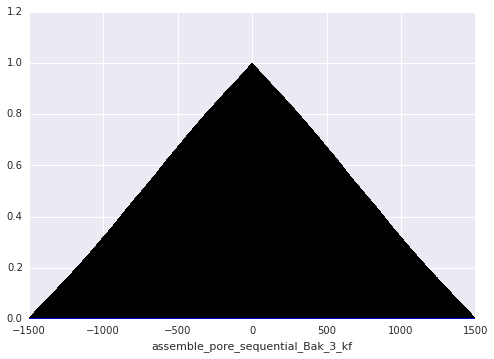

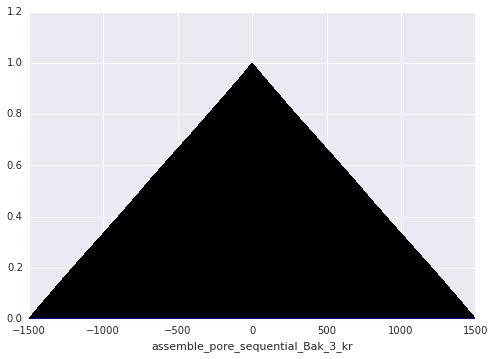

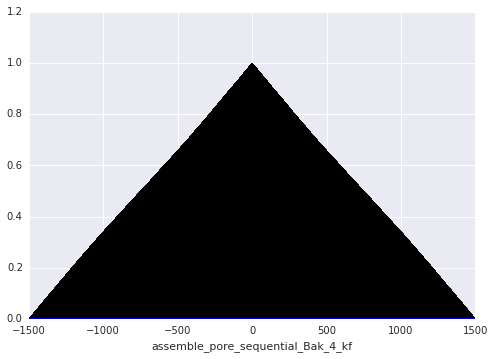

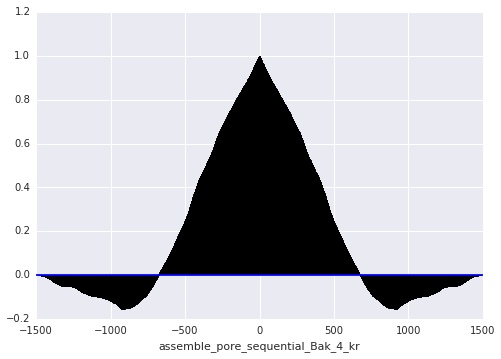

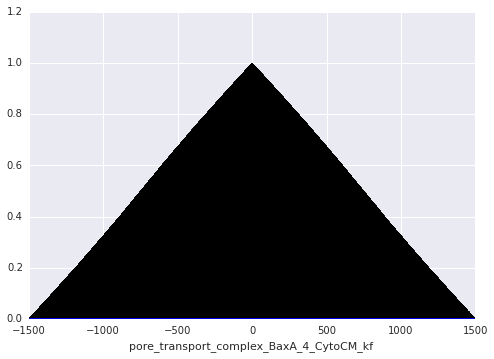

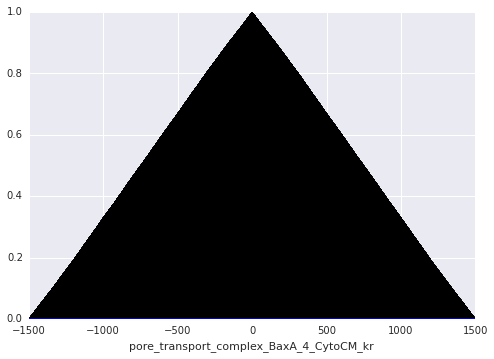

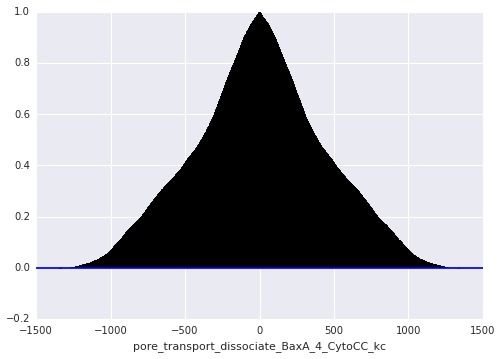

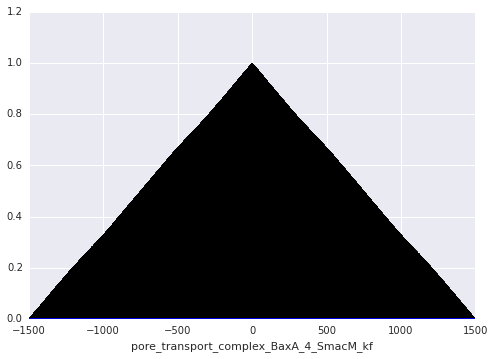

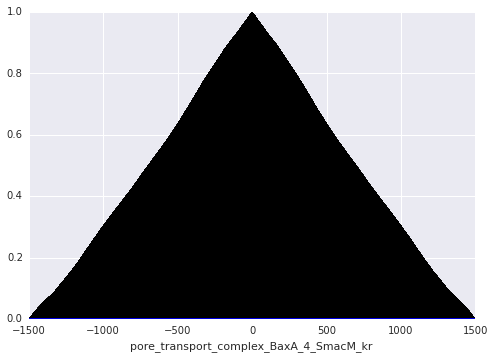

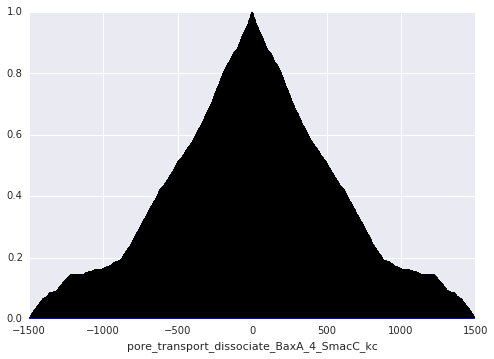

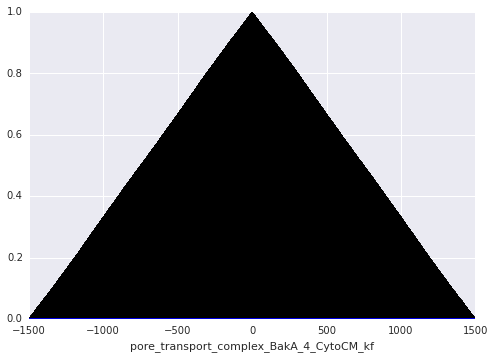

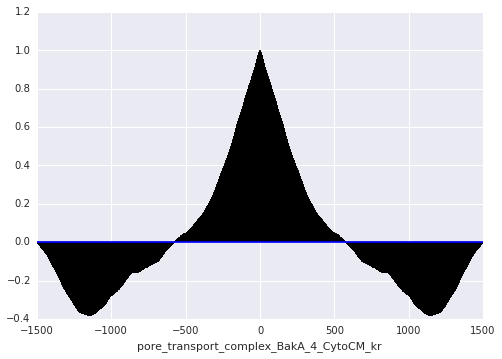

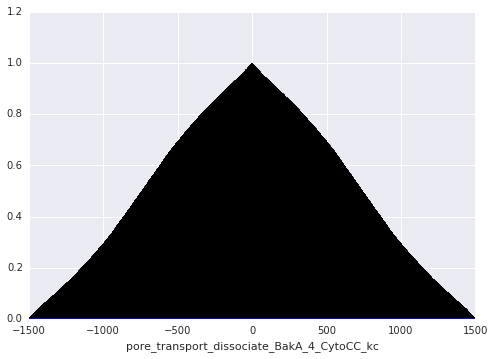

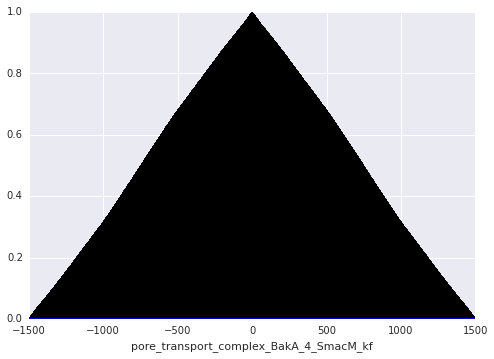

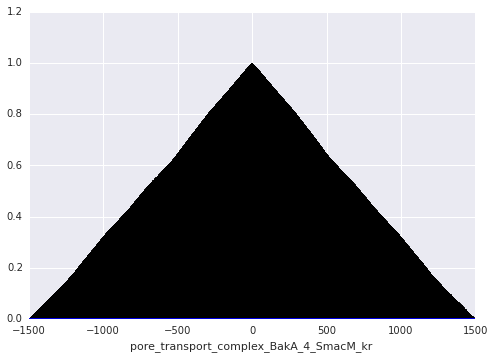

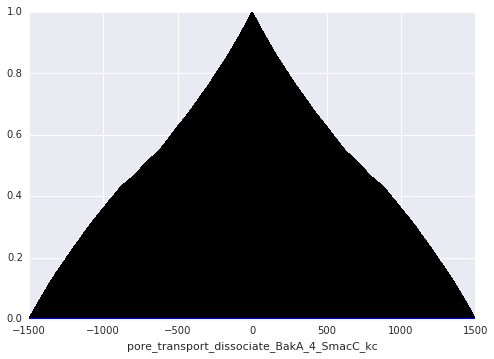

In [13]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

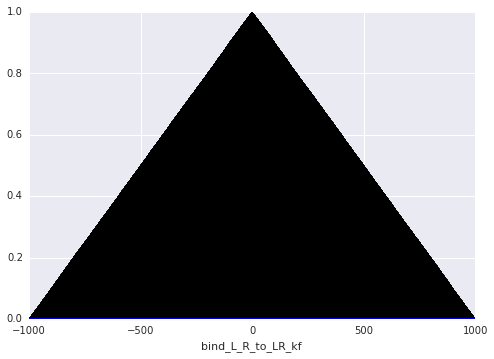

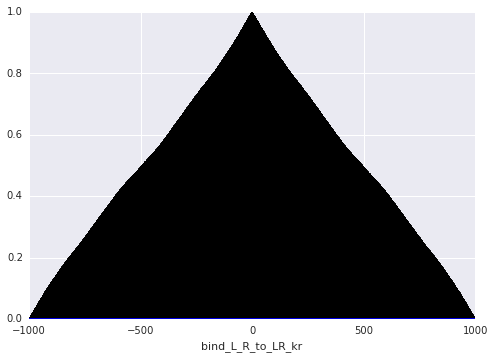

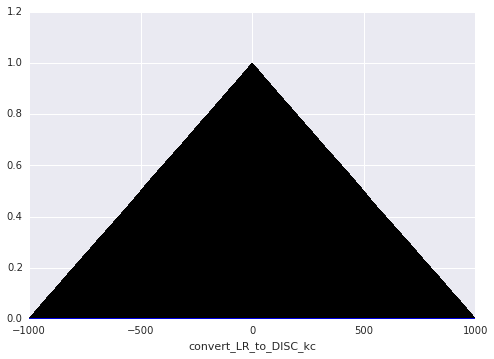

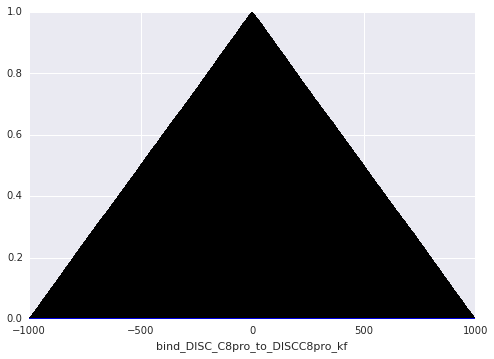

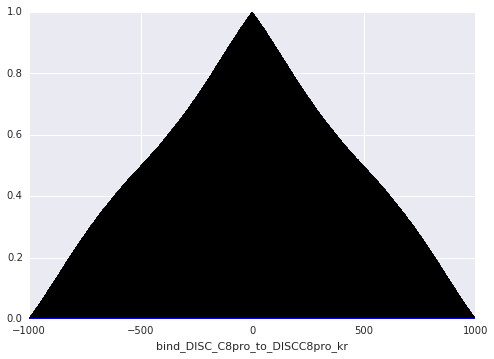

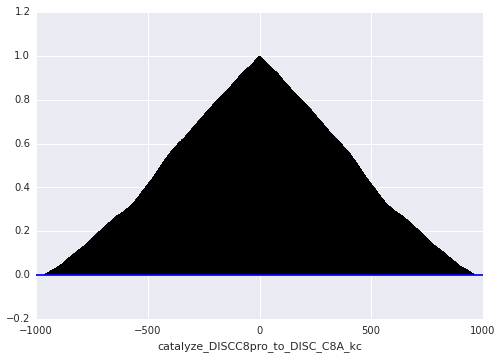

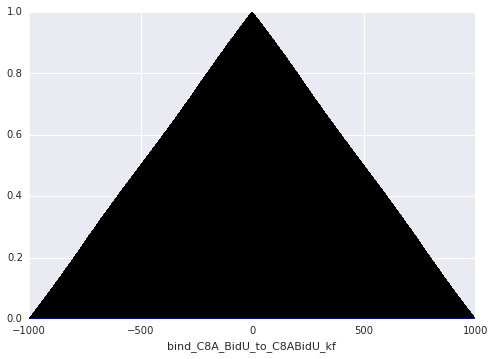

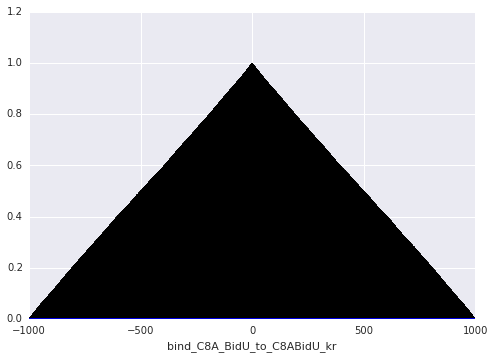

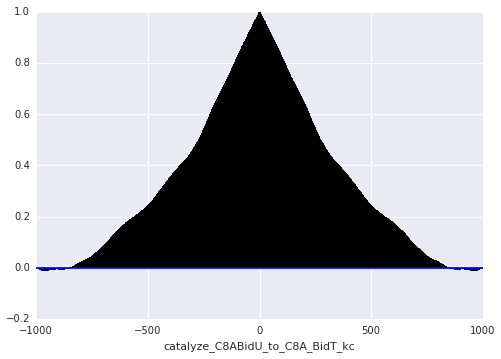

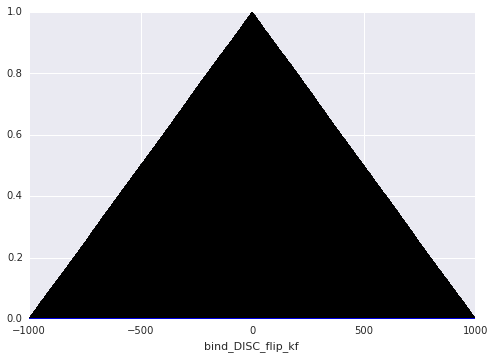

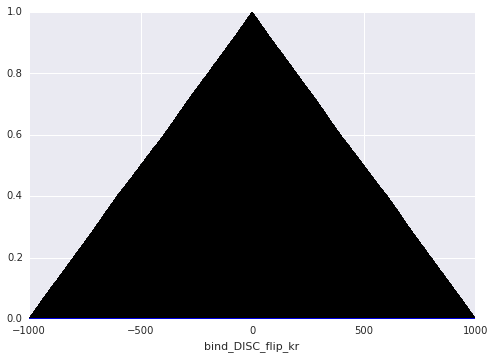

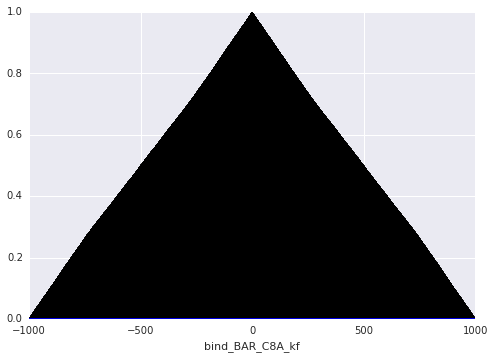

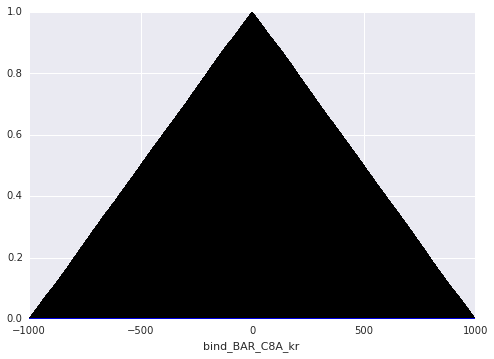

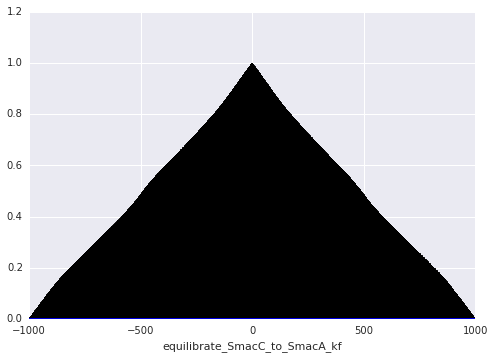

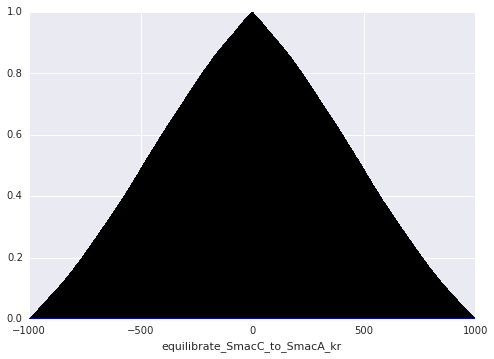

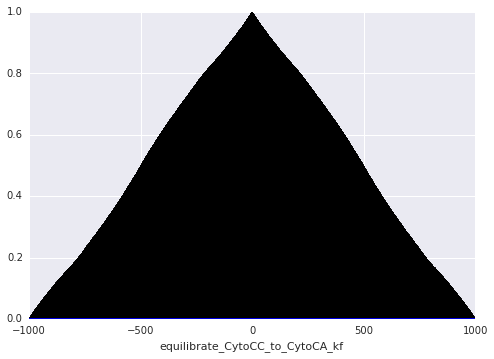

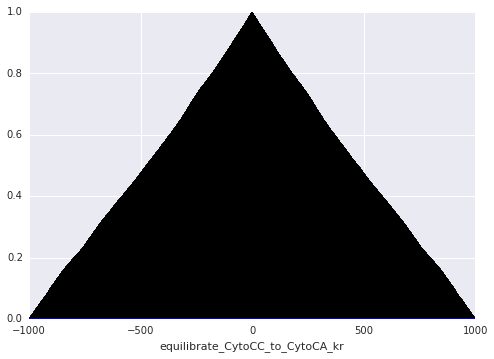

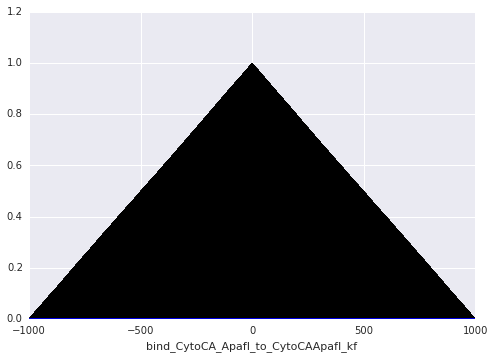

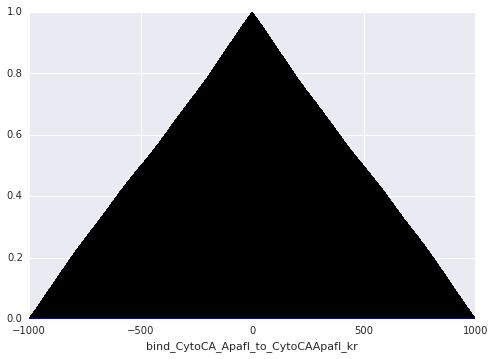

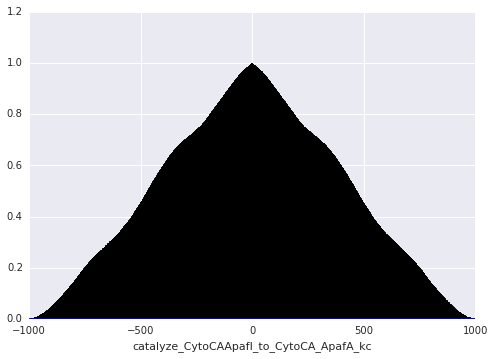

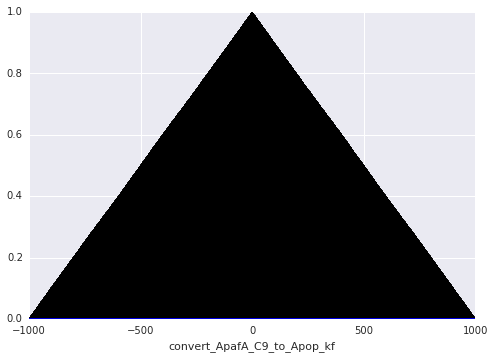

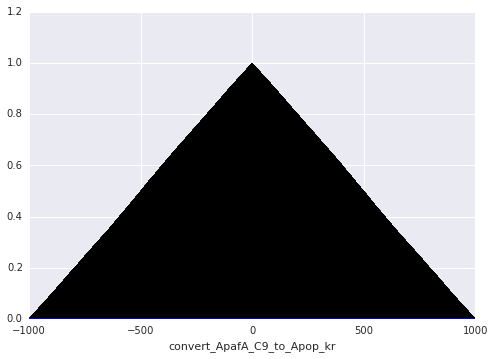

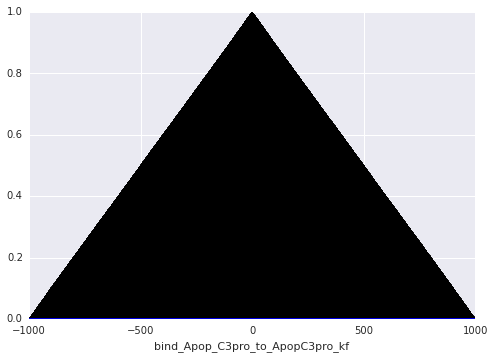

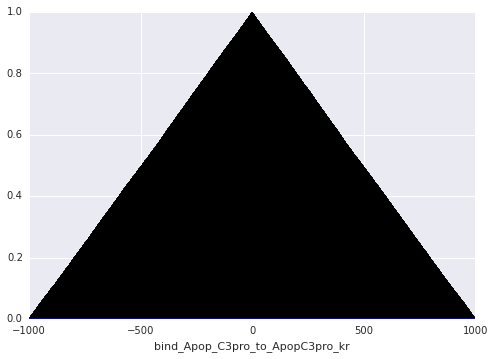

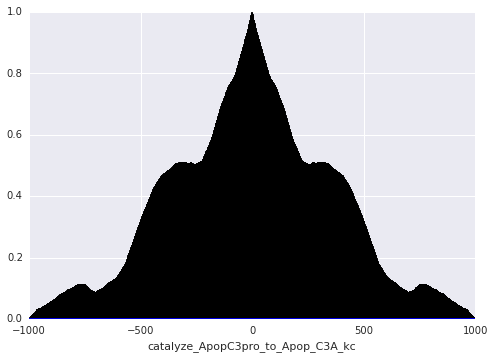

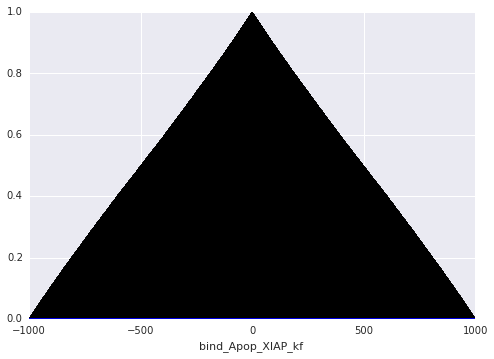

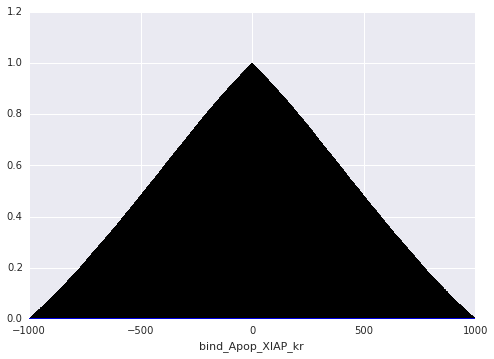

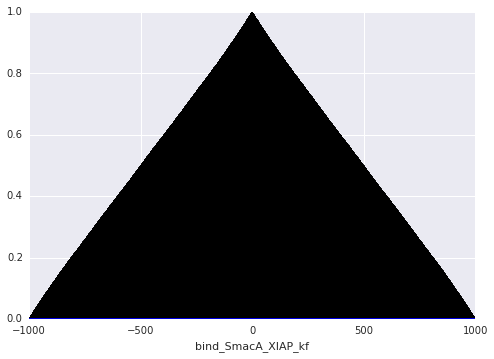

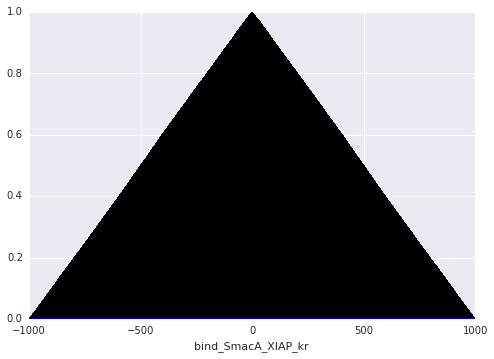

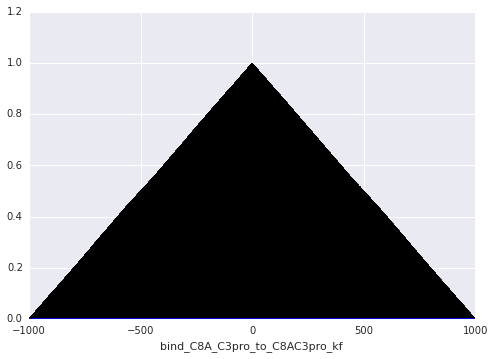

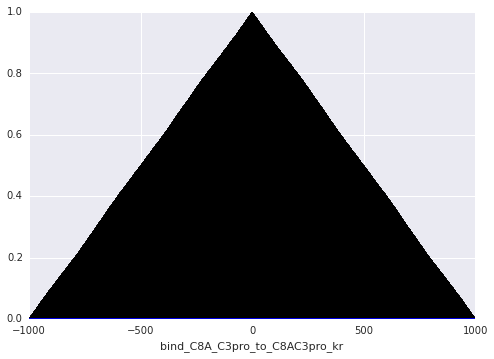

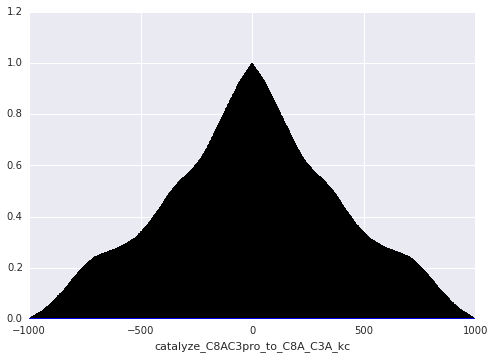

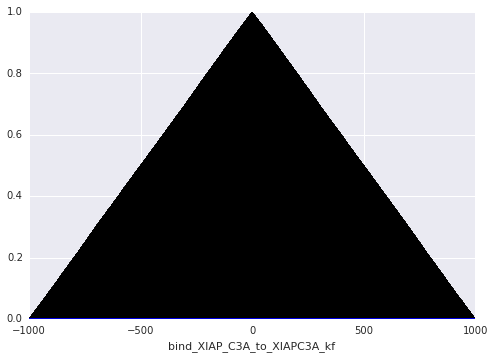

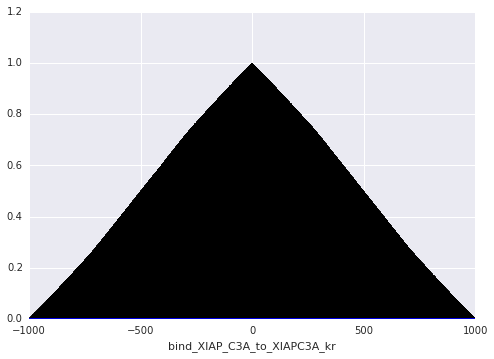

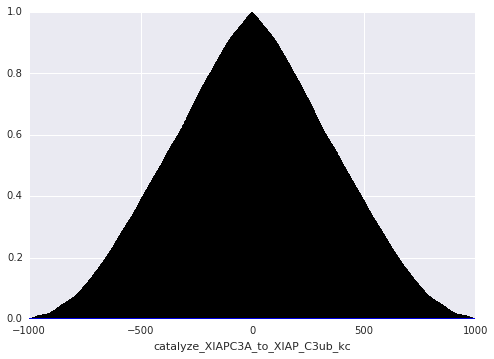

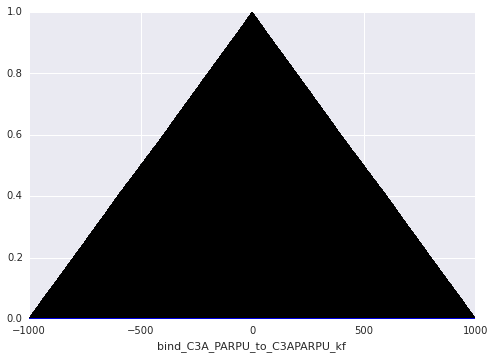

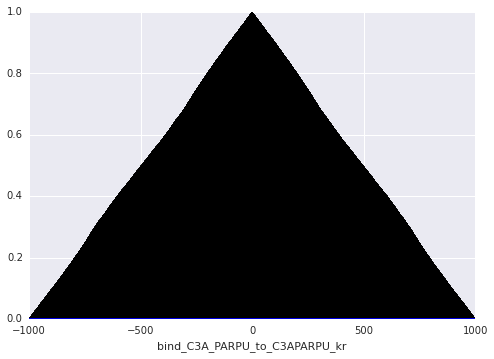

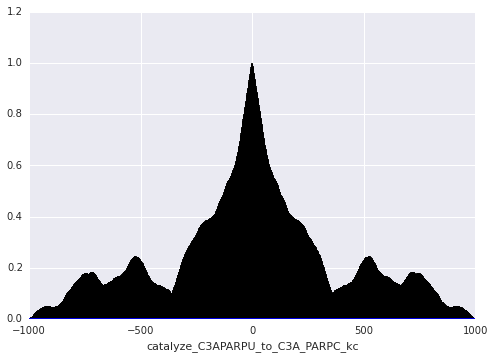

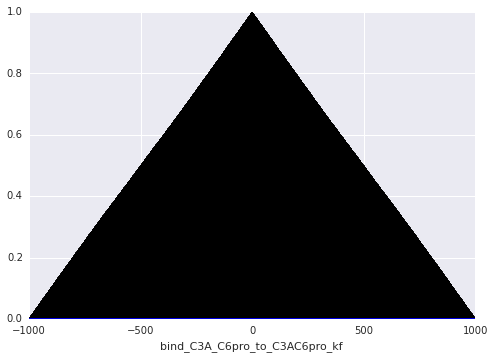

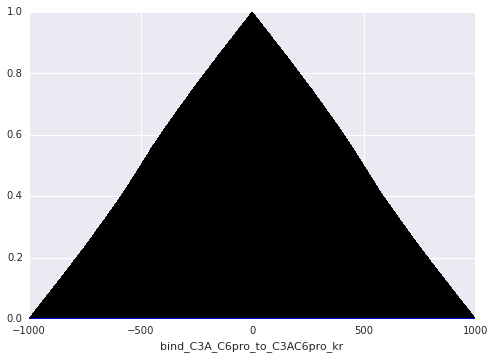

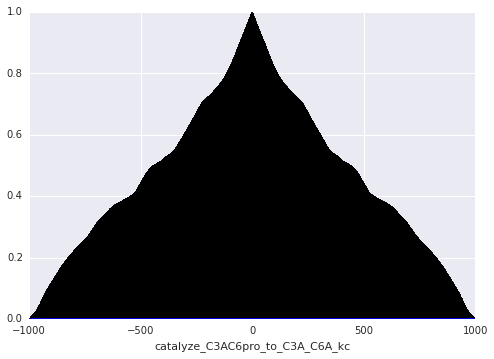

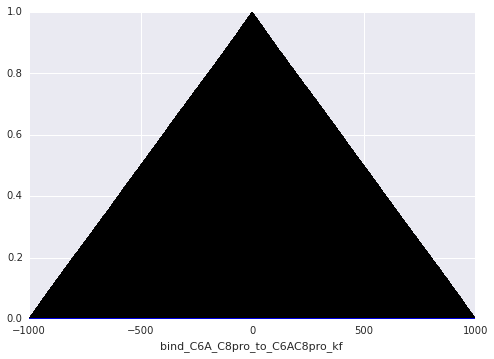

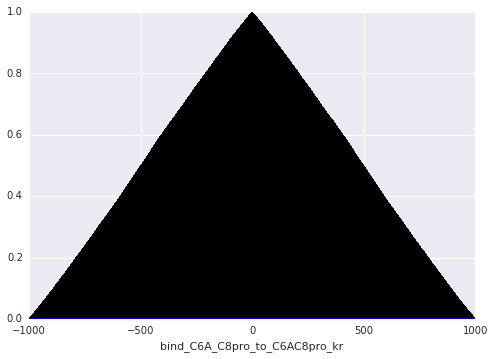

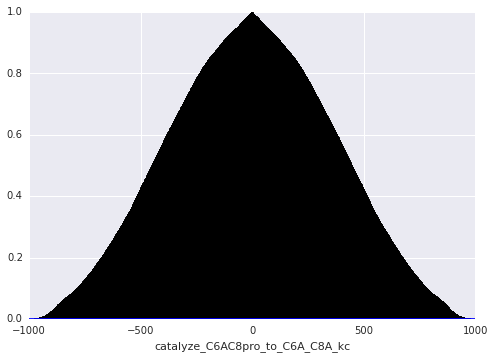

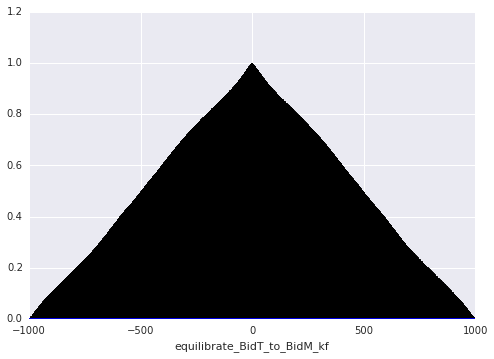

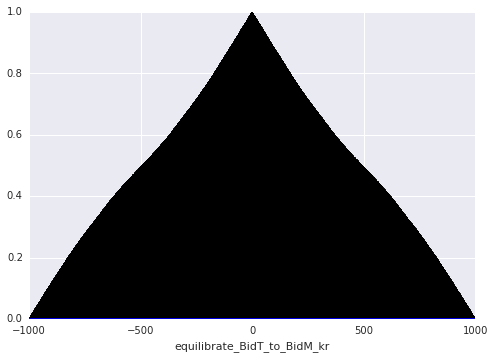

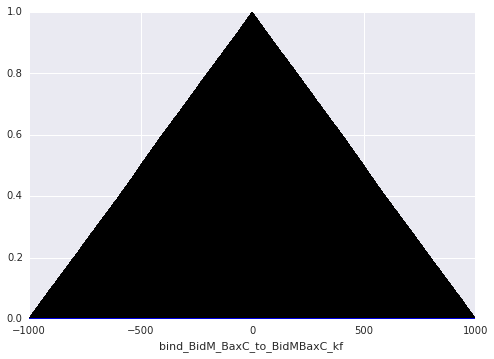

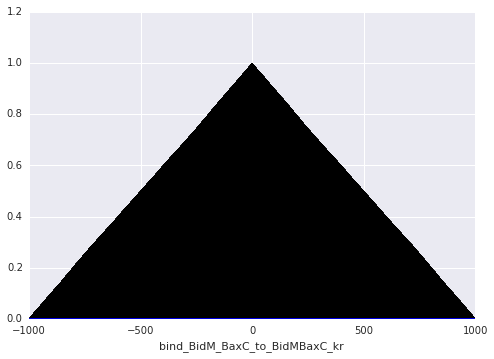

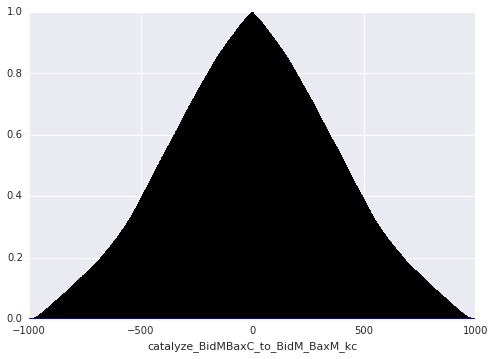

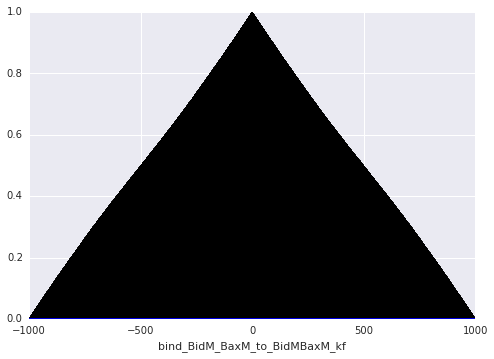

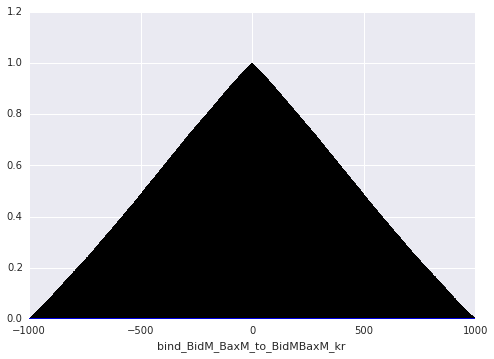

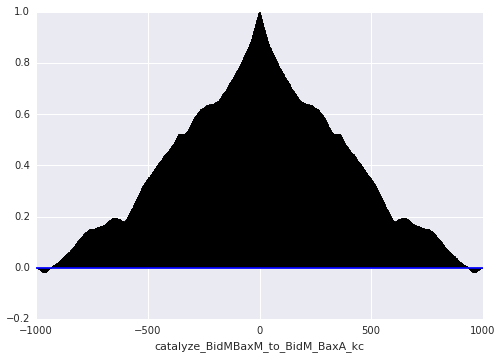

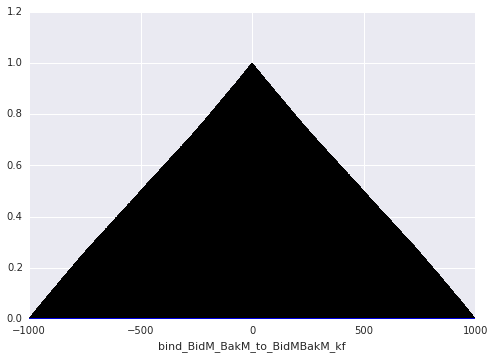

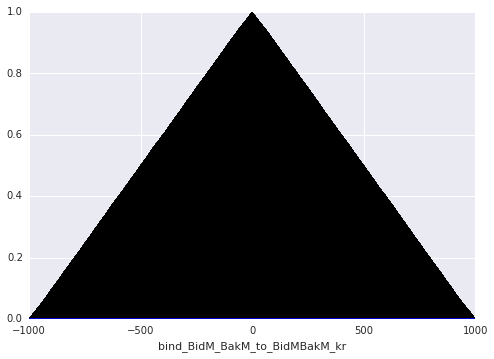

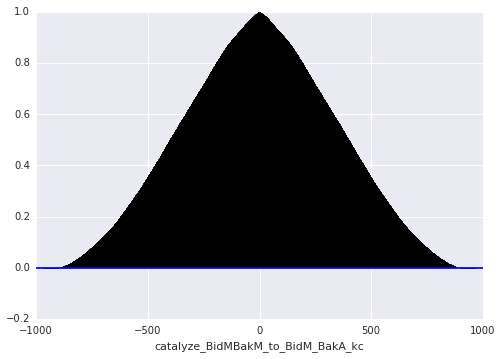

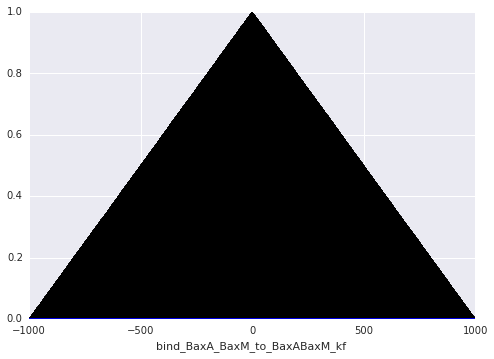

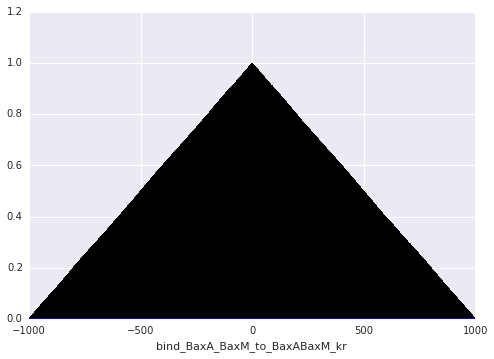

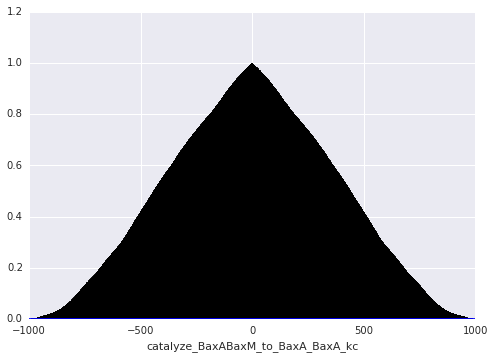

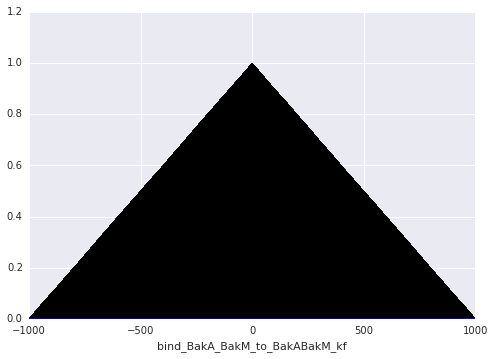

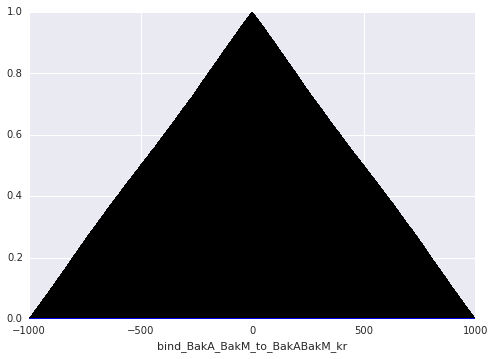

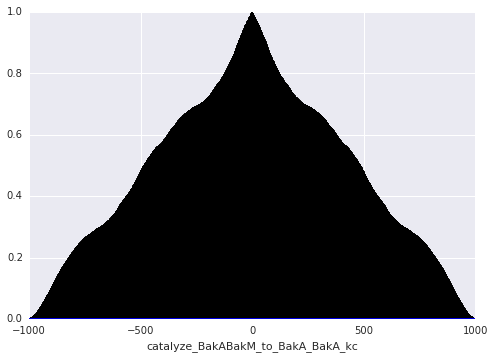

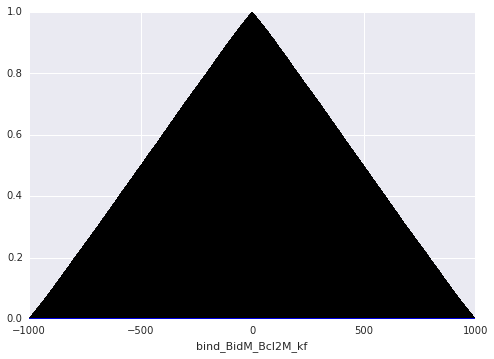

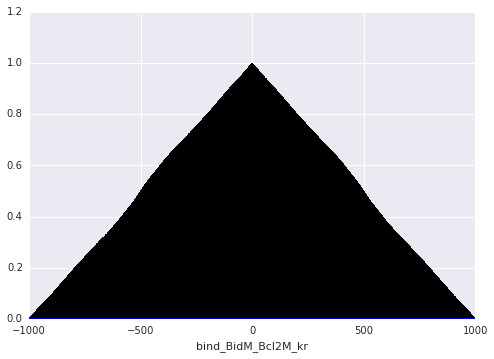

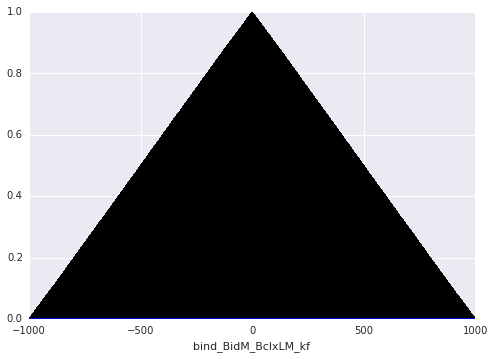

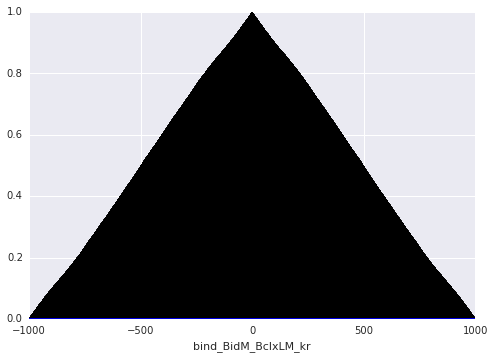

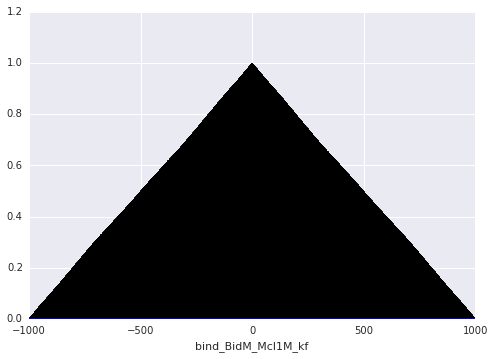

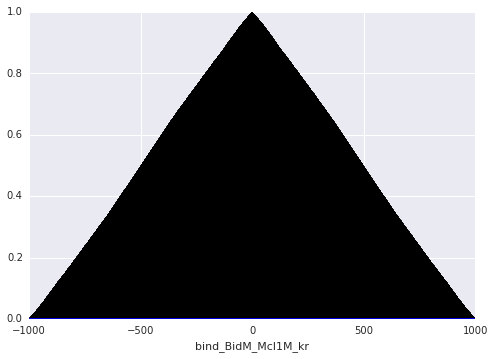

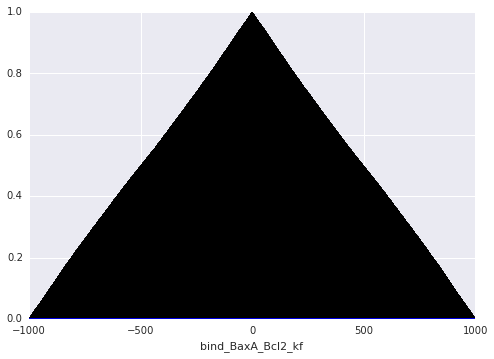

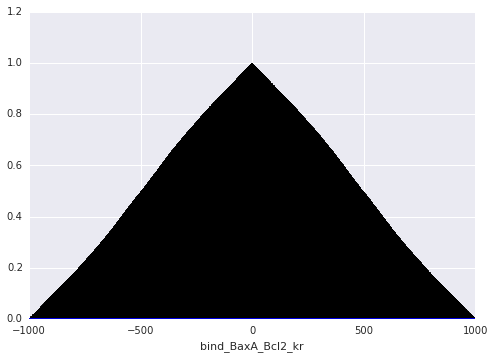

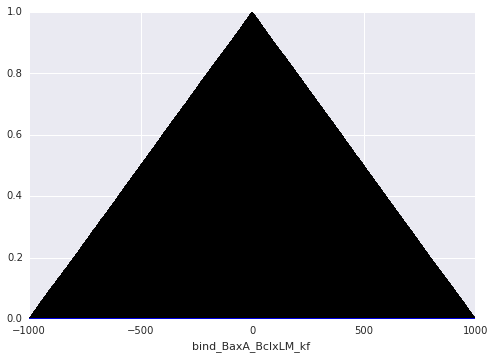

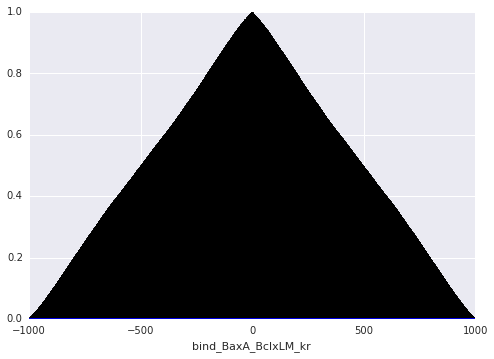

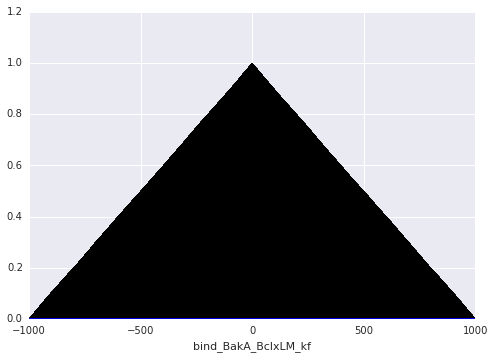

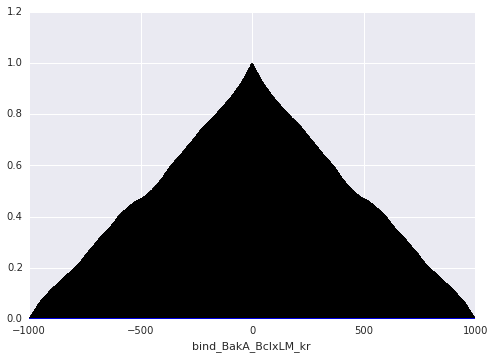

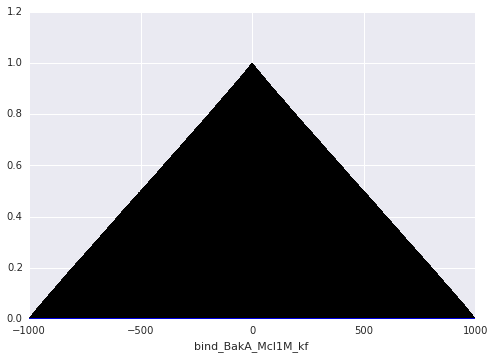

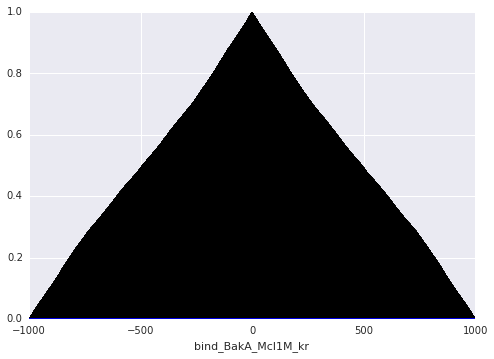

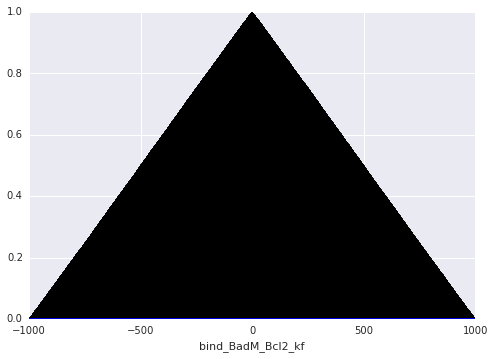

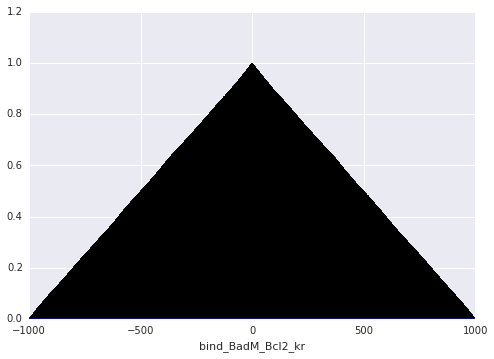

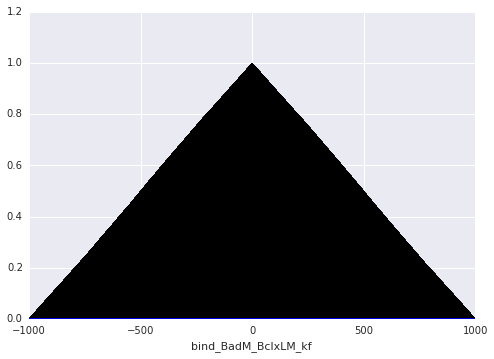

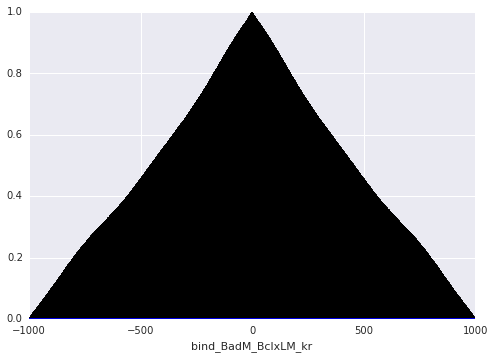

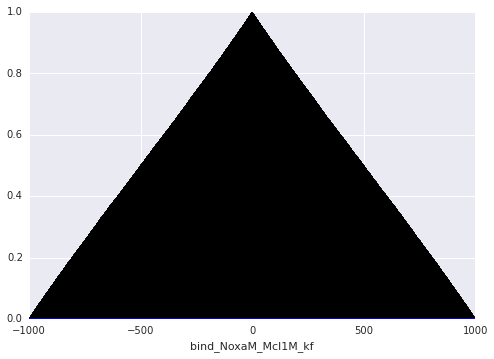

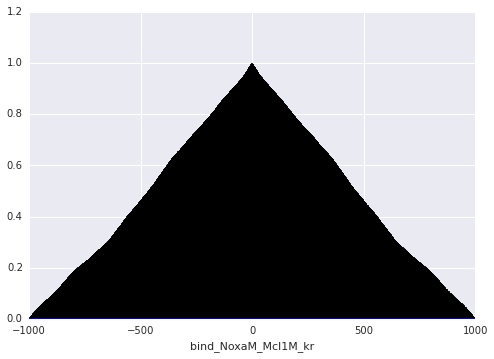

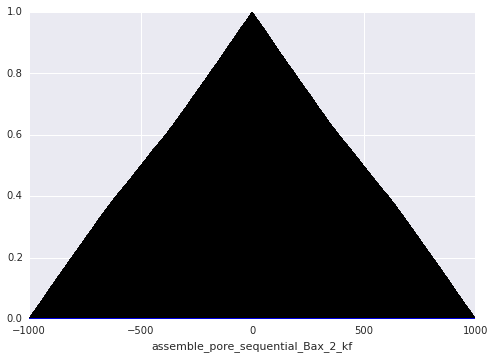

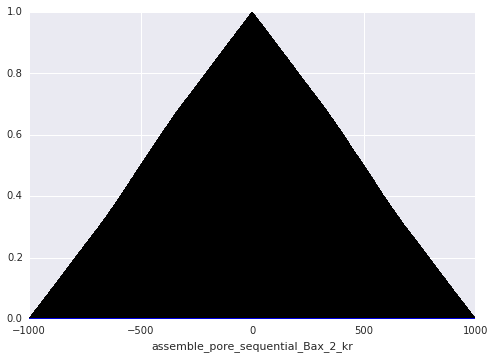

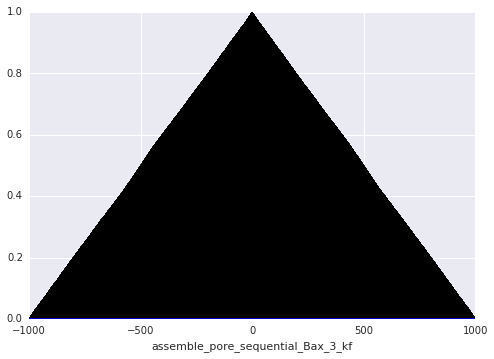

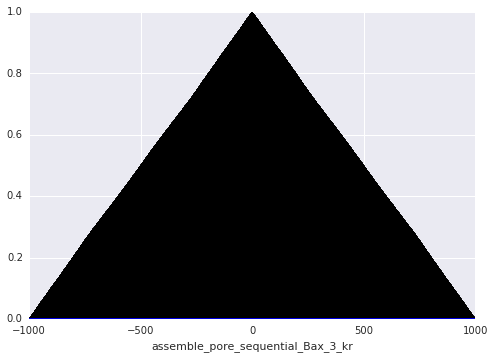

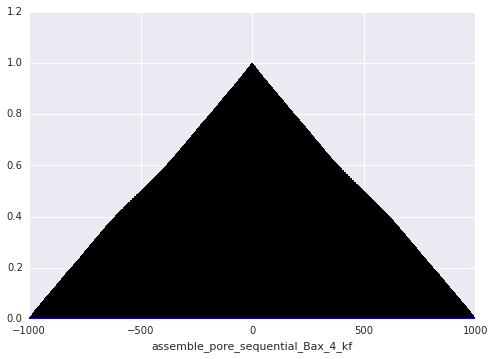

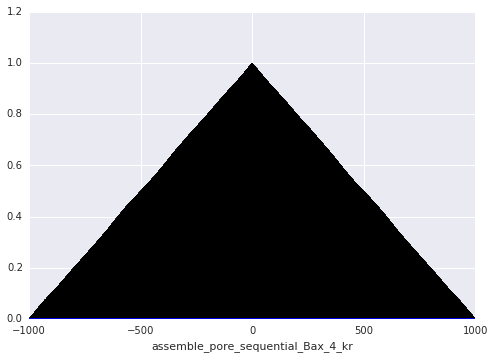

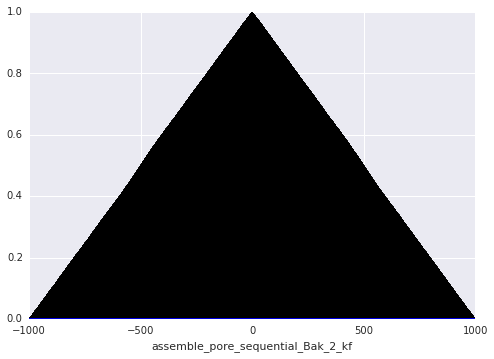

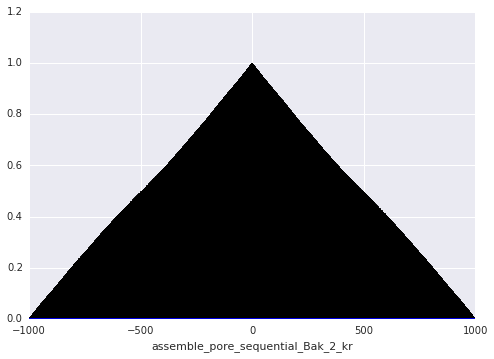

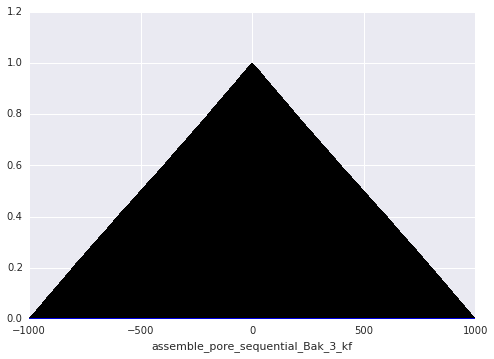

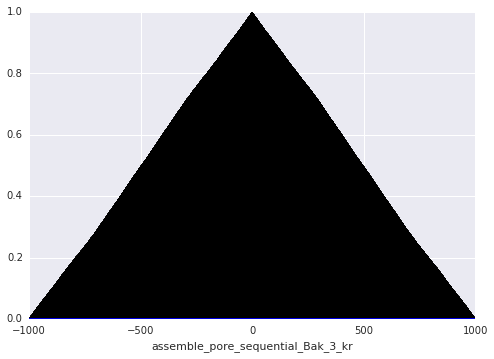

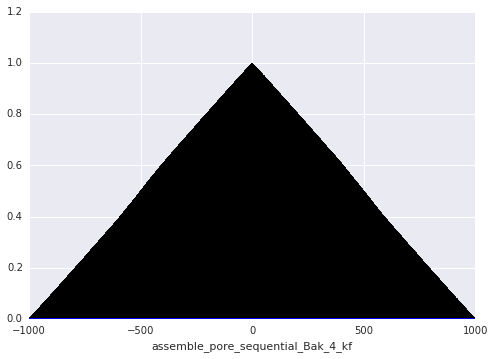

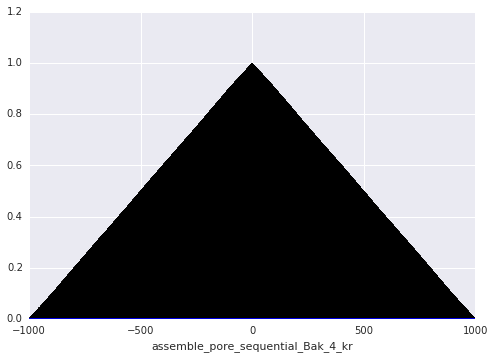

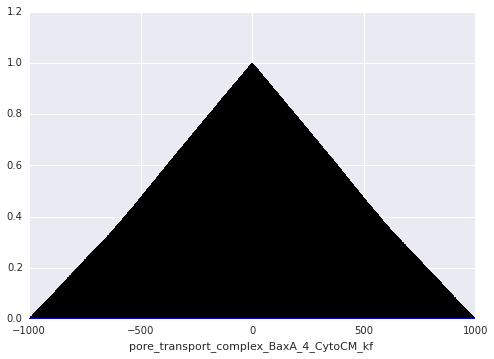

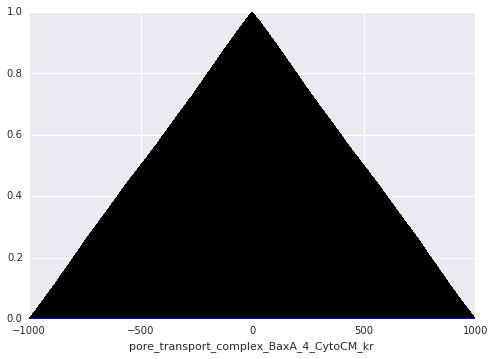

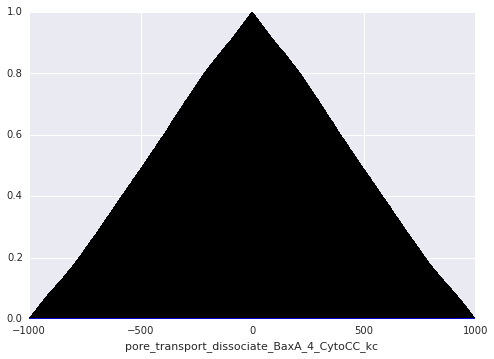

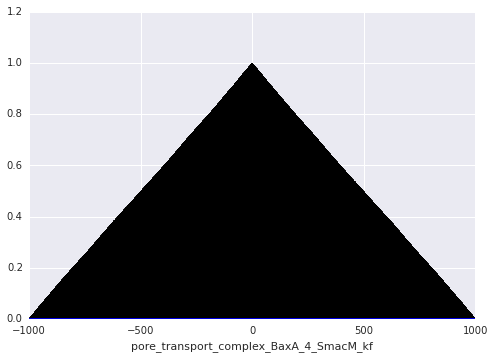

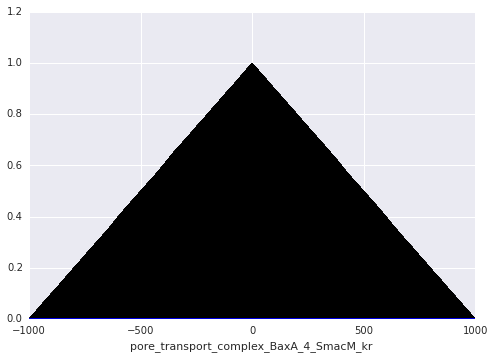

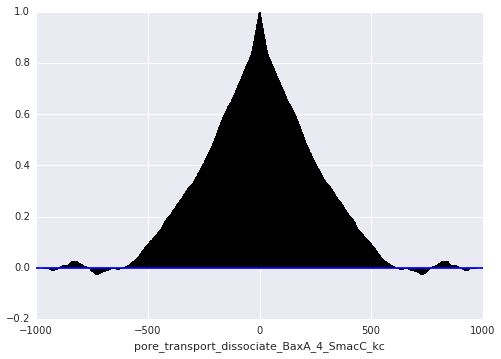

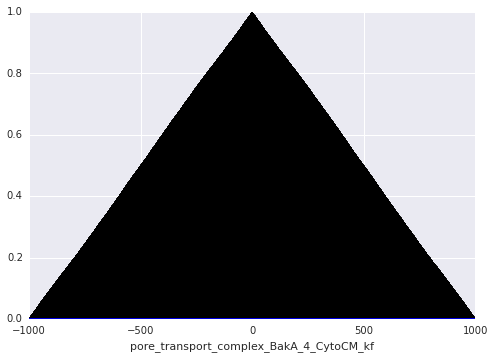

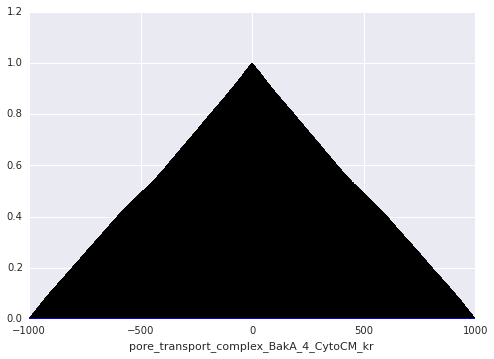

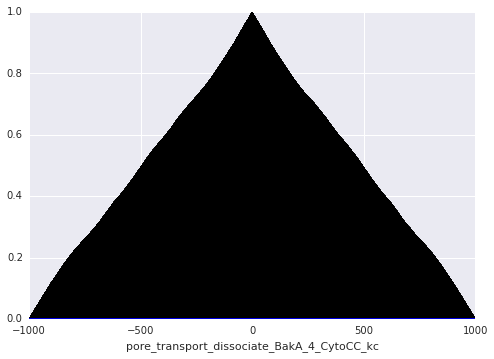

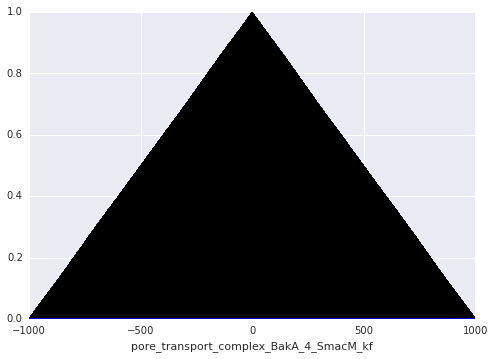

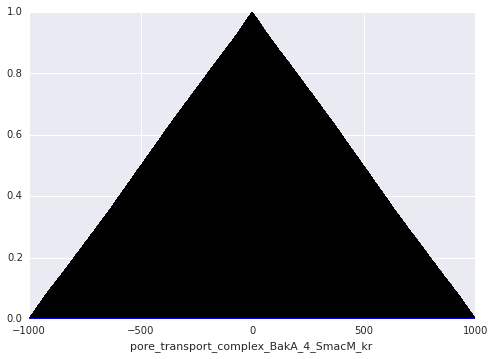

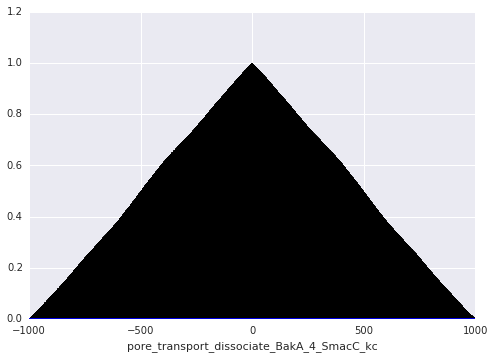

In [14]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

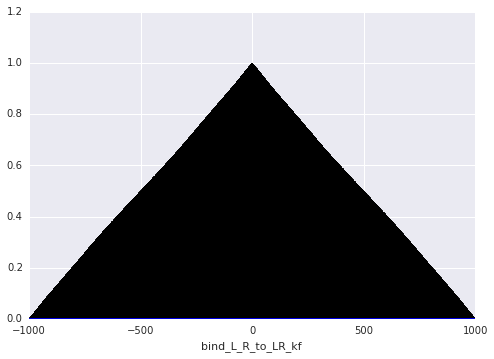

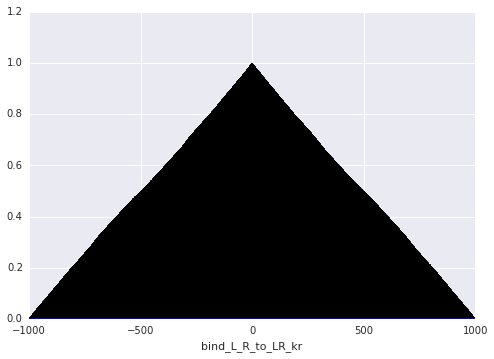

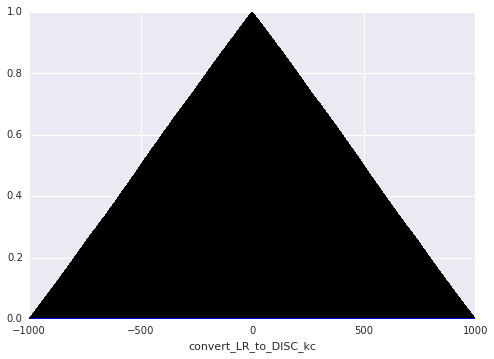

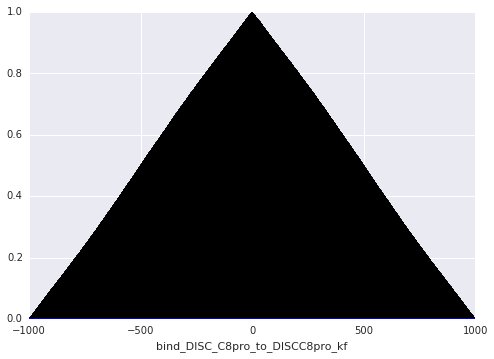

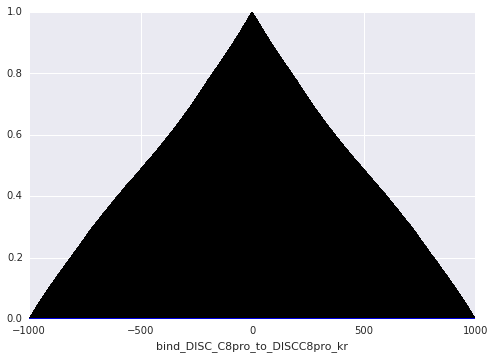

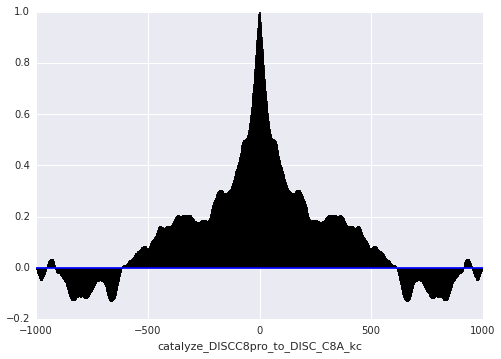

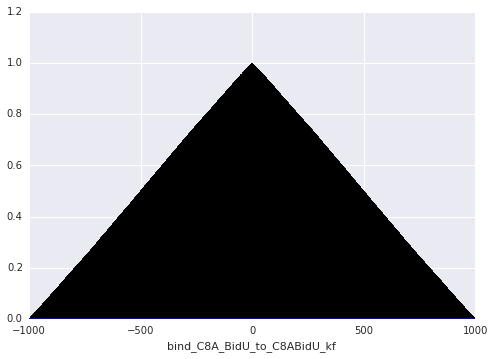

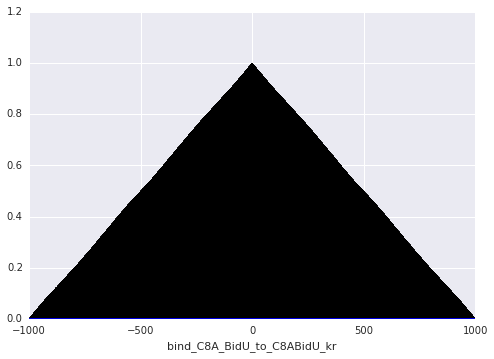

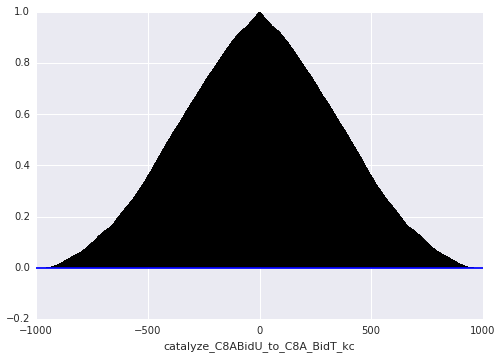

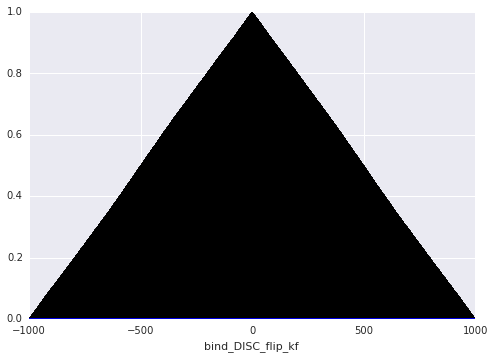

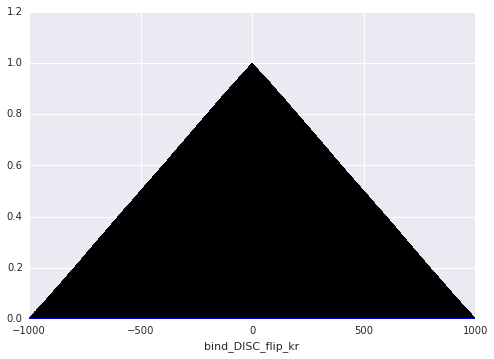

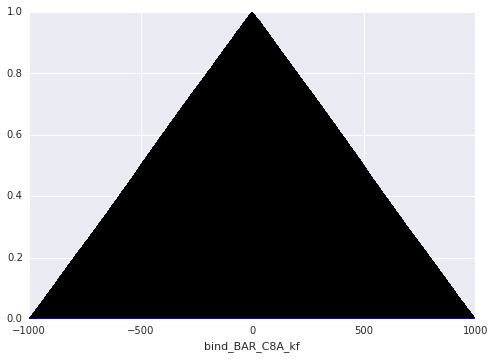

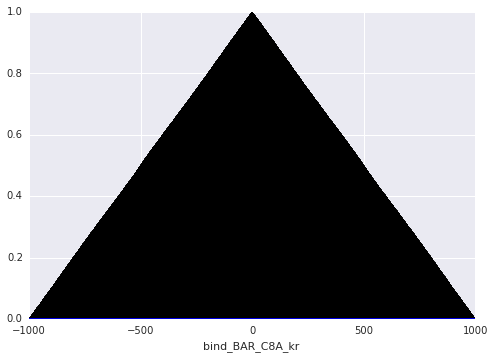

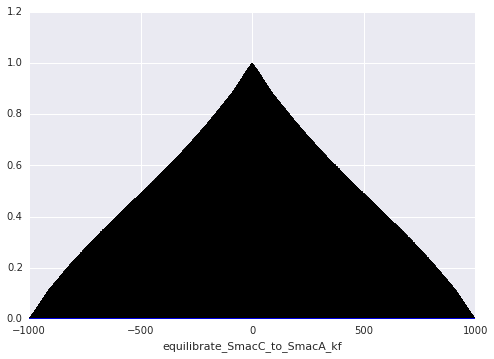

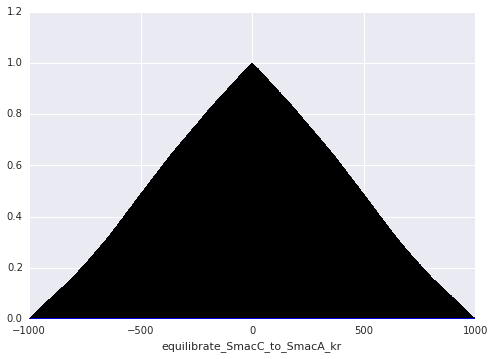

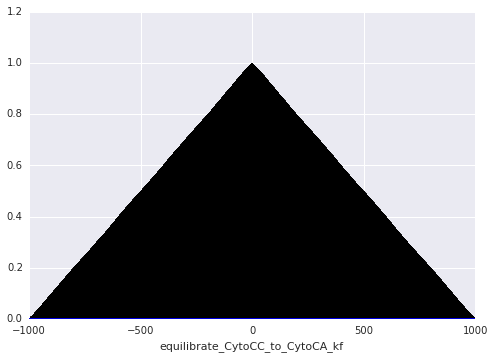

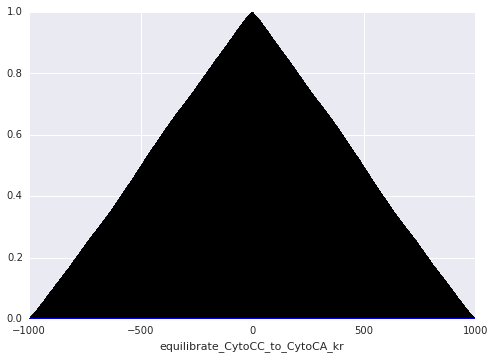

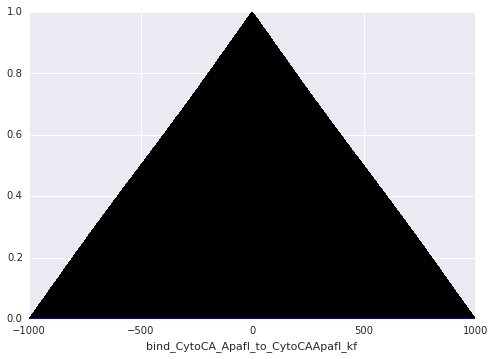

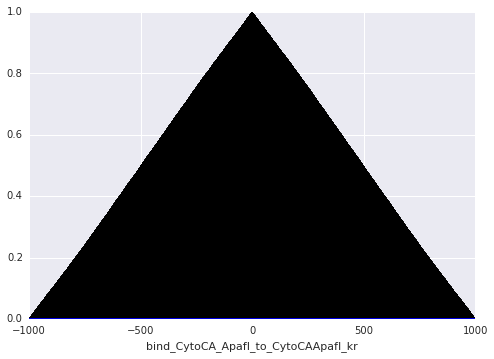

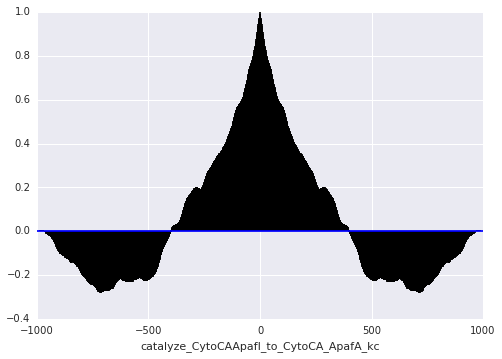

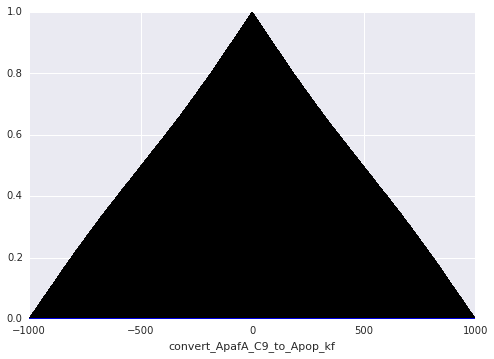

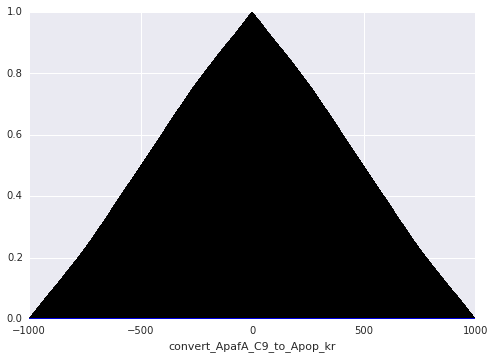

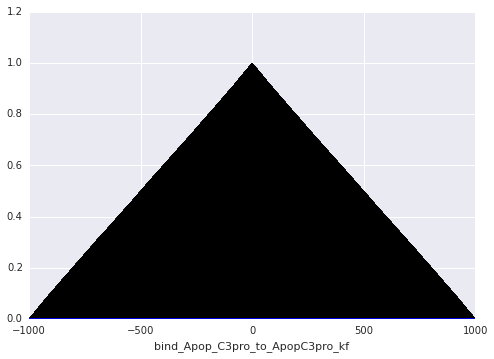

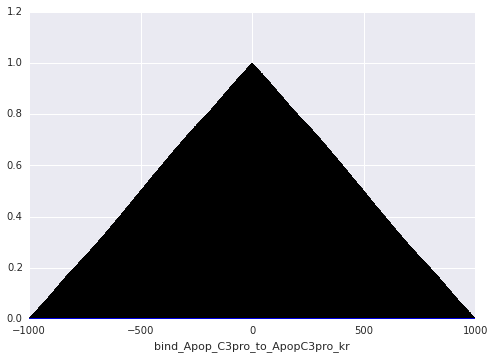

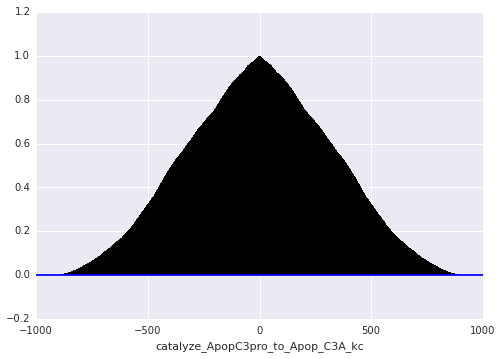

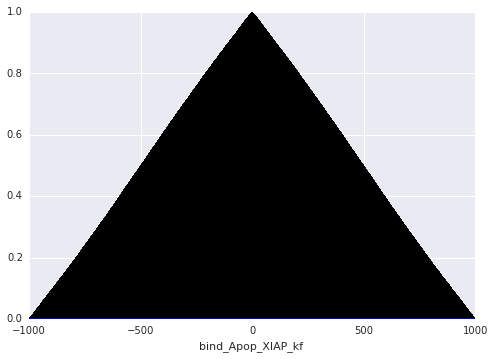

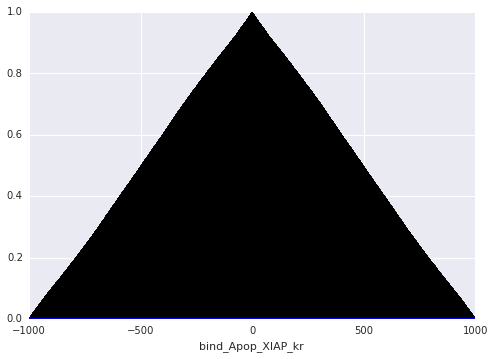

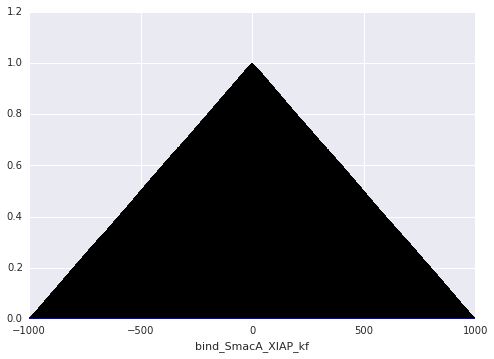

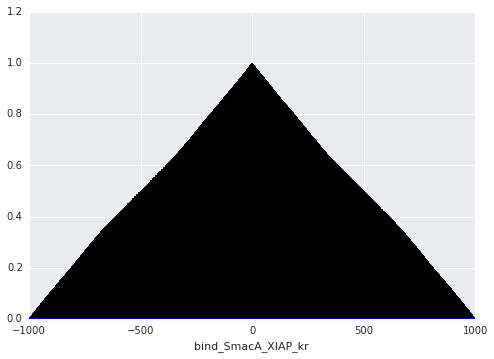

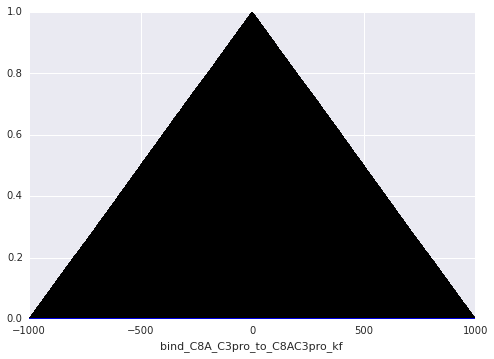

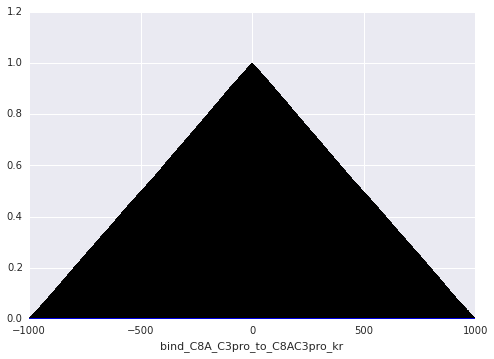

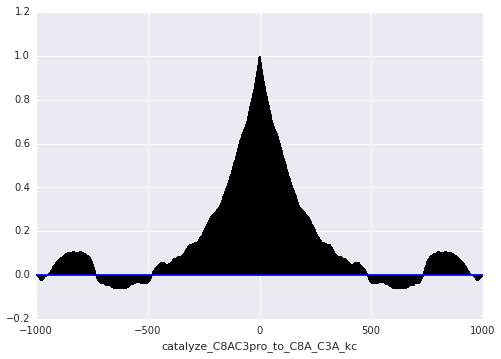

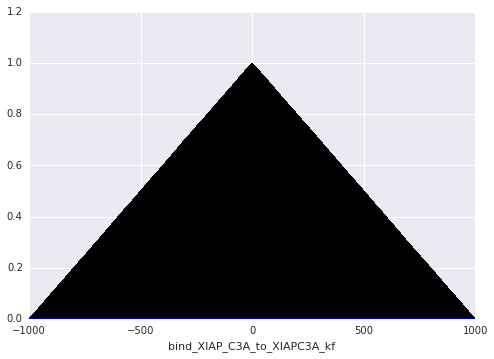

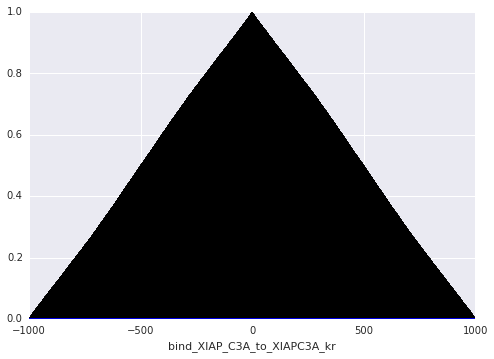

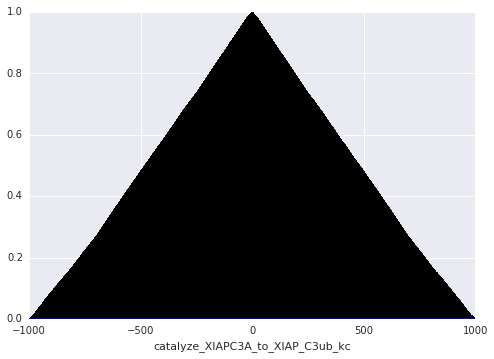

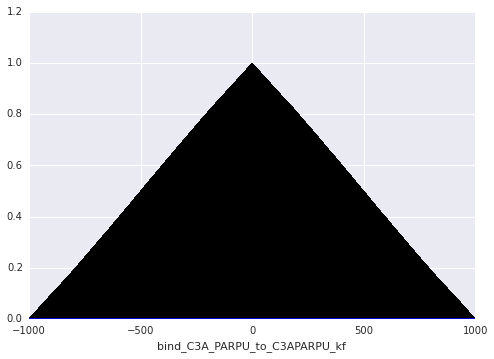

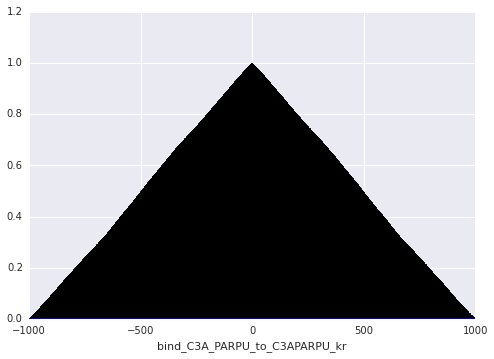

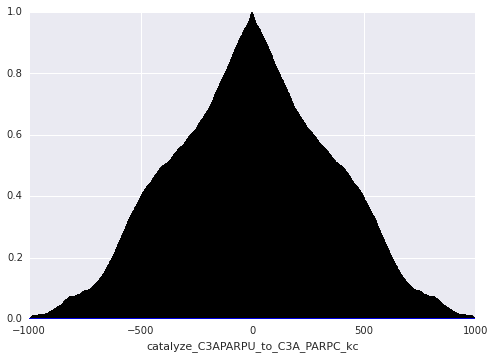

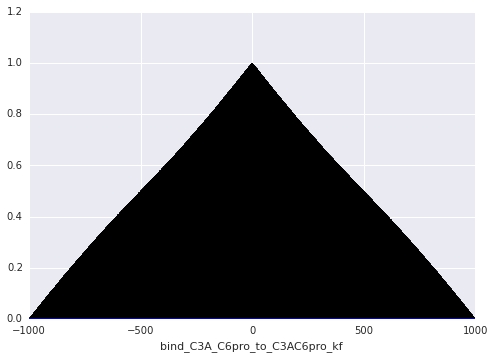

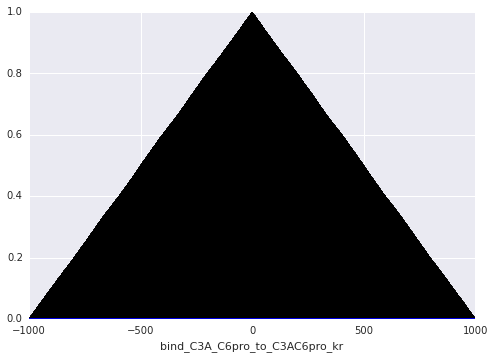

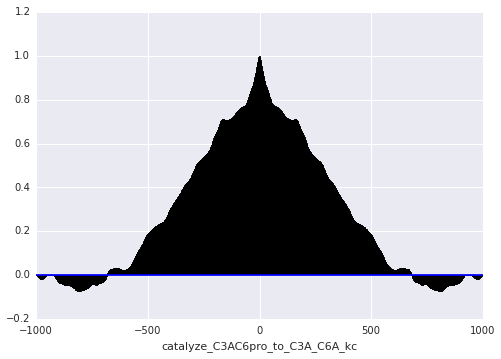

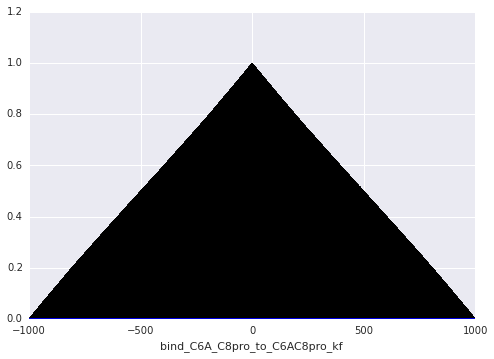

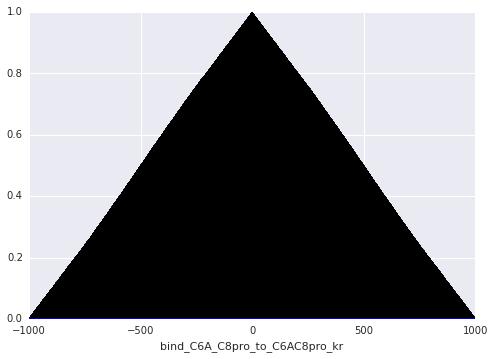

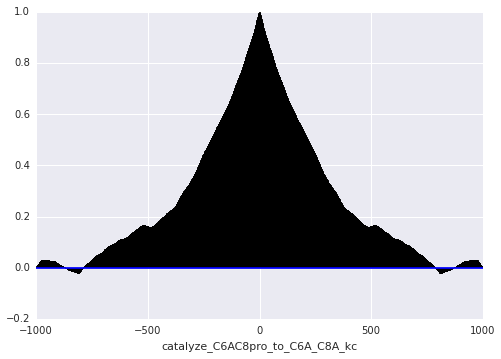

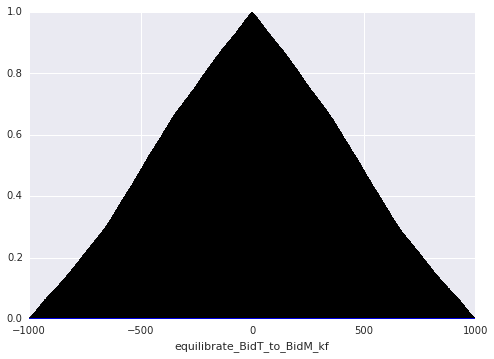

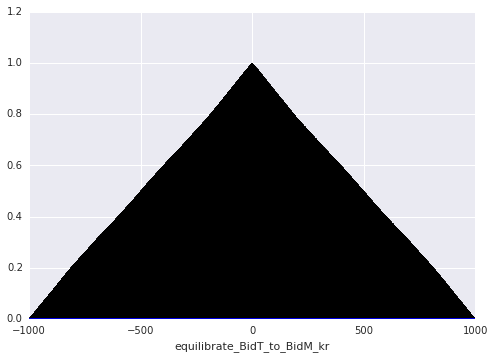

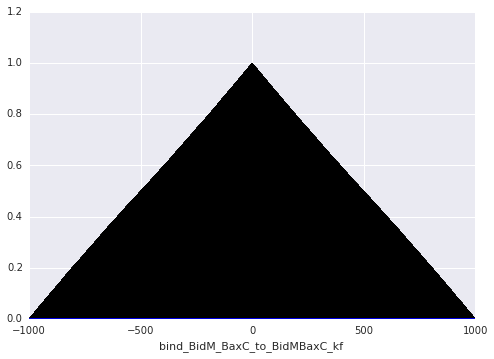

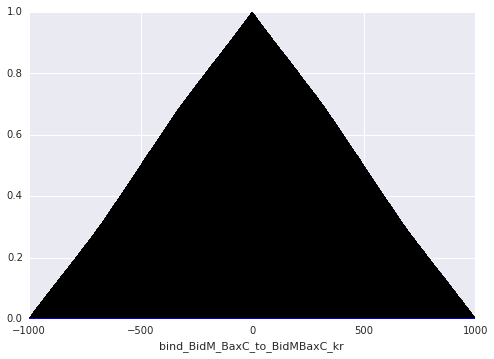

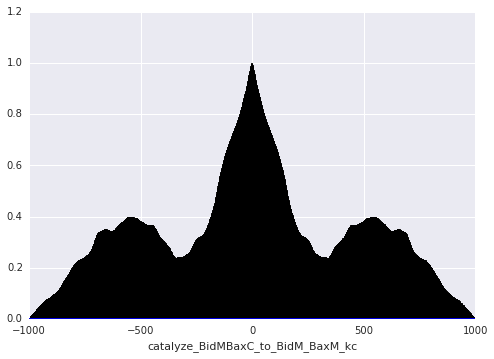

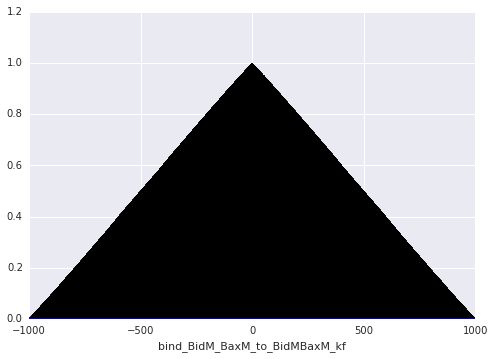

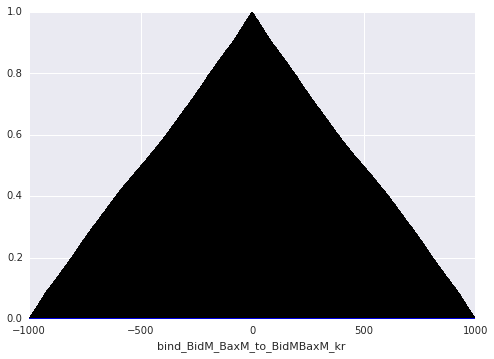

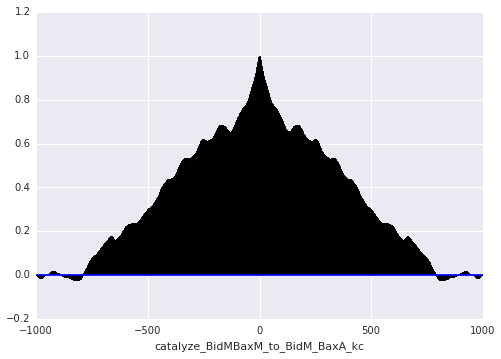

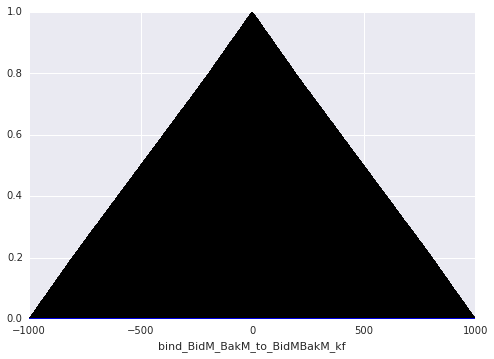

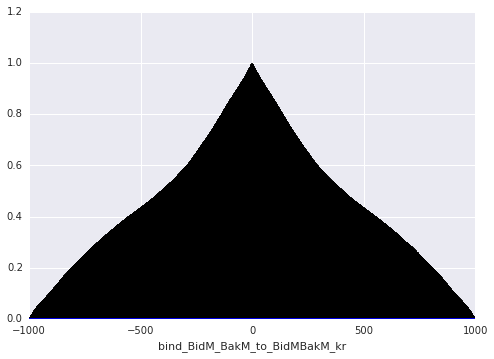

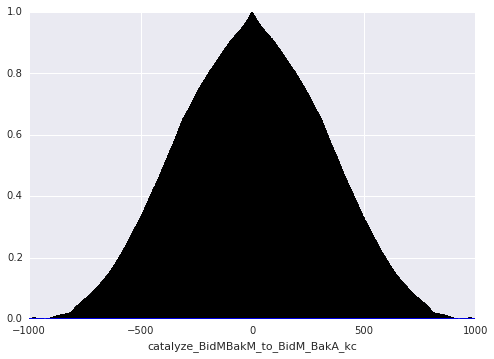

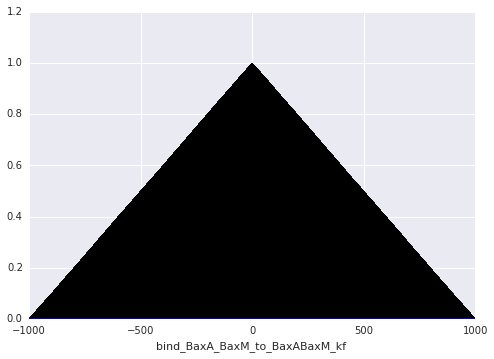

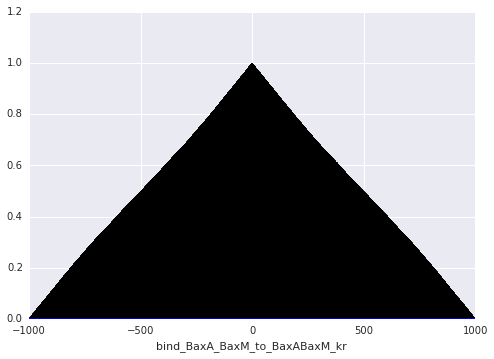

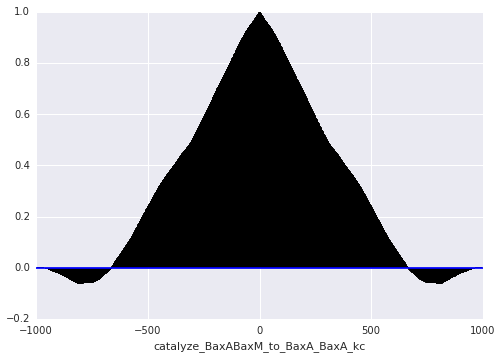

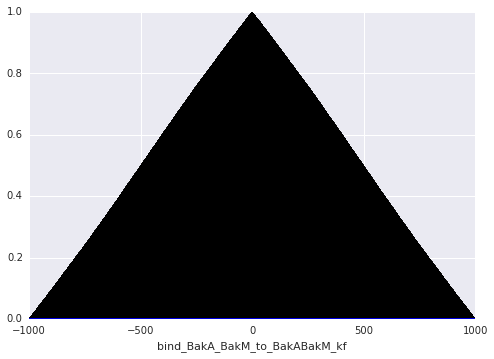

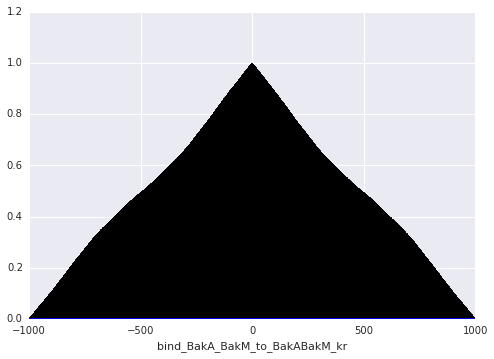

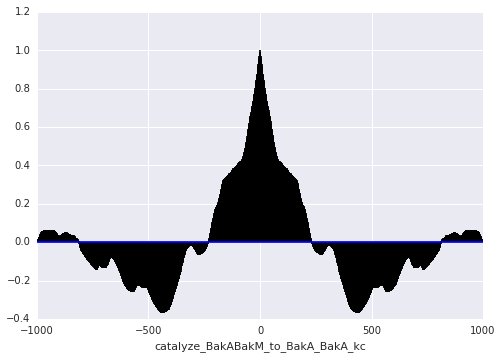

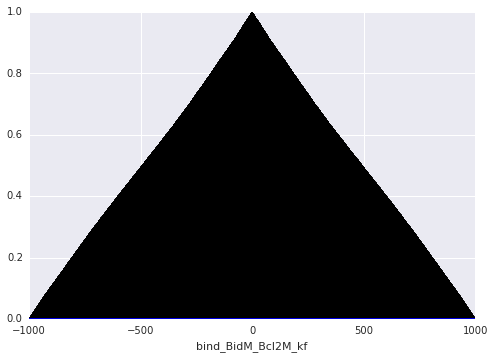

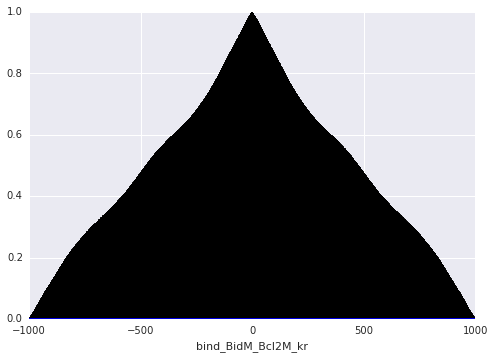

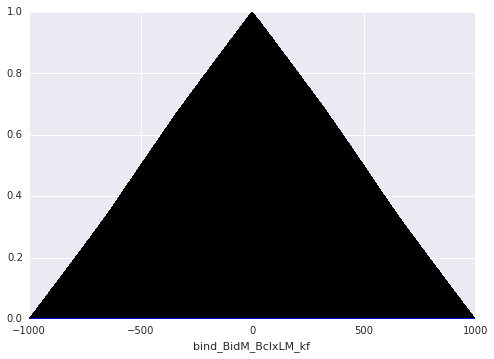

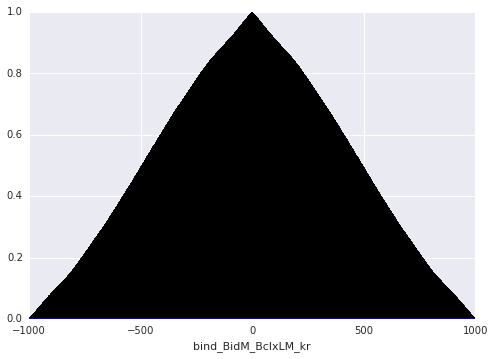

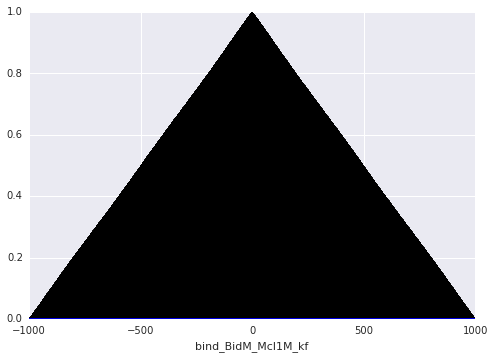

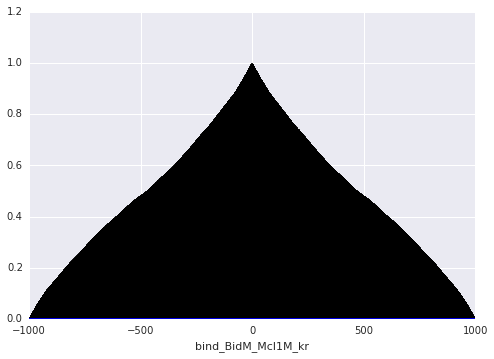

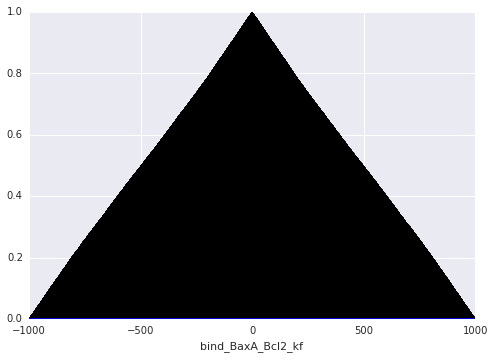

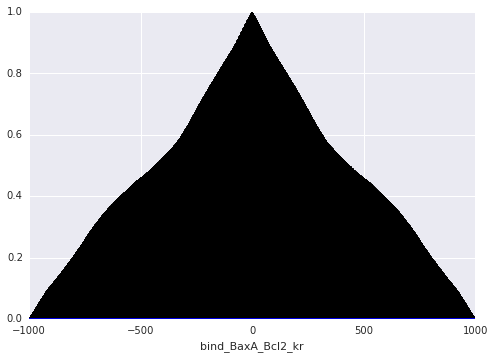

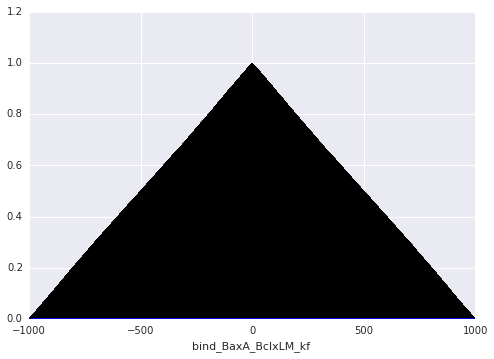

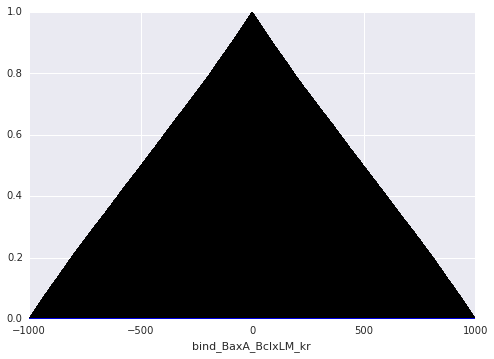

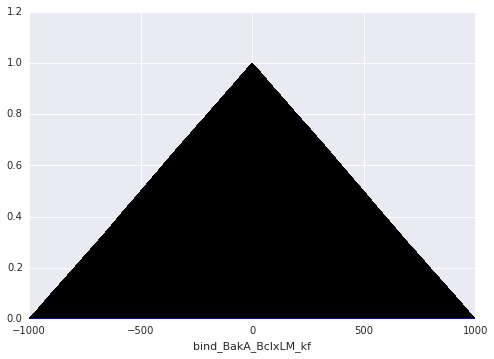

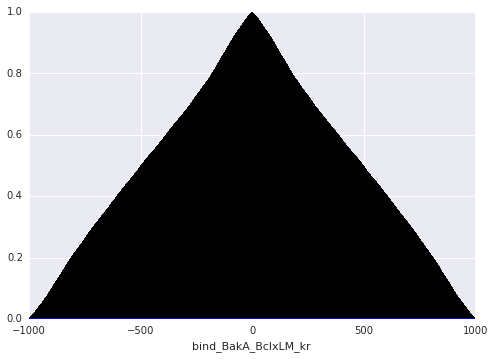

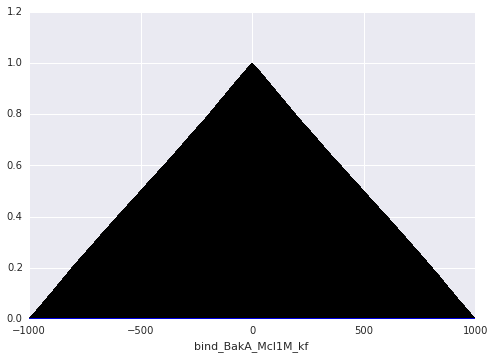

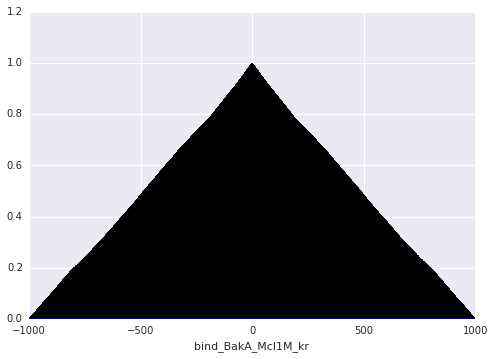

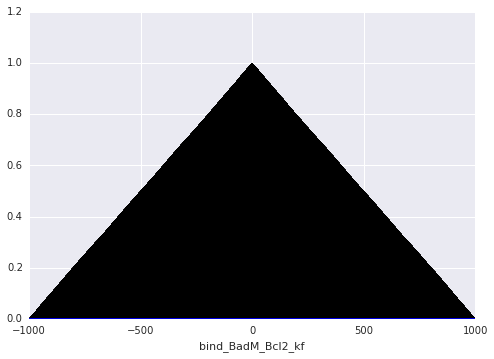

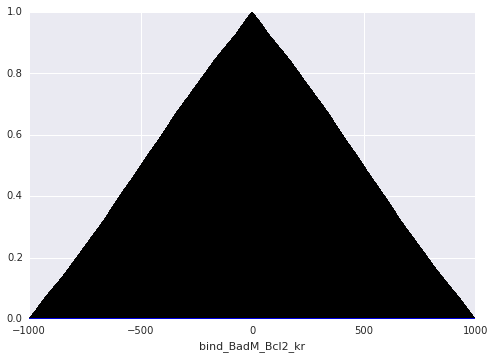

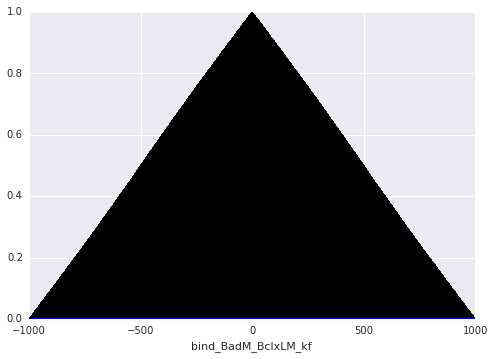

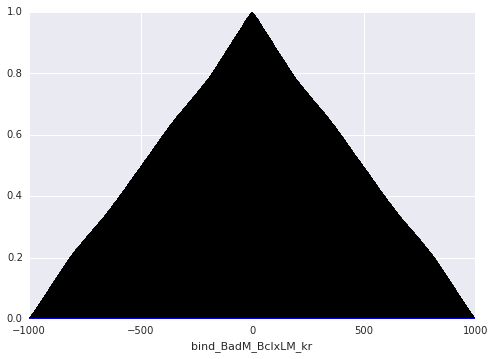

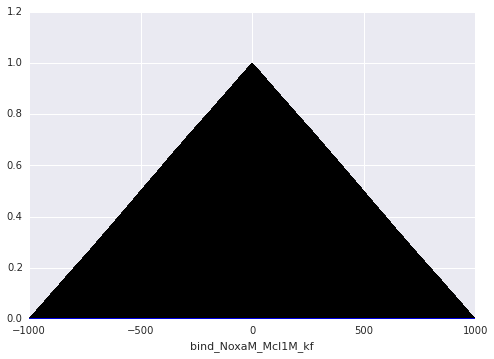

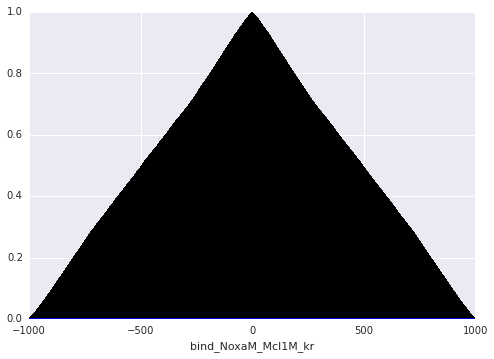

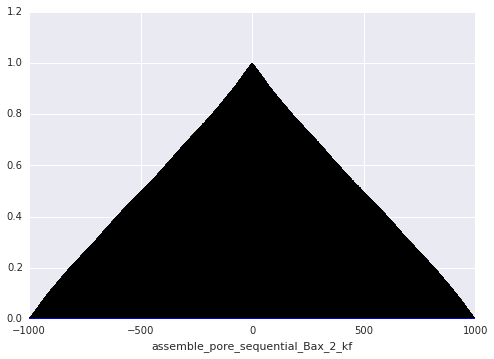

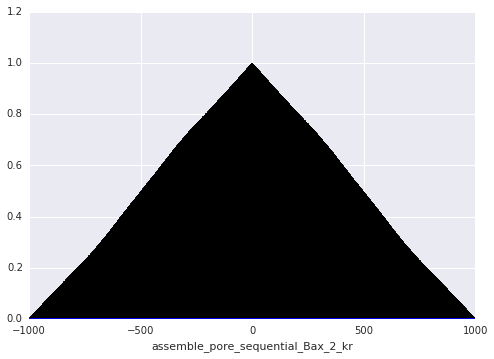

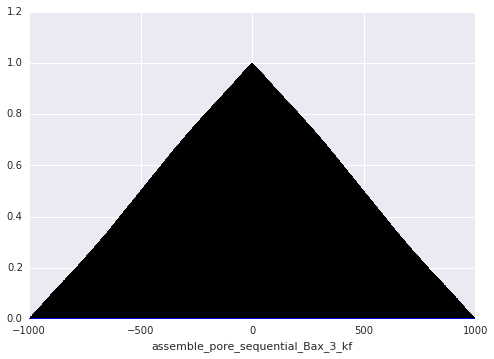

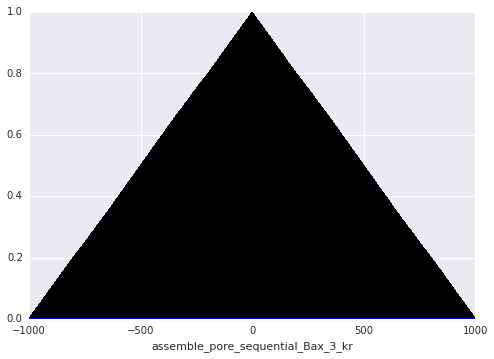

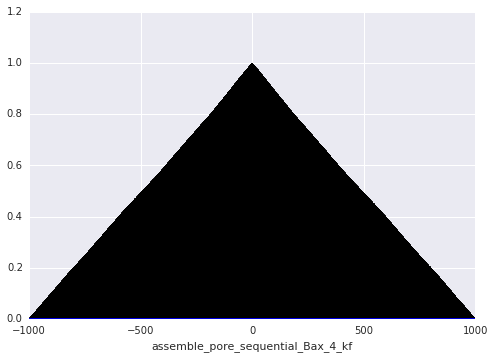

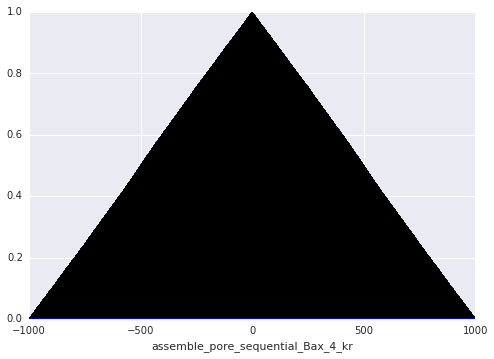

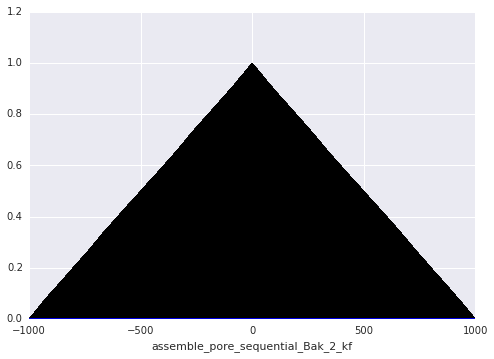

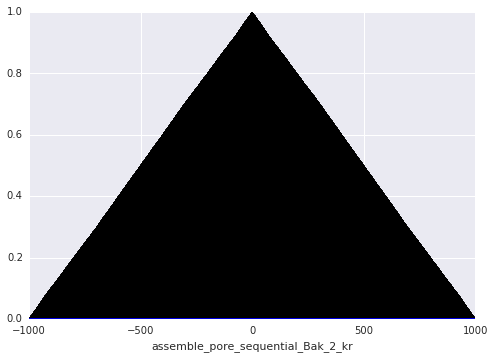

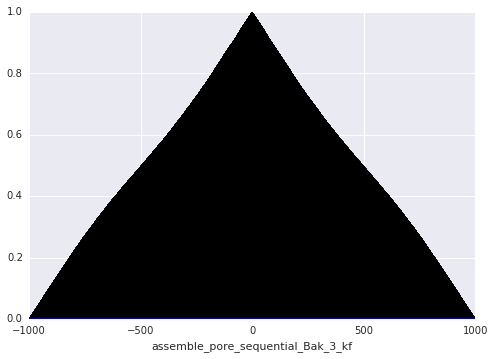

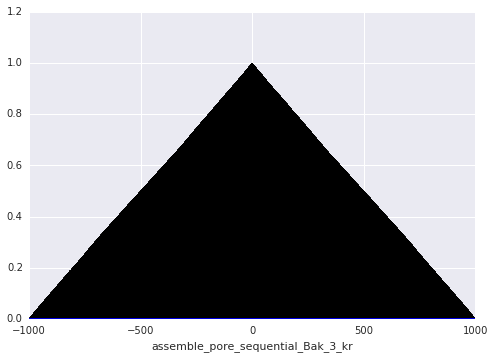

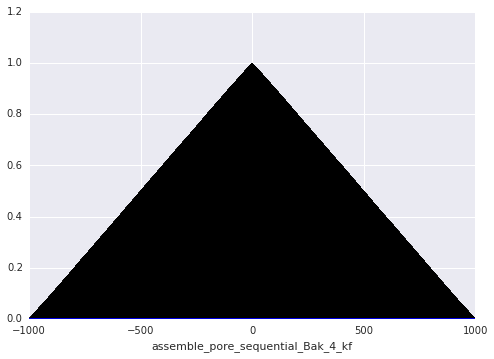

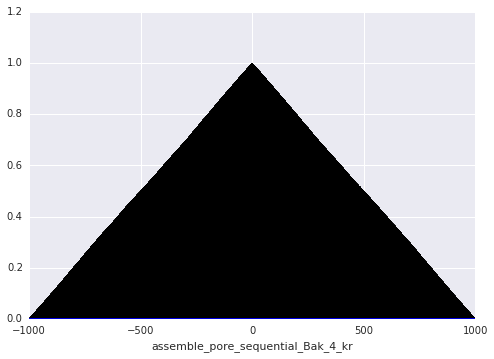

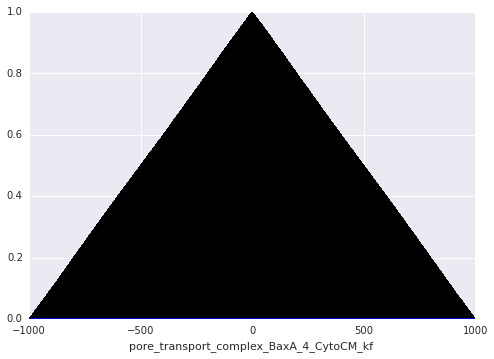

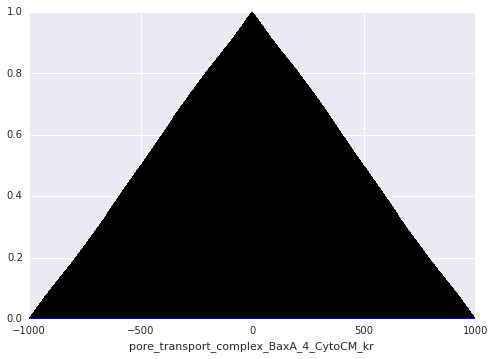

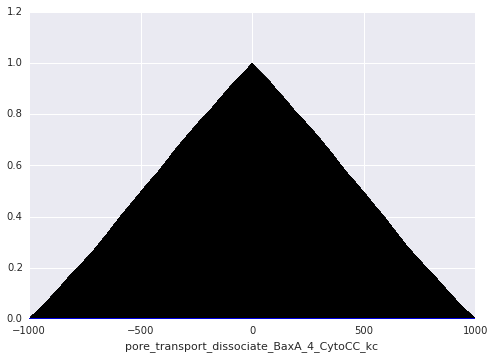

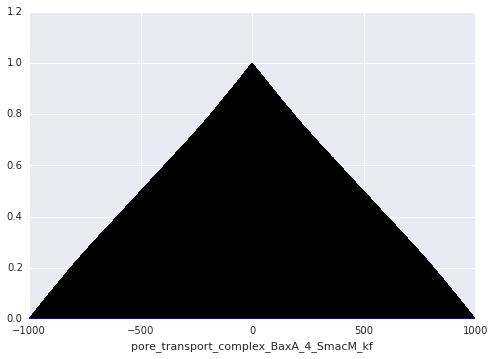

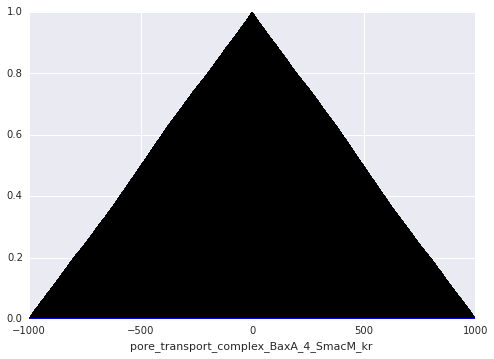

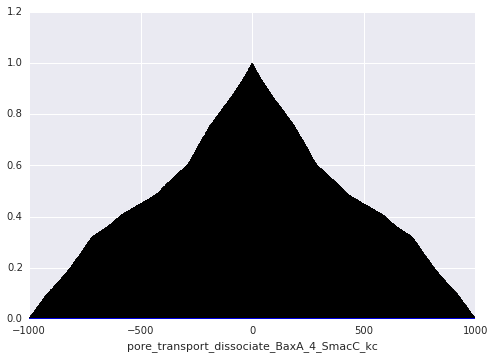

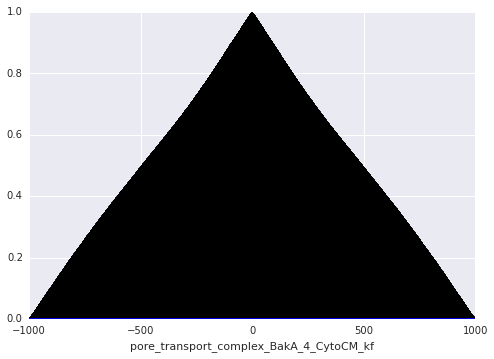

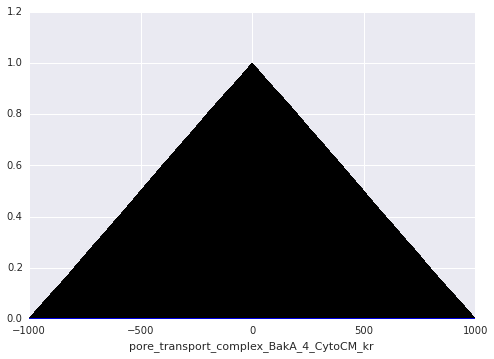

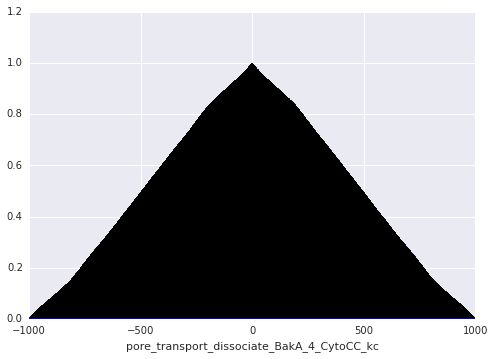

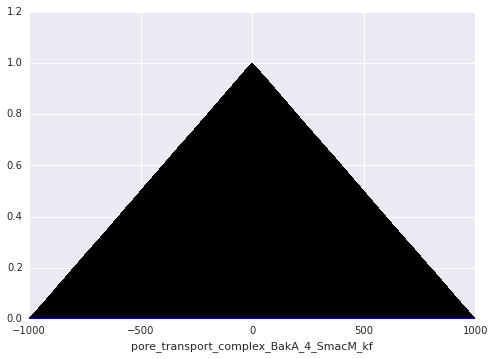

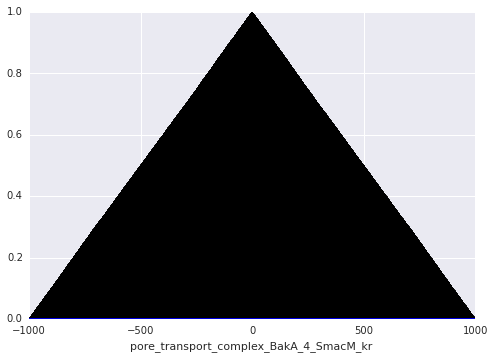

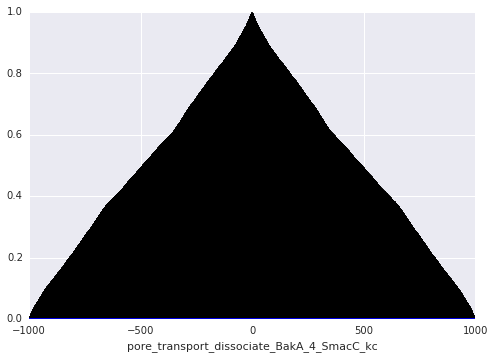

In [15]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][2][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [14]:
acceptance_rates = np.zeros((len(traces['a'][0][0],)))
for dim in range(len(traces['a'][0][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][0])):
        if traces['a'][0][iteration][dim] != traces['a'][0][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  765  acceptance rate:  0.51
N acceptances for parameter:  bind_L_R_to_LR_kr  =  750  acceptance rate:  0.5
N acceptances for parameter:  convert_LR_to_DISC_kc  =  770  acceptance rate:  0.513333333333
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  766  acceptance rate:  0.510666666667
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  759  acceptance rate:  0.506
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  764  acceptance rate:  0.509333333333
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  760  acceptance rate:  0.506666666667
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  762  acceptance rate:  0.508
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  759  acceptance rate:  0.506
N acceptances for parameter:  bind_DISC_flip_kf  =  753  acceptance rate:  0.502
N acceptances for parameter:  bind_DISC_flip_kr  =  768  acceptance rate:  

array([ 0.51      ,  0.5       ,  0.51333333,  0.51066667,  0.506     ,
        0.50933333,  0.50666667,  0.508     ,  0.506     ,  0.502     ,
        0.512     ,  0.51      ,  0.516     ,  0.51      ,  0.508     ,
        0.512     ,  0.51066667,  0.5       ,  0.50866667,  0.51      ,
        0.51133333,  0.502     ,  0.50333333,  0.51      ,  0.51      ,
        0.506     ,  0.506     ,  0.50933333,  0.49533333,  0.50333333,
        0.51533333,  0.50133333,  0.50733333,  0.50266667,  0.51533333,
        0.518     ,  0.51266667,  0.50533333,  0.506     ,  0.498     ,
        0.50133333,  0.50466667,  0.52133333,  0.51266667,  0.516     ,
        0.50933333,  0.50333333,  0.502     ,  0.498     ,  0.50266667,
        0.504     ,  0.50733333,  0.50133333,  0.514     ,  0.522     ,
        0.508     ,  0.50066667,  0.514     ,  0.51      ,  0.50533333,
        0.50666667,  0.51733333,  0.51466667,  0.52      ,  0.50933333,
        0.50666667,  0.50066667,  0.50933333,  0.51      ,  0.50

In [15]:
acceptance_rates = np.zeros((len(traces['a'][1][0],)))
for dim in range(len(traces['a'][1][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][1])):
        if traces['a'][1][iteration][dim] != traces['a'][1][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][1])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  741  acceptance rate:  0.494
N acceptances for parameter:  bind_L_R_to_LR_kr  =  756  acceptance rate:  0.504
N acceptances for parameter:  convert_LR_to_DISC_kc  =  734  acceptance rate:  0.489333333333
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  744  acceptance rate:  0.496
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  743  acceptance rate:  0.495333333333
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  740  acceptance rate:  0.493333333333
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  733  acceptance rate:  0.488666666667
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  750  acceptance rate:  0.5
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  725  acceptance rate:  0.483333333333
N acceptances for parameter:  bind_DISC_flip_kf  =  752  acceptance rate:  0.501333333333
N acceptances for parameter:  bind_DISC_flip_kr  =  748 

array([ 0.494     ,  0.504     ,  0.48933333,  0.496     ,  0.49533333,
        0.49333333,  0.48866667,  0.5       ,  0.48333333,  0.50133333,
        0.49866667,  0.50066667,  0.50533333,  0.49466667,  0.49466667,
        0.494     ,  0.49866667,  0.49666667,  0.504     ,  0.496     ,
        0.49466667,  0.502     ,  0.49933333,  0.49733333,  0.50533333,
        0.49533333,  0.50333333,  0.49266667,  0.49733333,  0.49533333,
        0.49466667,  0.50333333,  0.48933333,  0.504     ,  0.49466667,
        0.49533333,  0.48733333,  0.49666667,  0.47666667,  0.50266667,
        0.50066667,  0.49333333,  0.494     ,  0.49066667,  0.48733333,
        0.50733333,  0.492     ,  0.49266667,  0.494     ,  0.49733333,
        0.508     ,  0.49733333,  0.49666667,  0.50066667,  0.502     ,
        0.49933333,  0.504     ,  0.50733333,  0.49133333,  0.49733333,
        0.50133333,  0.49733333,  0.50666667,  0.49333333,  0.502     ,
        0.482     ,  0.498     ,  0.48466667,  0.502     ,  0.49

In [16]:
acceptance_rates = np.zeros((len(traces['a'][2][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][2])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][2])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  754  acceptance rate:  0.502666666667
N acceptances for parameter:  bind_L_R_to_LR_kr  =  749  acceptance rate:  0.499333333333
N acceptances for parameter:  convert_LR_to_DISC_kc  =  753  acceptance rate:  0.502
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  751  acceptance rate:  0.500666666667
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  744  acceptance rate:  0.496
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  725  acceptance rate:  0.483333333333
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  751  acceptance rate:  0.500666666667
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  748  acceptance rate:  0.498666666667
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  733  acceptance rate:  0.488666666667
N acceptances for parameter:  bind_DISC_flip_kf  =  746  acceptance rate:  0.497333333333
N acceptances for parameter:  bind_D

array([ 0.50266667,  0.49933333,  0.502     ,  0.50066667,  0.496     ,
        0.48333333,  0.50066667,  0.49866667,  0.48866667,  0.49733333,
        0.50533333,  0.502     ,  0.498     ,  0.498     ,  0.50666667,
        0.494     ,  0.502     ,  0.504     ,  0.50066667,  0.498     ,
        0.50066667,  0.50533333,  0.50466667,  0.51      ,  0.49533333,
        0.50266667,  0.49933333,  0.498     ,  0.49533333,  0.498     ,
        0.492     ,  0.49266667,  0.494     ,  0.49066667,  0.49466667,
        0.496     ,  0.494     ,  0.49933333,  0.48466667,  0.50333333,
        0.49866667,  0.48266667,  0.494     ,  0.50533333,  0.49133333,
        0.49733333,  0.504     ,  0.49066667,  0.504     ,  0.49666667,
        0.49066667,  0.49533333,  0.494     ,  0.506     ,  0.50266667,
        0.512     ,  0.504     ,  0.48933333,  0.496     ,  0.50066667,
        0.49266667,  0.508     ,  0.48133333,  0.504     ,  0.50466667,
        0.5       ,  0.512     ,  0.49533333,  0.504     ,  0.49

In [17]:
acceptance_rates = np.zeros((len(traces['a'][2][0],)))
running_acceptance_rates = np.zeros((len(traces['a'][2][0]), len(traces['a'][2])))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    
    for iteration in range(1, len(traces['a'][2])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
        running_acceptance_rates[dim, iteration] = float(n_acceptances)/iteration
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][2])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
running_acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  754  acceptance rate:  0.502666666667
N acceptances for parameter:  bind_L_R_to_LR_kr  =  749  acceptance rate:  0.499333333333
N acceptances for parameter:  convert_LR_to_DISC_kc  =  753  acceptance rate:  0.502
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  751  acceptance rate:  0.500666666667
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  744  acceptance rate:  0.496
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  725  acceptance rate:  0.483333333333
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  751  acceptance rate:  0.500666666667
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  748  acceptance rate:  0.498666666667
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  733  acceptance rate:  0.488666666667
N acceptances for parameter:  bind_DISC_flip_kf  =  746  acceptance rate:  0.497333333333
N acceptances for parameter:  bind_D

array([[ 0.        ,  0.        ,  0.        , ...,  0.50233801,
         0.50267023,  0.503002  ],
       [ 0.        ,  0.        ,  0.5       , ...,  0.498998  ,
         0.49933244,  0.49966644],
       [ 0.        ,  0.        ,  0.5       , ...,  0.50167001,
         0.50200267,  0.50233489],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.49766199,
         0.49799733,  0.49833222],
       [ 0.        ,  0.        ,  0.        , ...,  0.49498998,
         0.4953271 ,  0.49566378],
       [ 0.        ,  0.        ,  0.5       , ...,  0.49231797,
         0.49265688,  0.49299533]])

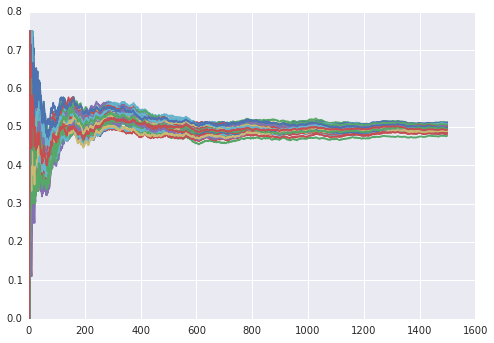

In [18]:
for dim in range(105):
    plt.plot(range(1500), running_acceptance_rates[dim,:])